In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
import time
import regex
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('loantap.csv')
df1.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   

  open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
0     16.0     0.0   36369.0       41.8      25.0                    w   
1     17.0     0.0   20131.0       53.3      27.0                    f   
2     13.0     0.0   11987.0       92.2      26.0                    f   
3      6.0     0.0    5472.0       21.5      13.0                    f   
4     13.0     0.0   24584.0       69.8      43.0                    f   

  application_type  mort_acc  pub_rec_bankruptcies  \
0       INDIVIDUAL       0.0                   0.0   
1       INDIVIDUAL       3.0                   0.0   
2       INDIVIDUAL       0.0                   0.0   
3       INDIVIDUAL       0.0                   0.0   
4       INDIVIDUAL       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650  

[5 rows x 27 columns]

In [3]:
df1['issue_d'] = pd.to_datetime(df1['issue_d'], format='%b-%Y')

# Extract year, quarter, and month into separate columns
df1['issue_year'] = df1['issue_d'].dt.year
df1['issue_month'] = df1['issue_d'].dt.month
df1['issue_quarter'] = df1['issue_d'].dt.quarter


In [4]:
df1.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   

  revol_util total_acc initial_list_status application_type mort_acc  \
0       41.8      25.0                   w       INDIVIDUAL      0.0   
1       53.3      27.0                   f       INDIVIDUAL      3.0   
2       92.2      26.0                   f       INDIVIDUAL      0.0   
3       21.5      13.0                   f       INDIVIDUAL      0.0   
4       69.8      43.0                   f       INDIVIDUAL      1.0   

   pub_rec_bankruptcies                                            address  \
0                   0.0     0174 Michelle Gateway\r\nMendozaberg, OK 22690   
1                   0.0  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113   
2                   0.0  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113   
3                   0.0            823 Reid Ford\r\nDelacruzside, MA 00813   
4                   0.0             679 Luna Roads\r\nGreggshire, VA 11650   

   issue_year  issue_month  issue_quarter  
0        2015            1              1  
1        2015            1              1  
2        2015            1              1  
3        2014           11              4  
4        2013            4              2  

[5 rows x 30 columns]

In [5]:
df = pd.read_csv('loantap.csv')
pd.set_option('display.max_columns',27)
df.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  \
0                Marketing  10+ years           RENT    117000.0   
1          Credit analyst     4 years       MORTGAGE     65000.0   
2             Statistician   < 1 year           RENT     43057.0   
3          Client Advocate    6 years           RENT     54000.0   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0   

  verification_status   issue_d  loan_status             purpose  \
0        Not Verified  Jan-2015   Fully Paid            vacation   
1        Not Verified  Jan-2015   Fully Paid  debt_consolidation   
2     Source Verified  Jan-2015   Fully Paid         credit_card   
3        Not Verified  Nov-2014   Fully Paid         credit_card   
4            Verified  Apr-2013  Charged Off         credit_card   

                     title    dti earliest_cr_line  open_acc  pub_rec  \
0                 Vacation  26.24         Jun-1990      16.0      0.0   
1       Debt consolidation  22.05         Jul-2004      17.0      0.0   
2  Credit card refinancing  12.79         Aug-2007      13.0      0.0   
3  Credit card refinancing   2.60         Sep-2006       6.0      0.0   
4    Credit Card Refinance  33.95         Mar-1999      13.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status application_type  \
0    36369.0        41.8       25.0                   w       INDIVIDUAL   
1    20131.0        53.3       27.0                   f       INDIVIDUAL   
2    11987.0        92.2       26.0                   f       INDIVIDUAL   
3     5472.0        21.5       13.0                   f       INDIVIDUAL   
4    24584.0        69.8       43.0                   f       INDIVIDUAL   

   mort_acc  pub_rec_bankruptcies  \
0       0.0                   0.0   
1       3.0                   0.0   
2       0.0                   0.0   
3       0.0                   0.0   
4       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650

In [6]:
df.tail()

loan_amnt        term  int_rate  installment grade sub_grade  \
396025    10000.0   60 months     10.99       217.38     B        B4   
396026    21000.0   36 months     12.29       700.42     C        C1   
396027     5000.0   36 months      9.99       161.32     B        B1   
396028    21000.0   60 months     15.31       503.02     C        C2   
396029     2000.0   36 months     13.61        67.98     C        C2   

                       emp_title emp_length home_ownership  annual_inc  \
396025          licensed bankere    2 years           RENT     40000.0   
396026                     Agent    5 years       MORTGAGE    110000.0   
396027              City Carrier  10+ years           RENT     56500.0   
396028      Gracon Services, Inc  10+ years       MORTGAGE     64000.0   
396029  Internal Revenue Service  10+ years           RENT     42996.0   

       verification_status   issue_d loan_status             purpose  \
396025     Source Verified  Oct-2015  Fully Paid  debt_consolidation   
396026     Source Verified  Feb-2015  Fully Paid  debt_consolidation   
396027            Verified  Oct-2013  Fully Paid  debt_consolidation   
396028            Verified  Aug-2012  Fully Paid  debt_consolidation   
396029            Verified  Jun-2010  Fully Paid  debt_consolidation   

                       title    dti earliest_cr_line  open_acc  pub_rec  \
396025    Debt consolidation  15.63         Nov-2004       6.0      0.0   
396026    Debt consolidation  21.45         Feb-2006       6.0      0.0   
396027  pay off credit cards  17.56         Mar-1997      15.0      0.0   
396028         Loanforpayoff  15.88         Nov-1990       9.0      0.0   
396029     Toxic Debt Payoff   8.32         Sep-1998       3.0      0.0   

        revol_bal  revol_util  total_acc initial_list_status application_type  \
396025     1990.0        34.3       23.0                   w       INDIVIDUAL   
396026    43263.0        95.7        8.0                   f       INDIVIDUAL   
396027    32704.0        66.9       23.0                   f       INDIVIDUAL   
396028    15704.0        53.8       20.0                   f       INDIVIDUAL   
396029     4292.0        91.3       19.0                   f       INDIVIDUAL   

        mort_acc  pub_rec_bankruptcies  \
396025       0.0                   0.0   
396026       1.0                   0.0   
396027       0.0                   0.0   
396028       5.0                   0.0   
396029       NaN                   0.0   

                                                  address  
396025   12951 Williams Crossing\r\nJohnnyville, DC 30723  
396026  0114 Fowler Field Suite 028\r\nRachelborough, ...  
396027  953 Matthew Points Suite 414\r\nReedfort, NY 7...  
396028  7843 Blake Freeway Apt. 229\r\nNew Michael, FL...  
396029      787 Michelle Causeway\r\nBriannaton, AR 48052

In [7]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [9]:
df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [10]:
(df.isna().sum()/df.shape[0])*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

## **_`HOW TO DEAL WITH NaN VALUES`_**

**1. For 'emp_title':**

- Fill Missing Values: If the percentage of missing values is relatively low (around 5.79%), you can fill the missing values with a placeholder such as 'Unknown' or 'Not Available' to indicate that the job title information is unavailable.

- Use Imputation: Another approach is to use imputation techniques such as mode imputation, where you replace missing values with the most frequent job title in the dataset. However, this approach may not capture the true variability in job titles.

**2. For 'emp_length':**

- Fill Missing Values: Since the percentage of missing values is around 4.62%, you can fill these missing values with the mode or median employment length, depending on the distribution of employment lengths in the dataset. This approach helps retain the structure of the data.

- Use Imputation: Alternatively, you can use imputation methods like linear regression imputation or K-nearest neighbors (KNN) imputation to estimate missing employment lengths based on other features in the dataset.


In [11]:
df.describe()

loan_amnt       int_rate    installment    annual_inc  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean    14113.888089      13.639400     431.849698  7.420318e+04   
std      8357.441341       4.472157     250.727790  6.163762e+04   
min       500.000000       5.320000      16.080000  0.000000e+00   
25%      8000.000000      10.490000     250.330000  4.500000e+04   
50%     12000.000000      13.330000     375.430000  6.400000e+04   
75%     20000.000000      16.490000     567.300000  9.000000e+04   
max     40000.000000      30.990000    1533.810000  8.706582e+06   

                 dti       open_acc        pub_rec     revol_bal  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean       17.379514      11.311153       0.178191  1.584454e+04   
std        18.019092       5.137649       0.530671  2.059184e+04   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%        11.280000       8.000000       0.000000  6.025000e+03   
50%        16.910000      10.000000       0.000000  1.118100e+04   
75%        22.980000      14.000000       0.000000  1.962000e+04   
max      9999.000000      90.000000      86.000000  1.743266e+06   

          revol_util      total_acc       mort_acc  pub_rec_bankruptcies  
count  395754.000000  396030.000000  358235.000000         395495.000000  
mean       53.791749      25.414744       1.813991              0.121648  
std        24.452193      11.886991       2.147930              0.356174  
min         0.000000       2.000000       0.000000              0.000000  
25%        35.800000      17.000000       0.000000              0.000000  
50%        54.800000      24.000000       1.000000              0.000000  
75%        72.900000      32.000000       3.000000              0.000000  
max       892.300000     151.000000      34.000000              8.000000

## **_`OBSERVATIONS / INSIGHTS`_**

**1. loan_amnt:** There may be clusters of loan amounts around specific values, indicating common loan request sizes preferred by borrowers for certain purposes such as home renovations or debt consolidation.

**2. int_rate:** The distribution of interest rates could reveal trends over time or variations based on borrower profiles, such as higher rates for riskier loans or lower rates for prime borrowers.

**3. installment:** Patterns in installment amounts relative to loan amounts could indicate common repayment structures or loan terms chosen by borrowers, potentially reflecting affordability considerations.

**4. annual_inc:** Discrepancies between reported annual incomes and loan amounts might suggest instances of underreporting income or borrowers taking loans beyond their usual income range, highlighting potential risk factors.

**5. dti (Debt-to-Income Ratio):** An analysis of debt-to-income ratios across different loan amounts and interest rates could provide insights into borrowers' financial health and their ability to manage debt responsibly.

**6. open_acc:** Variations in the number of open credit accounts may indicate different credit utilization strategies or borrowing behaviors among individuals with varying credit histories and financial goals.

**7. pub_rec (Public Records):** The presence or absence of public records could be correlated with other financial indicators, such as credit scores or loan approval rates, shedding light on factors influencing creditworthiness.

**8. revol_bal (Revolving Balance):** Trends in revolving balances relative to credit limits or changes in balances over time could reveal borrowing patterns, credit utilization habits, and potential risk levels for lenders.

**9. revol_util (Revolving Utilization Rate):** Analysis of revolving utilization rates alongside other financial metrics could uncover correlations with creditworthiness, loan defaults, or financial stability indicators.

**10. total_acc (Total Accounts):** Comparing the number of total accounts with other credit-related variables may reveal insights into credit management practices, diversification of credit types, and potential risk factors associated with account proliferation.

**11. mort_acc (Mortgage Accounts):** Patterns in mortgage account ownership among borrowers could provide insights into homeownership trends, real estate market influences, and the financial profiles of individuals with mortgage obligations.

**12. pub_rec_bankruptcies (Public Record Bankruptcies):**
 The prevalence of public record bankruptcies within the dataset could be analyzed alongside other financial metrics to understand bankruptcy risk factors, credit impacts, and borrower resilience in financial distress scenarios.

In [12]:
df.describe(include='object')

term   grade sub_grade emp_title emp_length home_ownership  \
count       396030  396030    396030    373103     377729         396030   
unique           2       7        35    173105         11              6   
top      36 months       B        B3   Teacher  10+ years       MORTGAGE   
freq        302005  116018     26655      4389     126041         198348   

       verification_status   issue_d loan_status             purpose  \
count               396030    396030      396030              396030   
unique                   3       115           2                  14   
top               Verified  Oct-2014  Fully Paid  debt_consolidation   
freq                139563     14846      318357              234507   

                     title earliest_cr_line initial_list_status  \
count               394275           396030              396030   
unique               48817              684                   2   
top     Debt consolidation         Oct-2000                   f   
freq                152472             3017              238066   

       application_type                      address  
count            396030                       396030  
unique                3                       393700  
top          INDIVIDUAL  USCGC Smith\r\nFPO AE 70466  
freq             395319                            8

# `DATA TRANSFORMATION` 

#### `A. Treatment of Misiing Values`

In [13]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [14]:
# treatment of null values in category columns
# emp_title, title, emp_length has multiple values which can be filled with Unknown variabble to avoid data loss
df['emp_title'].fillna("Unknown",inplace=True)
df['emp_length'].fillna("Unknown",inplace=True)
df['title'].fillna("Unknown",inplace=True)

**`revol_bal and pub_rec_bankruptcies, both the column have nearly equal mean and median values. So, replacing NaN values in this column with mean seems to be a viable option`**

In [15]:
df['revol_util'].fillna(df.revol_util.median(),inplace=True)

**`pub_rec_bankcyptcies are specific pieces of this information that reflect negatively on a person or business's financial responsibility. They can lower your credit score and make it harder to get loans, rent an apartment, or even get a job in some cases..`**

**Reasons why it might not be the best idea to replace NaN values in this column:**

a) Doesn't account for underlying reasons for missing data: Simply substituting missing entries with the median overlooks the potential causes for missing values. If NaNs represent outliers or skewed data, the median might not be an accurate reflection.

b) Misleading interpretation: If NaNs indicate specific situations, replacing them with the median can mask important information and lead to misinterpretations.

**`In order to avoid misleading data, dropping the NaN values of this column is the best option.`**

In [16]:
df.dropna(subset='pub_rec_bankruptcies',inplace=True)

**`The "Number of Mortgage Accounts" column in a dataset shows how many mortgage accounts each individual has within the data set. It represents a snapshot in time of the number of mortgages a person holds.`**

**Reasons why it might not be the best idea to replace NaN values in this column:**

A. Imputation: Since mortgage accounts are integers, imputation techniques like mean or median might be considered, but with caution. However, these methods have limitations:

a) Mean/median might not reflect reality: The mean (1.81) might not represent a typical number of accounts. Filling NaNs with the mean could skew the data.

b) Loss of information: Imputation replaces NaNs with estimates, potentially masking underlying reasons for missing data.

B. Leave as NaN: This might be suitable if:

a) You plan for further analysis that considers missing data (e.g., excluding rows with NaNs).
b) You're unsure about the cause of NaNs and don't want to introduce bias.

**`In order to avoid misleading data, dropping the NaN values of this column is the best option.`**

In [17]:
df.dropna(subset='mort_acc',inplace=True)

In [18]:
pd.set_option('display.max_columns', 27)
df.tail()

loan_amnt        term  int_rate  installment grade sub_grade  \
396024     6000.0   36 months     13.11       202.49     B        B4   
396025    10000.0   60 months     10.99       217.38     B        B4   
396026    21000.0   36 months     12.29       700.42     C        C1   
396027     5000.0   36 months      9.99       161.32     B        B1   
396028    21000.0   60 months     15.31       503.02     C        C2   

                      emp_title emp_length home_ownership  annual_inc  \
396024  Michael's Arts & Crafts    5 years           RENT     64000.0   
396025         licensed bankere    2 years           RENT     40000.0   
396026                    Agent    5 years       MORTGAGE    110000.0   
396027             City Carrier  10+ years           RENT     56500.0   
396028     Gracon Services, Inc  10+ years       MORTGAGE     64000.0   

       verification_status   issue_d loan_status             purpose  \
396024        Not Verified  Mar-2013  Fully Paid  debt_consolidation   
396025     Source Verified  Oct-2015  Fully Paid  debt_consolidation   
396026     Source Verified  Feb-2015  Fully Paid  debt_consolidation   
396027            Verified  Oct-2013  Fully Paid  debt_consolidation   
396028            Verified  Aug-2012  Fully Paid  debt_consolidation   

                       title    dti earliest_cr_line  open_acc  pub_rec  \
396024        Credit buster   10.81         Nov-1991       7.0      0.0   
396025    Debt consolidation  15.63         Nov-2004       6.0      0.0   
396026    Debt consolidation  21.45         Feb-2006       6.0      0.0   
396027  pay off credit cards  17.56         Mar-1997      15.0      0.0   
396028         Loanforpayoff  15.88         Nov-1990       9.0      0.0   

        revol_bal  revol_util  total_acc initial_list_status application_type  \
396024    11456.0        97.1        9.0                   w       INDIVIDUAL   
396025     1990.0        34.3       23.0                   w       INDIVIDUAL   
396026    43263.0        95.7        8.0                   f       INDIVIDUAL   
396027    32704.0        66.9       23.0                   f       INDIVIDUAL   
396028    15704.0        53.8       20.0                   f       INDIVIDUAL   

        mort_acc  pub_rec_bankruptcies  \
396024       0.0                   0.0   
396025       0.0                   0.0   
396026       1.0                   0.0   
396027       0.0                   0.0   
396028       5.0                   0.0   

                                                  address  
396024  514 Cynthia Park Apt. 402\r\nWest Williamside,...  
396025   12951 Williams Crossing\r\nJohnnyville, DC 30723  
396026  0114 Fowler Field Suite 028\r\nRachelborough, ...  
396027  953 Matthew Points Suite 414\r\nReedfort, NY 7...  
396028  7843 Blake Freeway Apt. 229\r\nNew Michael, FL...

#### `B. Feature Engineering`

In [19]:
pd.set_option('display.max_columns', 30)
df.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  \
0                Marketing  10+ years           RENT    117000.0   
1          Credit analyst     4 years       MORTGAGE     65000.0   
2             Statistician   < 1 year           RENT     43057.0   
3          Client Advocate    6 years           RENT     54000.0   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0   

  verification_status   issue_d  loan_status             purpose  \
0        Not Verified  Jan-2015   Fully Paid            vacation   
1        Not Verified  Jan-2015   Fully Paid  debt_consolidation   
2     Source Verified  Jan-2015   Fully Paid         credit_card   
3        Not Verified  Nov-2014   Fully Paid         credit_card   
4            Verified  Apr-2013  Charged Off         credit_card   

                     title    dti earliest_cr_line  open_acc  pub_rec  \
0                 Vacation  26.24         Jun-1990      16.0      0.0   
1       Debt consolidation  22.05         Jul-2004      17.0      0.0   
2  Credit card refinancing  12.79         Aug-2007      13.0      0.0   
3  Credit card refinancing   2.60         Sep-2006       6.0      0.0   
4    Credit Card Refinance  33.95         Mar-1999      13.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status application_type  \
0    36369.0        41.8       25.0                   w       INDIVIDUAL   
1    20131.0        53.3       27.0                   f       INDIVIDUAL   
2    11987.0        92.2       26.0                   f       INDIVIDUAL   
3     5472.0        21.5       13.0                   f       INDIVIDUAL   
4    24584.0        69.8       43.0                   f       INDIVIDUAL   

   mort_acc  pub_rec_bankruptcies  \
0       0.0                   0.0   
1       3.0                   0.0   
2       0.0                   0.0   
3       0.0                   0.0   
4       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650

In [20]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y')
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')

In [21]:
# Extract year, quarter, and month into separate columns
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month
df['issue_quarter'] = df['issue_d'].dt.quarter

In [22]:
df['earliest_cr_month'] = df['earliest_cr_line'].dt.month
df['earliest_cr_quarter'] = df['earliest_cr_line'].dt.quarter
df['earliest_cr_line'] = df['earliest_cr_line'].dt.year

In [23]:
pattern1 = r'months?'  # Matches "months" (case-insensitive)
df['term'] = df['term'].str.replace(pattern1, "", regex=True)
pattern2 = r'[a-zA-Z]+-'
df['term'] = df['term'].astype('int64')

In [24]:
from collections import Counter
df['address'] = df['address'].str.replace(r'\d+', '')
df['state'] = df['address'].apply(lambda x: x.split()[-1])

#### `C. Renaming the correct datatypes of numerical columns`

In [25]:
df['loan_amnt'] = df['loan_amnt'].astype('int64')
df['annual_inc'] = df['annual_inc'].astype('int64')
df['revol_bal'] = df['revol_bal'].astype('int64')
df['open_acc'] = df['total_acc'].astype('int64')
df['mort_acc'] = df['mort_acc'].astype('int64')
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].astype('int64')
df['issue_d'] = df['issue_d'].astype('int64')
df['earliest_cr_line'] = df['earliest_cr_line'].astype('int64')
df['earliest_cr_month'] = df['earliest_cr_month'].astype('int64')
df['earliest_cr_quarter'] = df['earliest_cr_quarter'].astype('int64')
df['issue_month'] = df['issue_month'] .astype('int64')
df['issue_quarter'] = df['issue_quarter'] .astype('int64')
df['credit_line_delta'] = df['issue_year'] - df['earliest_cr_line'] 

In [26]:
df.drop(columns=['address','issue_d','pub_rec'],inplace=True)

In [27]:
df['title'] = df['title'].str.lower()
df['emp_title'] = df['emp_title'].str.lower()

In [28]:
df.nunique()

loan_amnt                 1390
term                         2
int_rate                   265
installment              50224
grade                        7
sub_grade                   35
emp_title               134195
emp_length                  12
home_ownership               6
annual_inc               23894
verification_status          3
loan_status                  2
purpose                     14
title                    28341
dti                       4262
earliest_cr_line            65
open_acc                   118
revol_bal                54121
revol_util                1160
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
issue_year                   5
issue_month                 12
issue_quarter                4
earliest_cr_month           12
earliest_cr_quarter          4
state                       54
credit_line_delta           64
dtype: int64

#### `D. Outlier Treatment`

In [29]:
df.describe()

loan_amnt           term       int_rate    installment  \
count  358235.000000  358235.000000  358235.000000  358235.000000   
mean    14385.581811      41.658342      13.805331     441.782256   
std      8386.158547      10.187426       4.504672     251.948920   
min      1000.000000      36.000000       5.320000      21.620000   
25%      8000.000000      36.000000      10.740000     260.410000   
50%     12000.000000      36.000000      13.490000     385.010000   
75%     20000.000000      36.000000      16.780000     580.450000   
max     40000.000000      60.000000      30.990000    1533.810000   

         annual_inc            dti  earliest_cr_line       open_acc  \
count  3.582350e+05  358235.000000     358235.000000  358235.000000   
mean   7.475947e+04      17.786886       1997.977786      25.766366   
std    6.142202e+04      18.775977          7.229164      11.898906   
min    0.000000e+00       0.000000       1944.000000       2.000000   
25%    4.542000e+04      11.630000       1994.000000      17.000000   
50%    6.500000e+04      17.280000       1999.000000      24.000000   
75%    9.000000e+04      23.490000       2003.000000      33.000000   
max    8.706582e+06    9999.000000       2013.000000     151.000000   

          revol_bal     revol_util      total_acc       mort_acc  \
count  3.582350e+05  358235.000000  358235.000000  358235.000000   
mean   1.608553e+04      54.193639      25.766366       1.813991   
std    2.104023e+04      23.991042      11.898906       2.147930   
min    0.000000e+00       0.000000       2.000000       0.000000   
25%    6.215500e+03      36.600000      17.000000       0.000000   
50%    1.135900e+04      55.100000      24.000000       1.000000   
75%    1.984900e+04      72.800000      33.000000       3.000000   
max    1.743266e+06     892.300000     151.000000      34.000000   

       pub_rec_bankruptcies     issue_year    issue_month  issue_quarter  \
count         358235.000000  358235.000000  358235.000000  358235.000000   
mean               0.130102    2013.949910       6.571974       2.553715   
std                0.367734       1.114321       3.400653       1.115913   
min                0.000000    2012.000000       1.000000       1.000000   
25%                0.000000    2013.000000       4.000000       2.000000   
50%                0.000000    2014.000000       7.000000       3.000000   
75%                0.000000    2015.000000      10.000000       4.000000   
max                8.000000    2016.000000      12.000000       4.000000   

       earliest_cr_month  earliest_cr_quarter  credit_line_delta  
count      358235.000000        358235.000000      358235.000000  
mean            6.744386             2.578506          15.972124  
std             3.423447             1.114486           7.216879  
min             1.000000             1.000000           3.000000  
25%             4.000000             2.000000          11.000000  
50%             7.000000             3.000000          15.000000  
75%            10.000000             4.000000          20.000000  
max            12.000000             4.000000          70.000000

- **annual_inc:** The maximum annual income of 8,706,582 dollars stands out significantly compared to the majority of incomes. This extreme value could be considered an outlier and may require further investigation to ensure data accuracy.
- **dti:** The maximum debt-to-income ratio of 9999 seems unusually high and is significantly higher than the median value of around 17.28. This value could be an outlier and should be examined to verify its accuracy.
- **revol_bal:** The maximum revolving credit balance is 1,743,266 dollars, which is considerably higher than the majority of balances. This value may be an outlier and should be reviewed to confirm its validity.
- **revol_util:** The maximum revolving line utilization rate of 892.3% is unusually high compared to the median value. This extreme value could be an outlier and may warrant investigation to ensure data quality.
- **total_acc:** While there are no obvious outliers in this column based on the provided statistics, extremely high numbers of credit lines compared to the majority could potentially be outliers and should be examined in context.
- **mort_acc:** Similar to total_acc, there are no evident outliers based on the provided statistics. However, exceptionally high numbers of mortgage accounts compared to the majority could be outliers and should be assessed accordingly.

In [30]:
def cut_outliers(df, columns):
    treated_df = df.copy()

    # Apply IQR-based outlier treatment to each specified column
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        treated_df[col] = treated_df[col].clip(lower_bound, upper_bound)

    return treated_df
columns_to_cut = ['loan_amnt', 'annual_inc','dti','revol_util','total_acc','revol_util']

# Cut outliers using IQR method with a factor of 1.5
new_df = cut_outliers(df, columns_to_cut)

In [31]:
new_df.describe()

loan_amnt           term       int_rate    installment  \
count  358235.000000  358235.000000  358235.000000  358235.000000   
mean    14384.548062      41.658342      13.805331     441.782256   
std      8383.125018      10.187426       4.504672     251.948920   
min      1000.000000      36.000000       5.320000      21.620000   
25%      8000.000000      36.000000      10.740000     260.410000   
50%     12000.000000      36.000000      13.490000     385.010000   
75%     20000.000000      36.000000      16.780000     580.450000   
max     38000.000000      60.000000      30.990000    1533.810000   

          annual_inc            dti  earliest_cr_line       open_acc  \
count  358235.000000  358235.000000     358235.000000  358235.000000   
mean    71511.433852      17.748587       1997.977786      25.766366   
std     34252.255589       8.151308          7.229164      11.898906   
min         0.000000       0.000000       1944.000000       2.000000   
25%     45420.000000      11.630000       1994.000000      17.000000   
50%     65000.000000      17.280000       1999.000000      24.000000   
75%     90000.000000      23.490000       2003.000000      33.000000   
max    156870.000000      41.280000       2013.000000     151.000000   

          revol_bal     revol_util      total_acc       mort_acc  \
count  3.582350e+05  358235.000000  358235.000000  358235.000000   
mean   1.608553e+04      54.191033      25.650860       1.813991   
std    2.104023e+04      23.948827      11.513368       2.147930   
min    0.000000e+00       0.000000       2.000000       0.000000   
25%    6.215500e+03      36.600000      17.000000       0.000000   
50%    1.135900e+04      55.100000      24.000000       1.000000   
75%    1.984900e+04      72.800000      33.000000       3.000000   
max    1.743266e+06     127.100000      57.000000      34.000000   

       pub_rec_bankruptcies     issue_year    issue_month  issue_quarter  \
count         358235.000000  358235.000000  358235.000000  358235.000000   
mean               0.130102    2013.949910       6.571974       2.553715   
std                0.367734       1.114321       3.400653       1.115913   
min                0.000000    2012.000000       1.000000       1.000000   
25%                0.000000    2013.000000       4.000000       2.000000   
50%                0.000000    2014.000000       7.000000       3.000000   
75%                0.000000    2015.000000      10.000000       4.000000   
max                8.000000    2016.000000      12.000000       4.000000   

       earliest_cr_month  earliest_cr_quarter  credit_line_delta  
count      358235.000000        358235.000000      358235.000000  
mean            6.744386             2.578506          15.972124  
std             3.423447             1.114486           7.216879  
min             1.000000             1.000000           3.000000  
25%             4.000000             2.000000          11.000000  
50%             7.000000             3.000000          15.000000  
75%            10.000000             4.000000          20.000000  
max            12.000000             4.000000          70.000000

- **loan_amnt:** The maximum loan amount is 38,000 dollars, which is within a reasonable range for personal loans. There are no obvious outliers based on this information.
- ** term:** The term ranges from 36 to 60 months, which are standard loan terms. There are no obvious outliers based on this information.
- **int_rate:** The interest rates range from 5.32% to 30.99%, which are typical for personal loans. There are no obvious outliers based on this information.
- **installment:** The monthly installment amounts vary widely but are generally reasonable based on the loan amount and term. There are no obvious outliers based on this information.
- **annual_inc:** The maximum annual income of 156,870 dollars is high but could still be within a reasonable range depending on the context. It may be worth investigating further to determine if it is an outlier.
- **dti:** The maximum debt-to-income ratio of 41.28 seems high and could be considered an outlier compared to the median value of around 17.28.
- **revol_bal:** The maximum revolving credit balance is 1,743,266 dollars , which is significantly higher than the majority of balances. This extreme value could be considered an outlier and may require further investigation.
- **revol_util:** The maximum revolving line utilization rate of 127.1% is unusually high and could be considered an outlier compared to the median value. It may warrant further investigation.
- **total_acc:** The total number of credit lines ranges from 2 to 57. There are no obvious outliers based on this information.
- **mort_acc:** The number of mortgage accounts ranges from 0 to 34. There are no obvious outliers based on this - information.
- **pub_rec_bankruptcies:** The number of public record bankruptcies ranges from 0 to 8. There are no obvious outliers based on this information.

# `Visualizaing data before and after removing outliers`

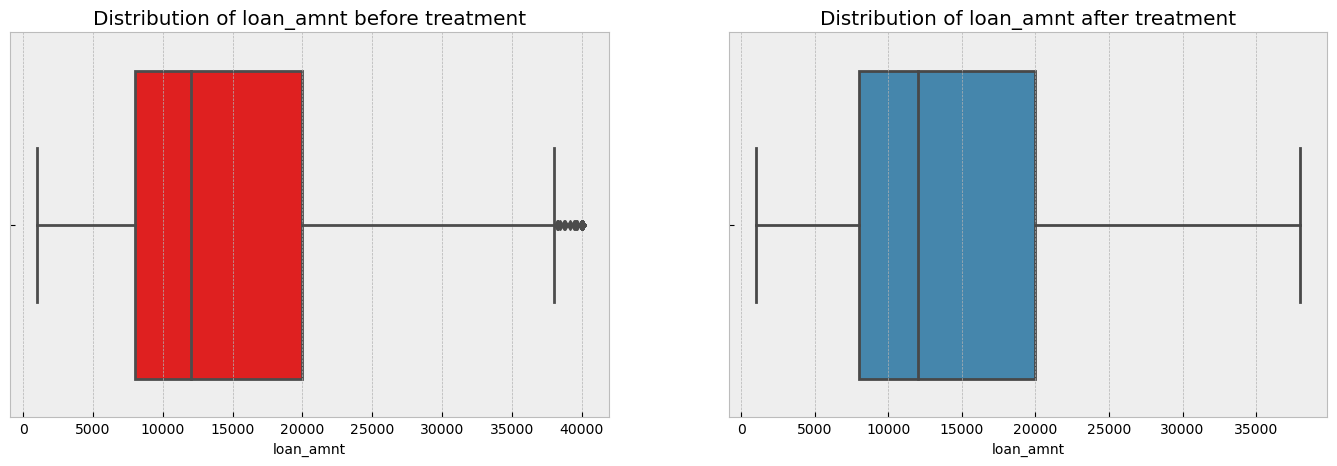

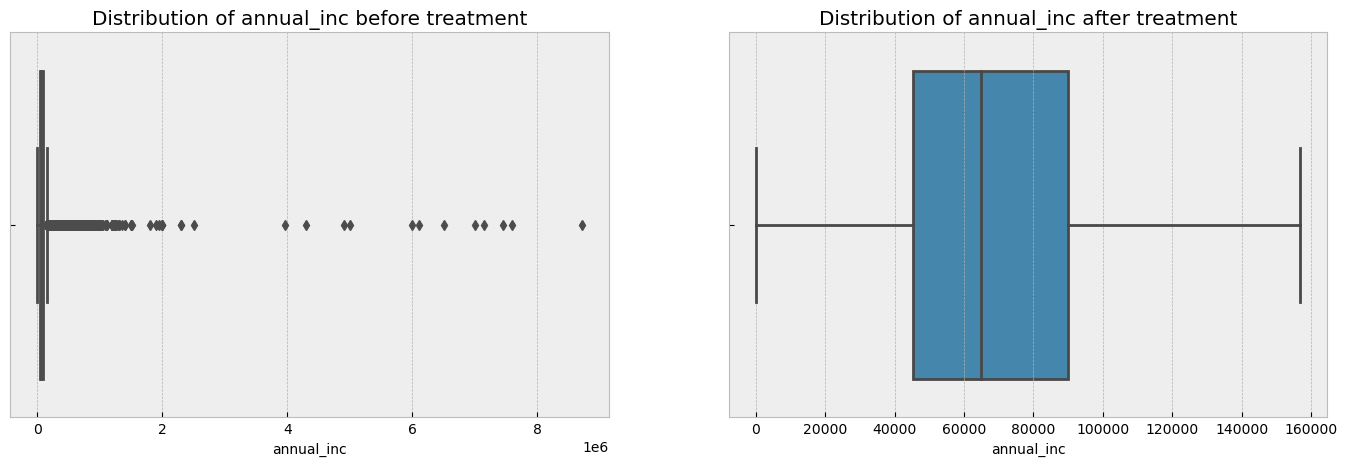

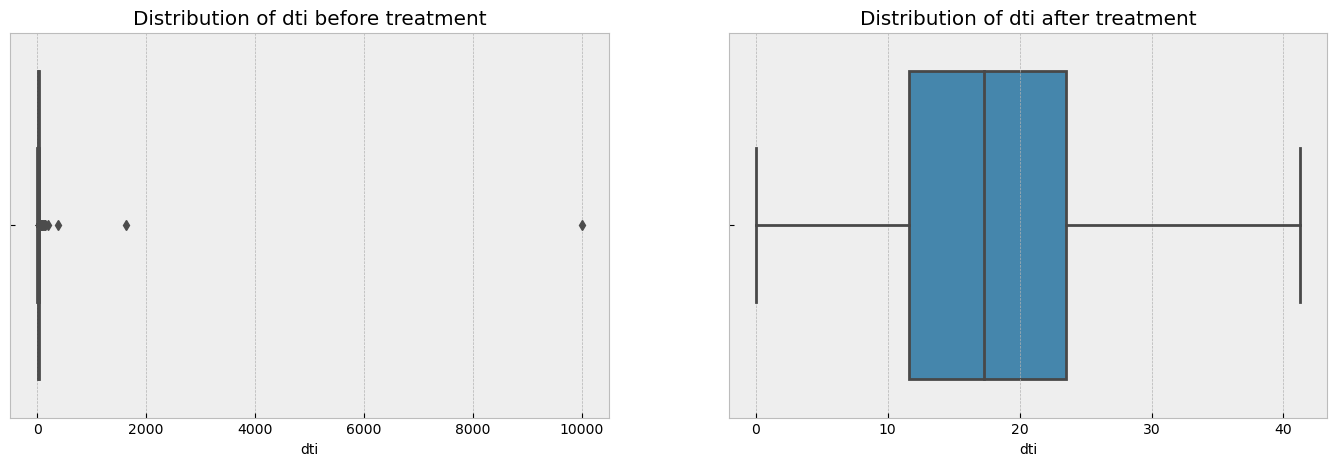

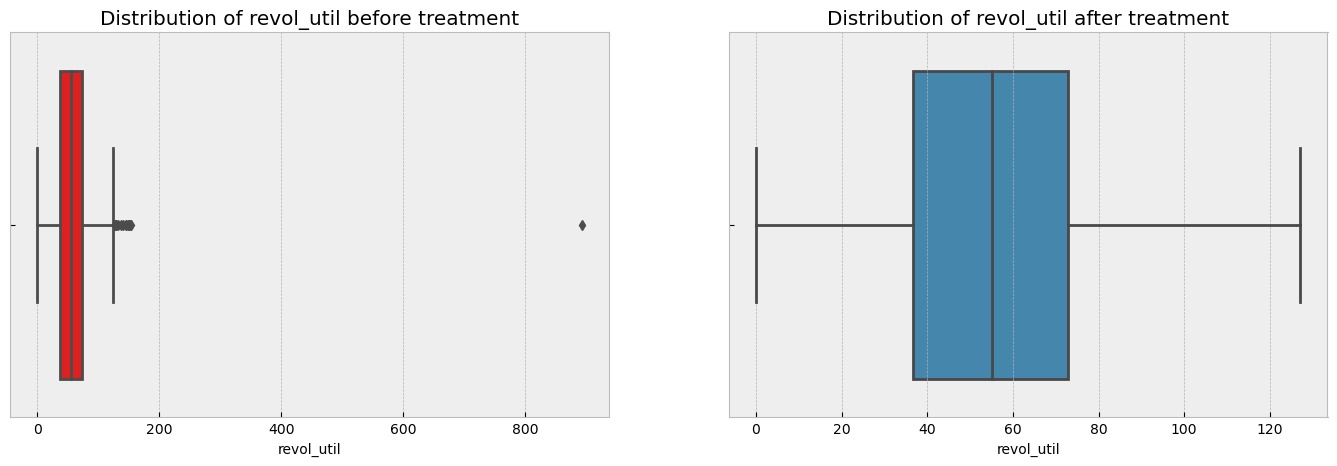

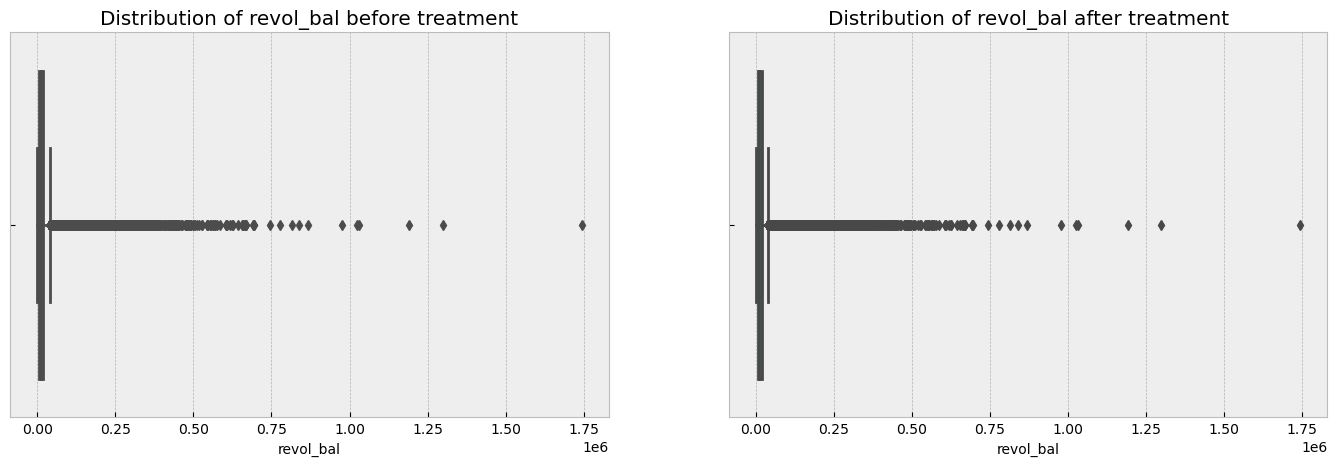

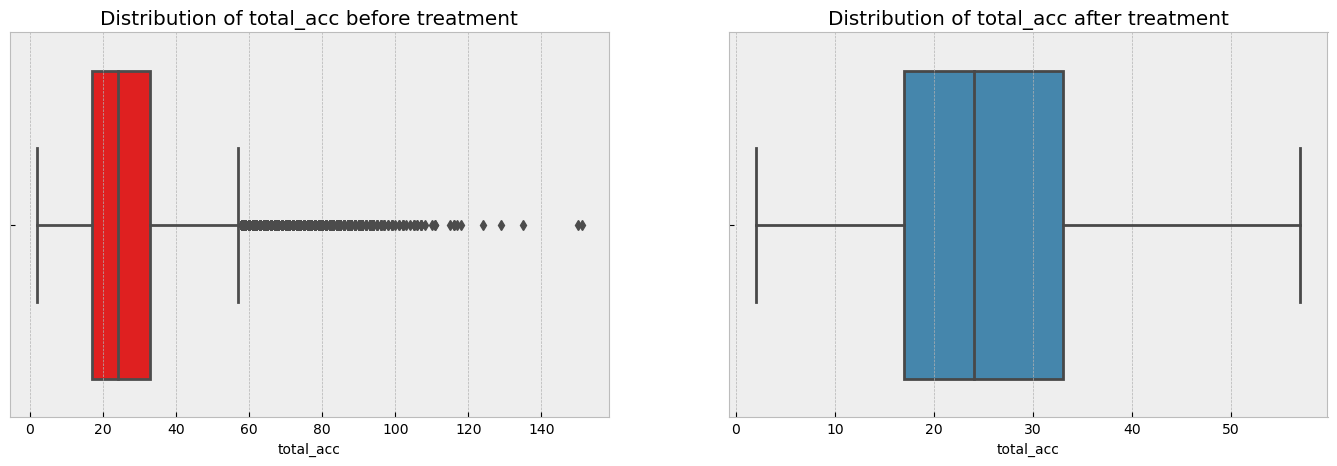

In [32]:
cols =['loan_amnt', 'annual_inc','dti','revol_util','revol_bal','total_acc']
for col in cols:
    plt.figure(figsize=(17,5))
    plt.subplot(1,2,1)
    sns.boxplot(x=df[col],color='red')
    plt.title(f'Distribution of {col} before treatment')
    plt.subplot(1,2,2)
    sns.boxplot(x=new_df[col])
    plt.title(f'Distribution of {col} after treatment')
    plt.show()

In [33]:
pd.set_option('display.max_columns',33)
new_df.tail(3)

loan_amnt  term  int_rate  installment grade sub_grade  \
396026      21000    36     12.29       700.42     C        C1   
396027       5000    36      9.99       161.32     B        B1   
396028      21000    60     15.31       503.02     C        C2   

                   emp_title emp_length home_ownership  annual_inc  \
396026                 agent    5 years       MORTGAGE      110000   
396027          city carrier  10+ years           RENT       56500   
396028  gracon services, inc  10+ years       MORTGAGE       64000   

       verification_status loan_status             purpose  \
396026     Source Verified  Fully Paid  debt_consolidation   
396027            Verified  Fully Paid  debt_consolidation   
396028            Verified  Fully Paid  debt_consolidation   

                       title    dti  earliest_cr_line  open_acc  revol_bal  \
396026    debt consolidation  21.45              2006         8      43263   
396027  pay off credit cards  17.56              1997        23      32704   
396028         loanforpayoff  15.88              1990        20      15704   

        revol_util  total_acc initial_list_status application_type  mort_acc  \
396026        95.7        8.0                   f       INDIVIDUAL         1   
396027        66.9       23.0                   f       INDIVIDUAL         0   
396028        53.8       20.0                   f       INDIVIDUAL         5   

        pub_rec_bankruptcies  issue_year  issue_month  issue_quarter  \
396026                     0        2015            2              1   
396027                     0        2013           10              4   
396028                     0        2012            8              3   

        earliest_cr_month  earliest_cr_quarter state  credit_line_delta  
396026                  2                    1    LA                  9  
396027                  3                    1    NY                 16  
396028                 11                    4    FL                 22

# `VISUALIZATION OF THE DATA`

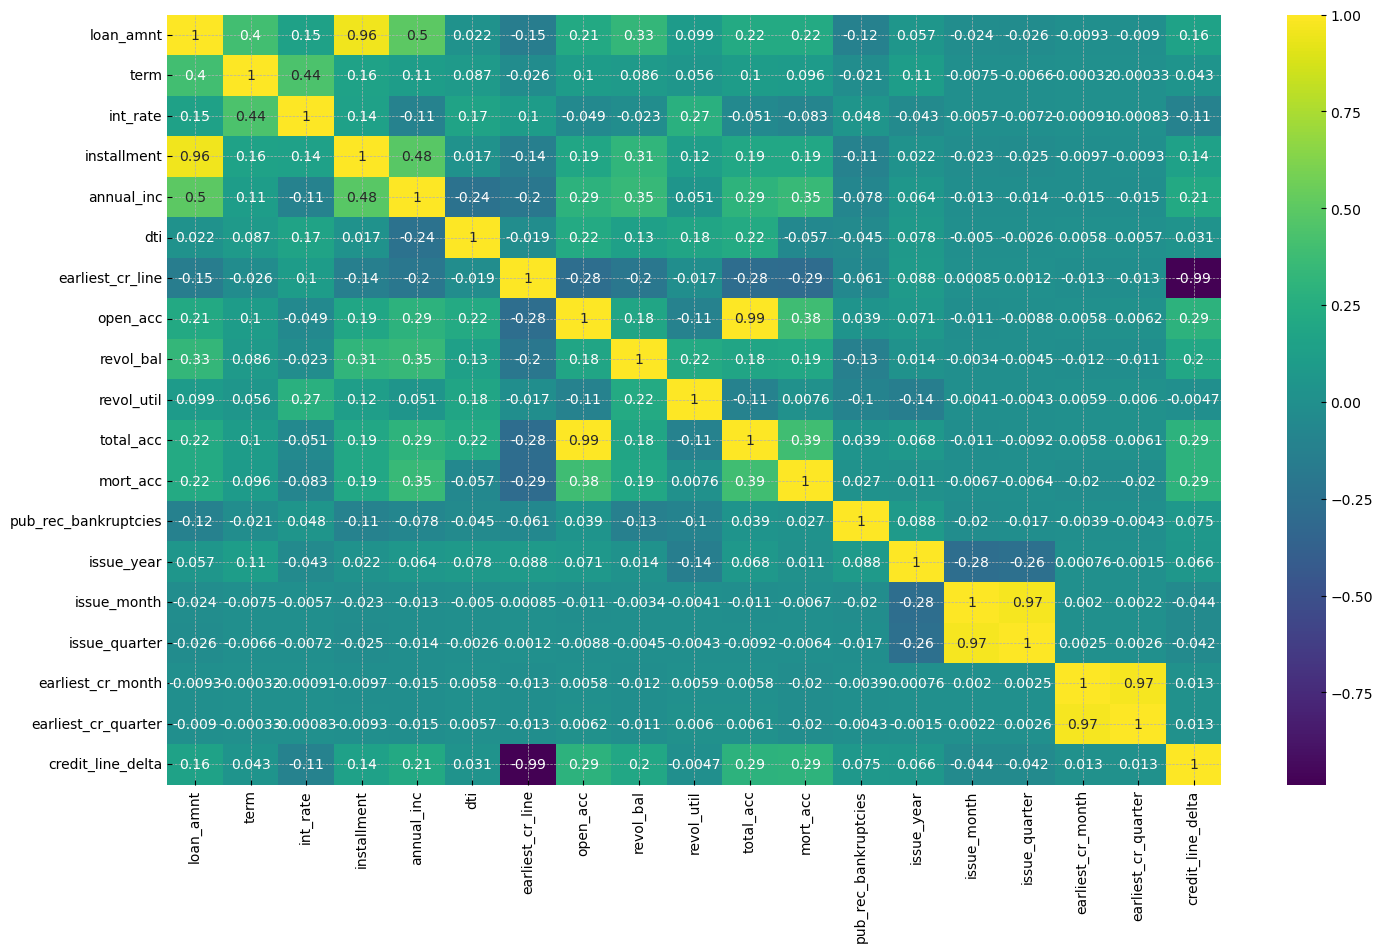

In [34]:
plt.figure(figsize=(17,10))
sns.heatmap(data=new_df.corr(),annot=True,cmap='viridis')
plt.show()

- **Loan Amount (loan_amnt) and Installment (installment):** These two variables have a strong positive correlation of 0.955. This indicates that as the loan amount increases, the monthly installment amount also increases significantly.
- **Loan Amount (loan_amnt) and Annual Income (annual_inc):** There is a moderate positive correlation of 0.502 between the loan amount and annual income. This suggests that borrowers with higher annual incomes tend to apply for larger loan amounts.
- **Term and loan_amnt:** the correlation is 0.40 indicating a moderate positive correlation. This means that there is a tendency for longer-term loans to have larger loan amounts, although the correlation is not extremely strong.
- **Term and int_rate:** The correlation is 0.43, which also shows a moderate positive correlation. This suggests that longer-term loans tend to have slightly higher interest rates, but again, the correlation is not exceptionally strong.
- **Loan Amount (loan_amnt) and Revolving Balance (revol_bal):** There is a moderate positive correlation of 0.327 between the loan amount and revolving balance. This implies that borrowers with higher revolving balances may seek larger loan amounts.
- **Loan Amount (loan_amnt) and Total Accounts (total_acc):** There is a moderate positive correlation of 0.217 between the loan amount and total accounts. This suggests that borrowers with more total accounts may apply for larger loan amounts.
- **Installment (installment) and Annual Income (annual_inc):** The installment amount has a moderate positive correlation of 0.485 with annual income. This indicates that borrowers with higher incomes may have higher monthly installment amounts.
- **Open Accounts (open_acc) and Total Accounts (total_acc):** These two variables have a very strong positive correlation of 0.994. This indicates that the number of open accounts is highly correlated with the total number of accounts.
- **Credit Line Delta (credit_line_delta) and Earliest Credit Line Quarter (earliest_cr_quarter):** These two variables have a strong negative correlation of -0.988. This suggests that the difference in credit lines and the quarter when the earliest credit line was opened are inversely related.

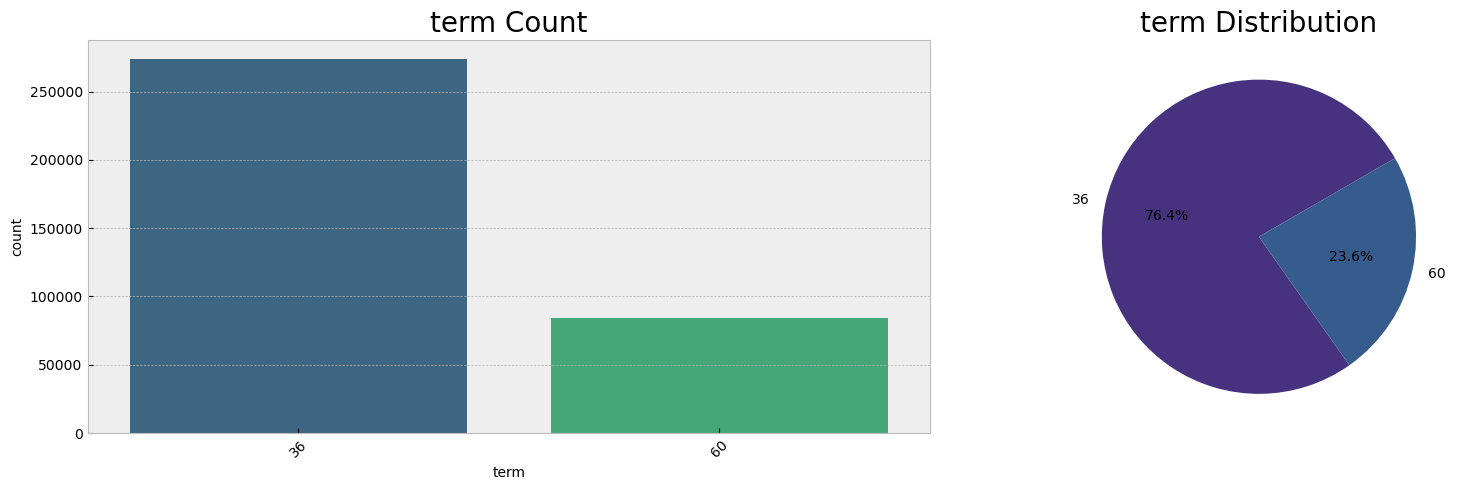

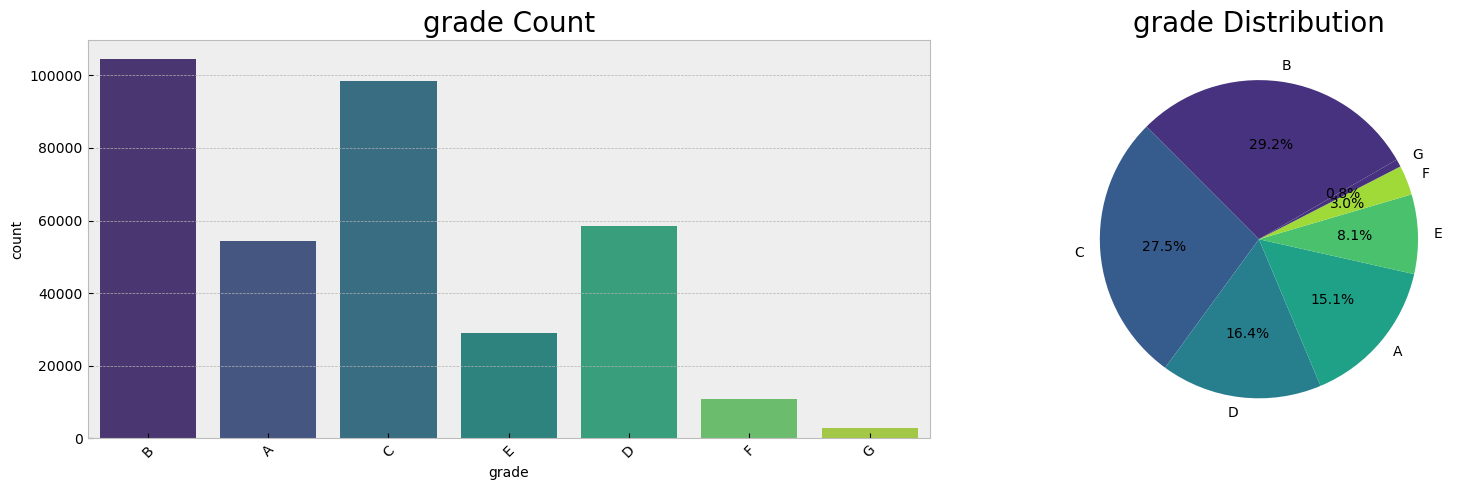

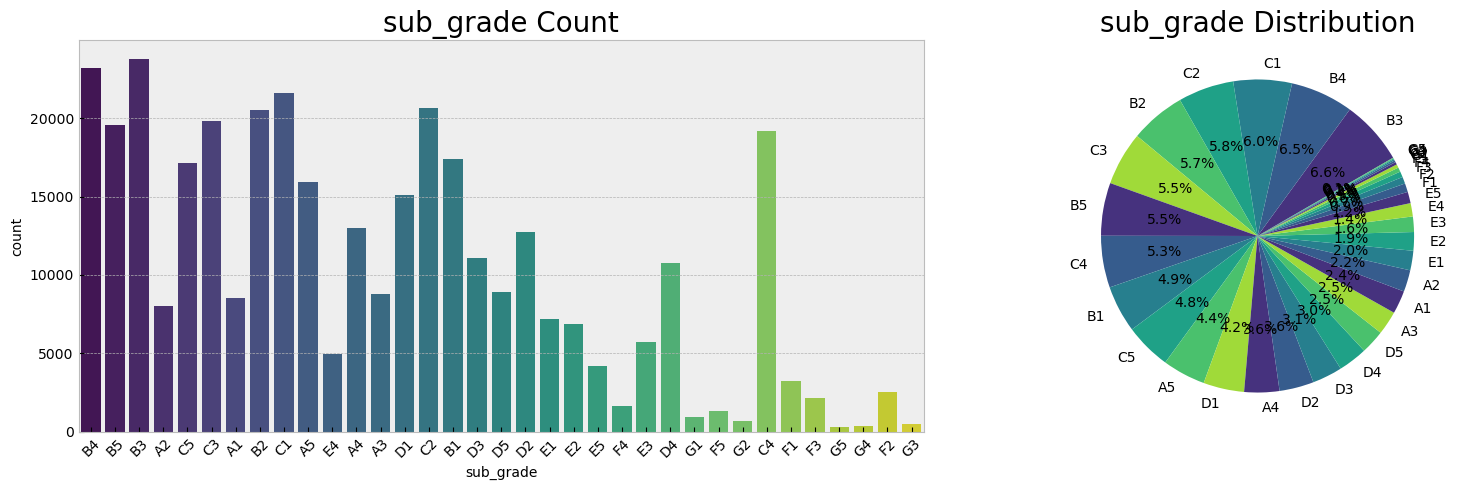

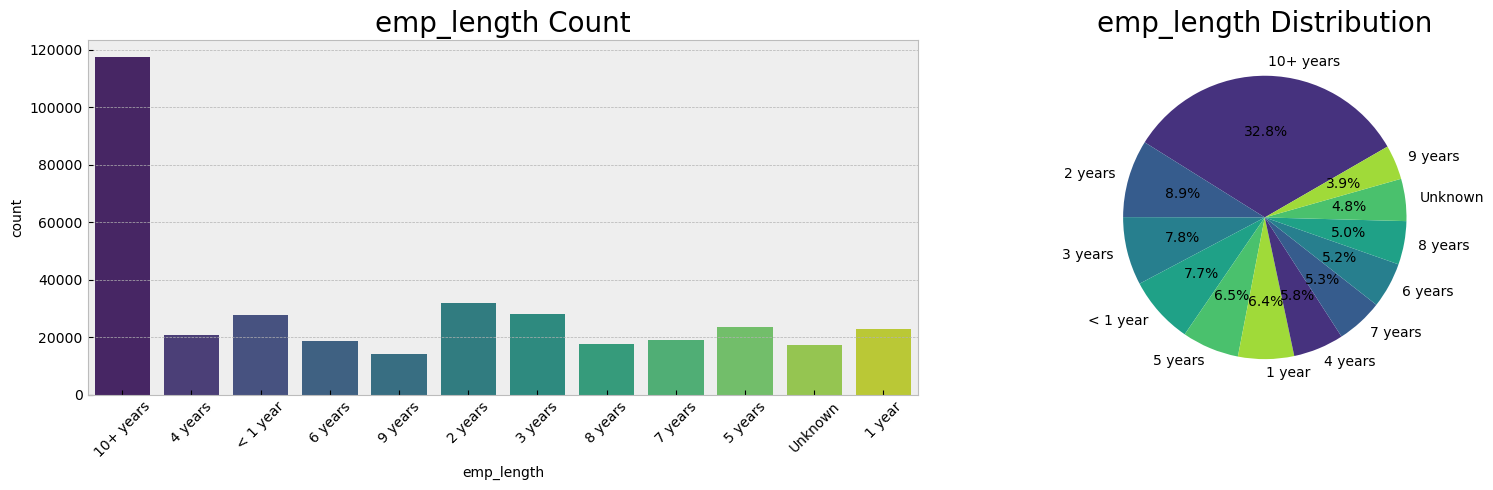

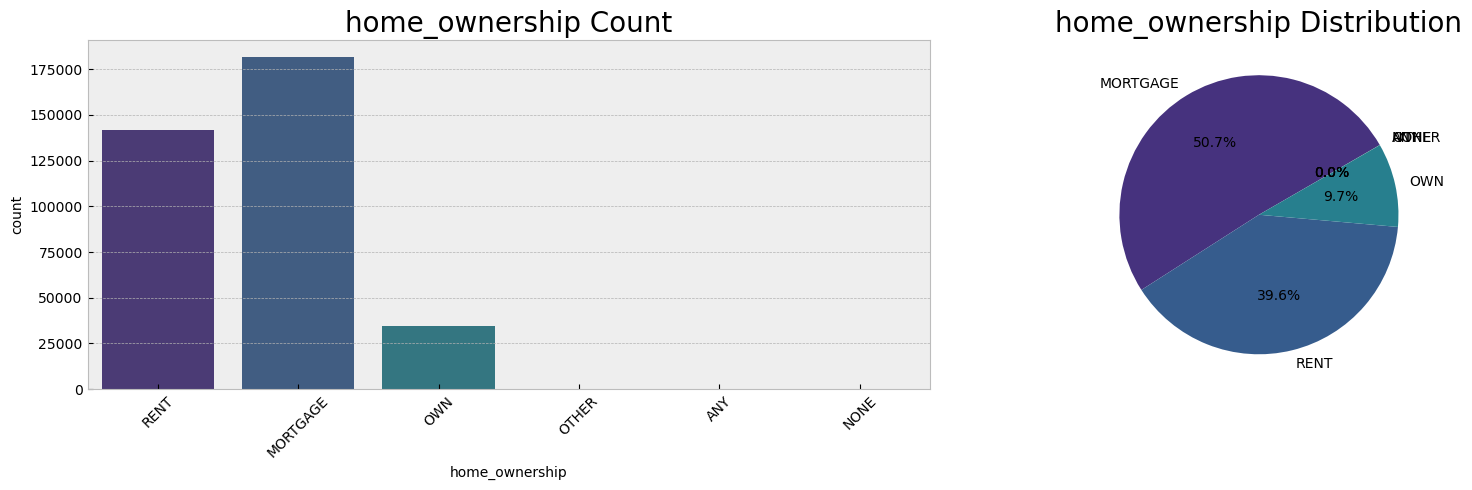

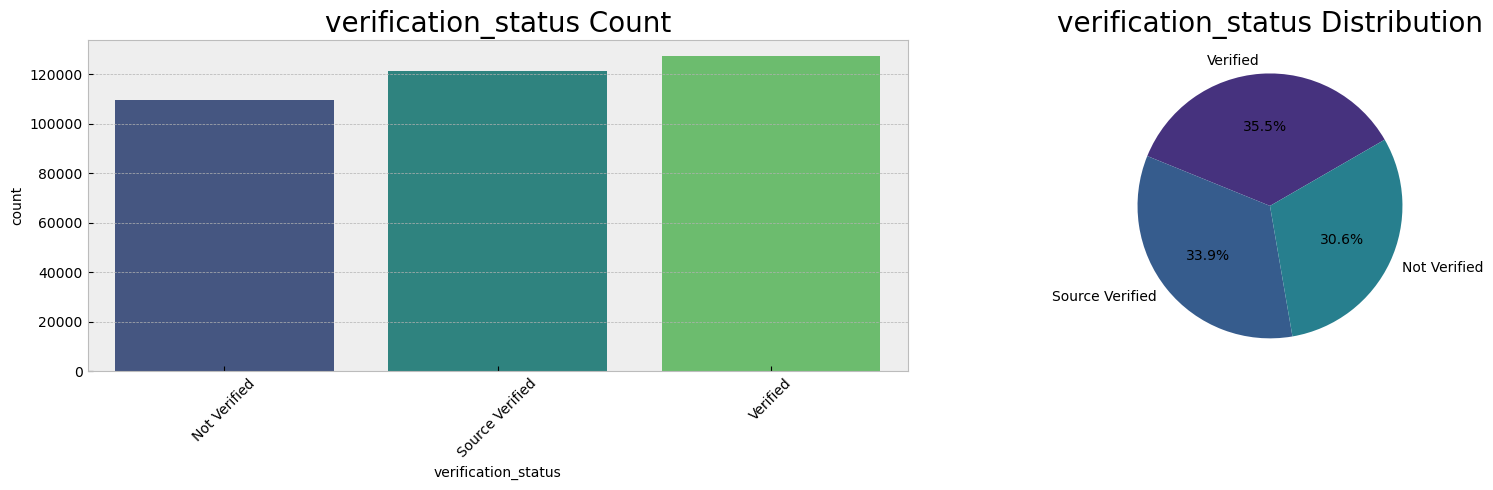

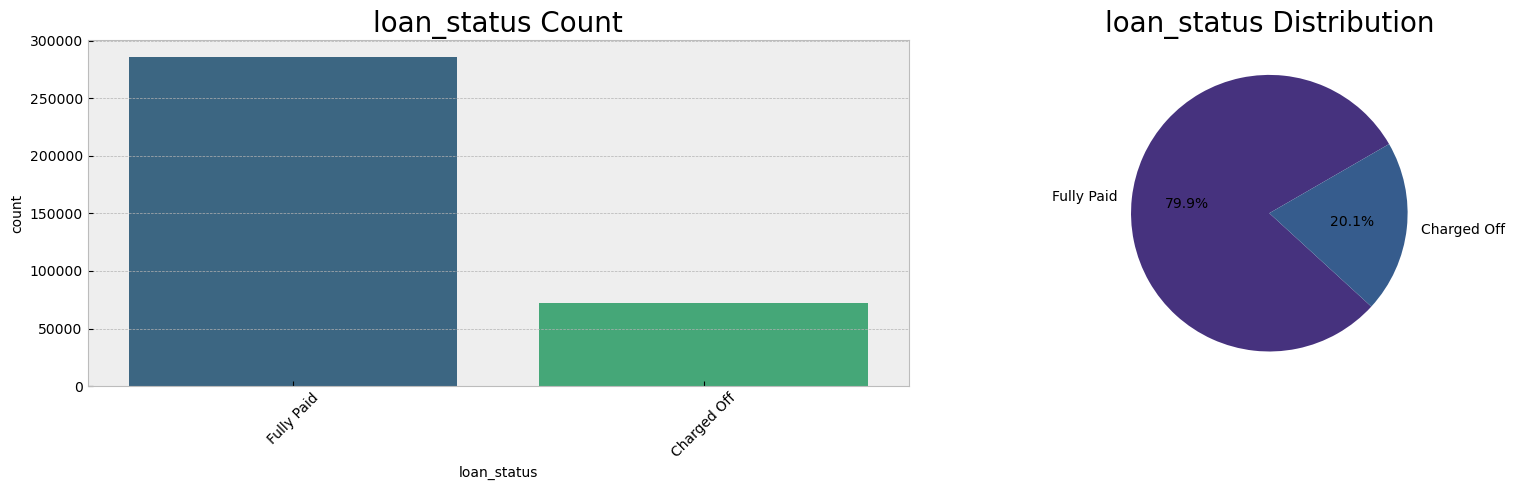

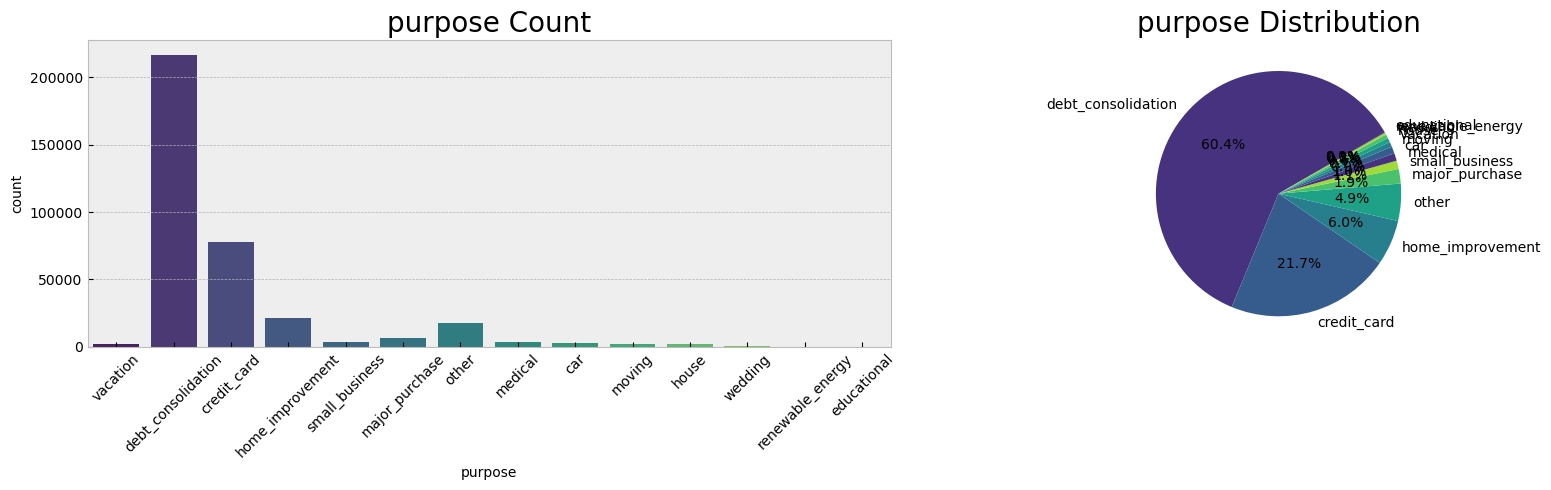

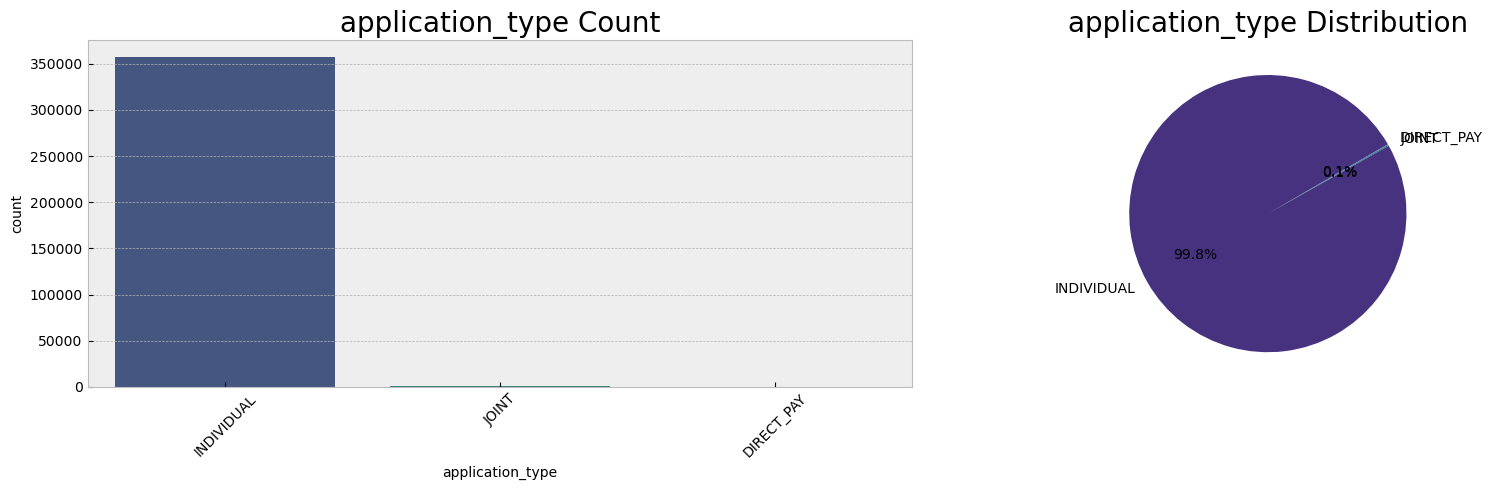

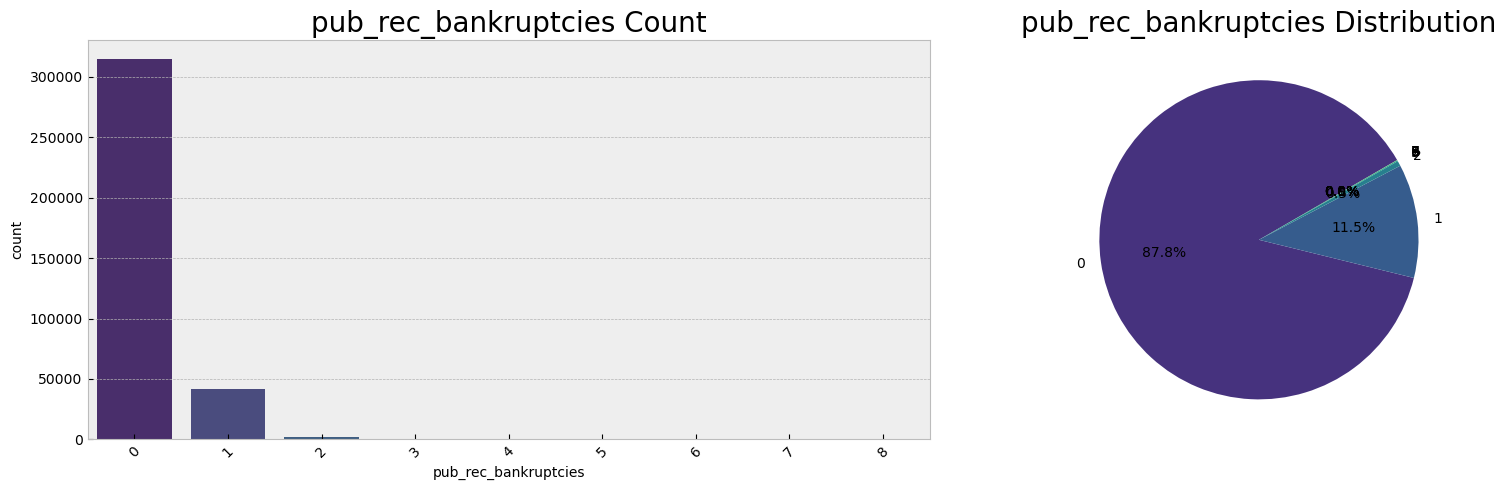

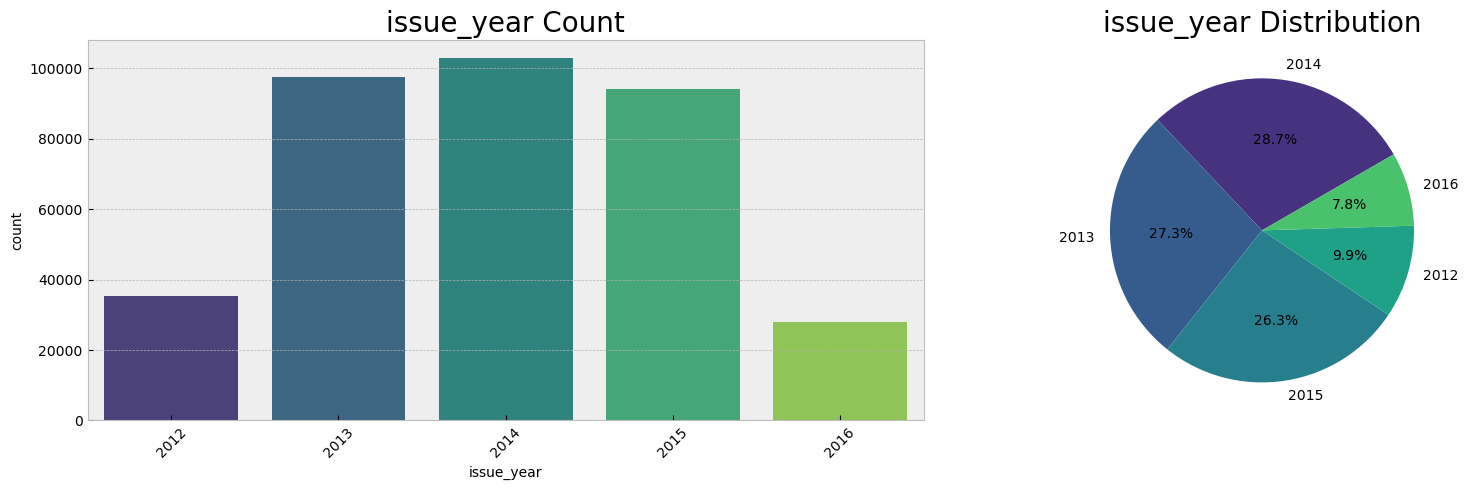

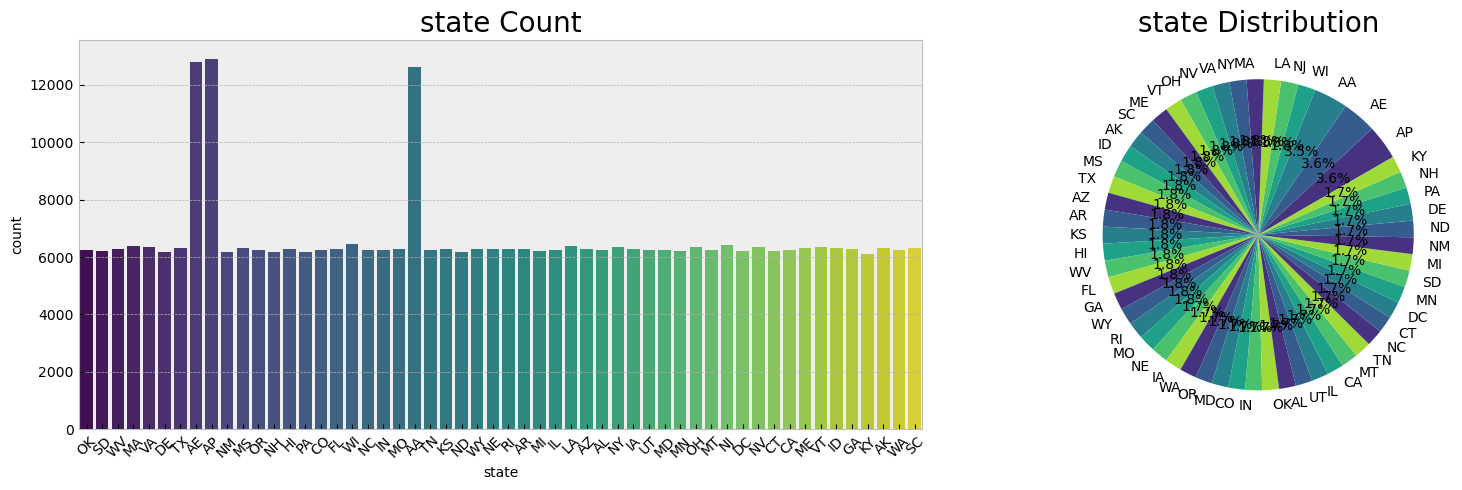

In [35]:
cols = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status',
        'purpose', 'application_type', 'pub_rec_bankruptcies', 'issue_year','state']

# Iterate through each column
for col in cols:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 5))

    # Countplot on the left side
    sns.countplot(x=col, data=new_df, ax=axes[0], palette='viridis')
    axes[0].set_title(f'{col} Count', fontsize=20)
    axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis tick labels

    # Pie plot on the right side
    col_counts = new_df[col].value_counts()
    axes[1].pie(col_counts, labels=col_counts.index, autopct='%1.1f%%', startangle=30, colors=sns.color_palette('viridis'))
    axes[1].set_title(f'{col} Distribution', fontsize=20)
    axes[1].set_xticks([])  # Remove x-axis ticks for better readability

    # Adjust layout
    plt.tight_layout()
    plt.show()


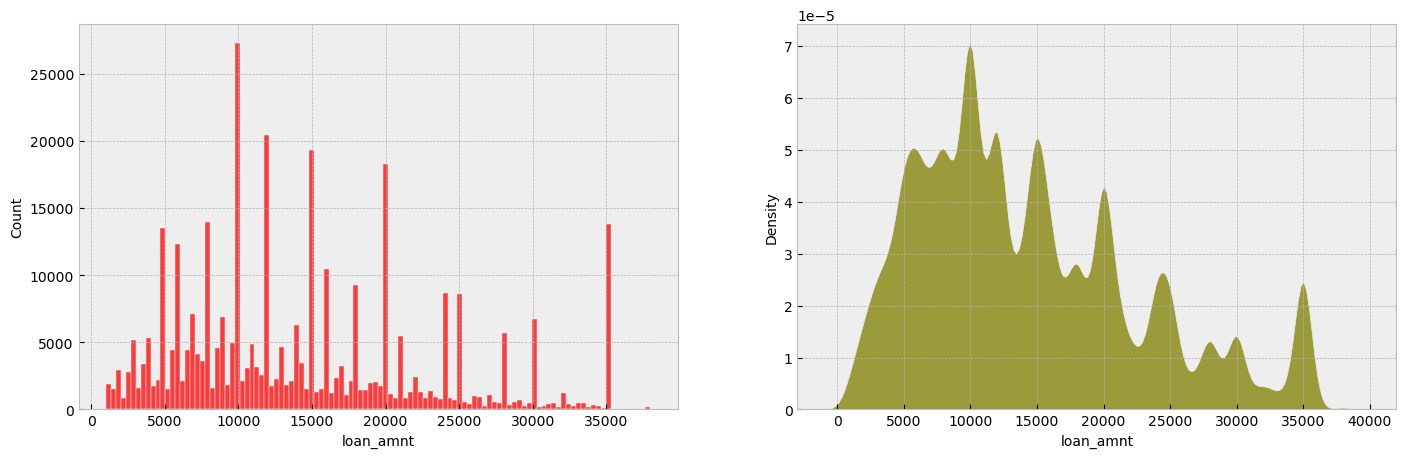

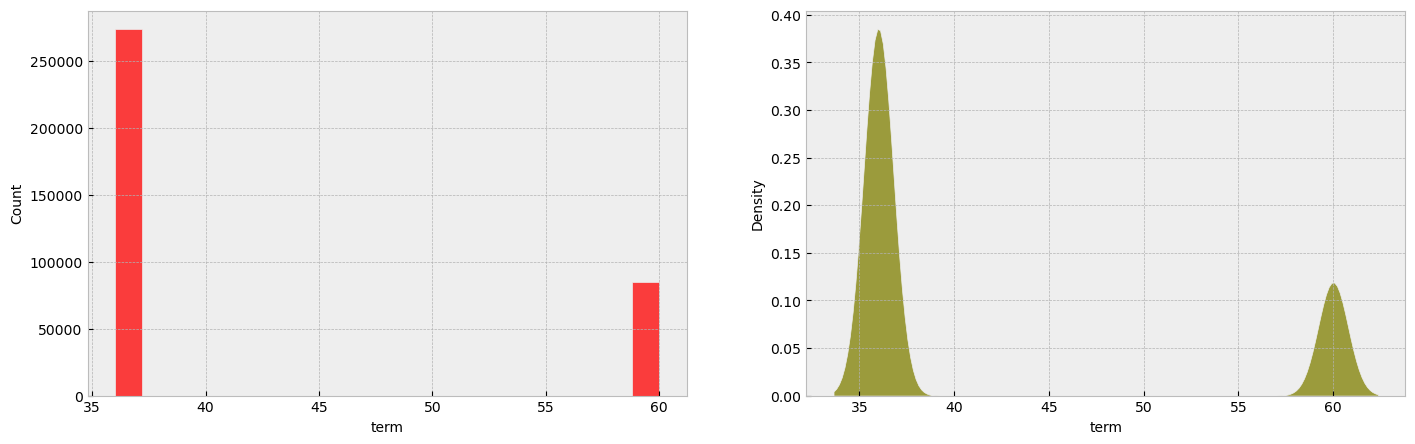

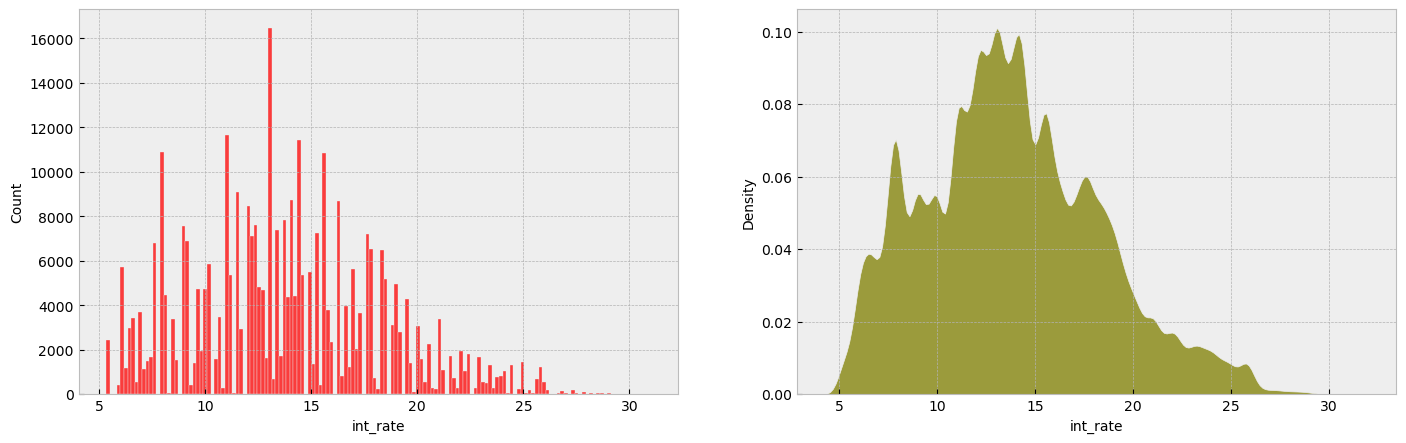

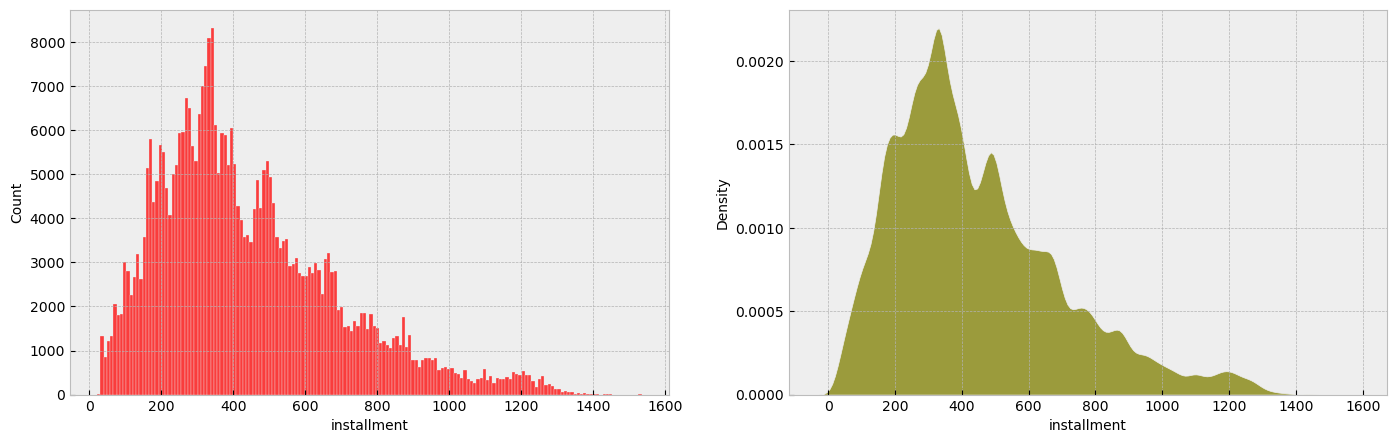

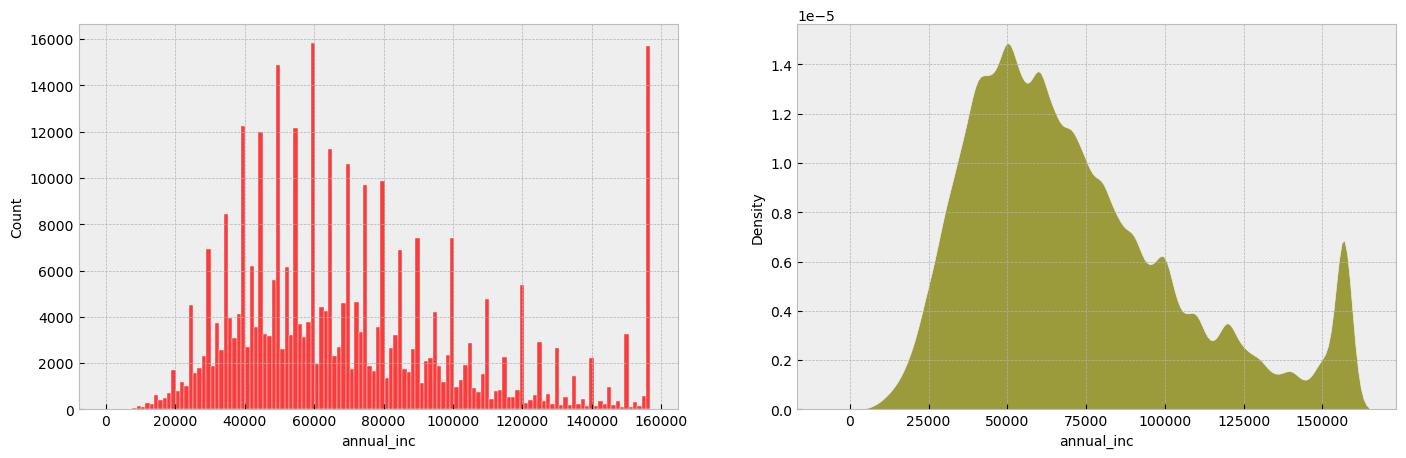

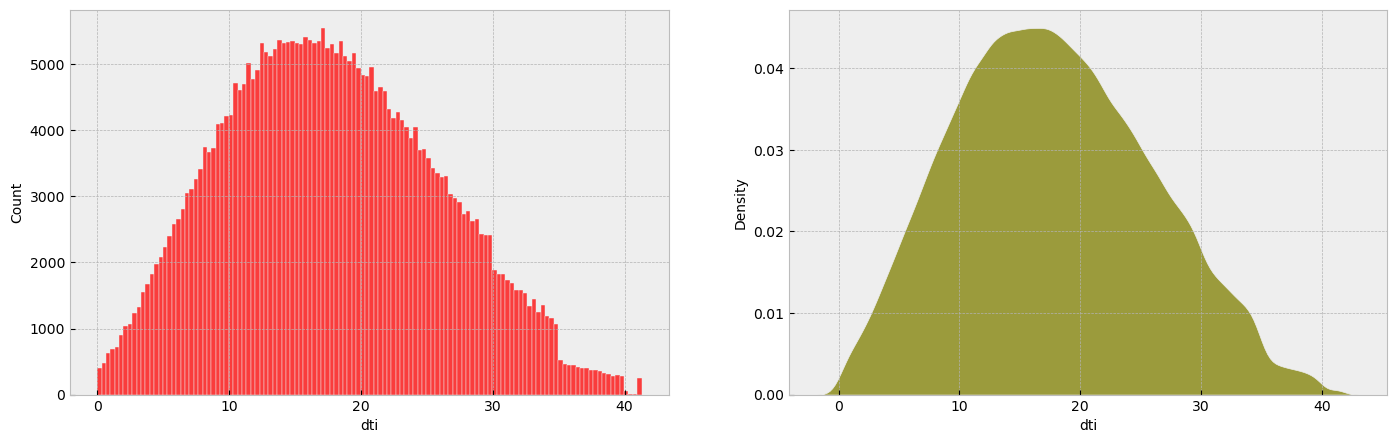

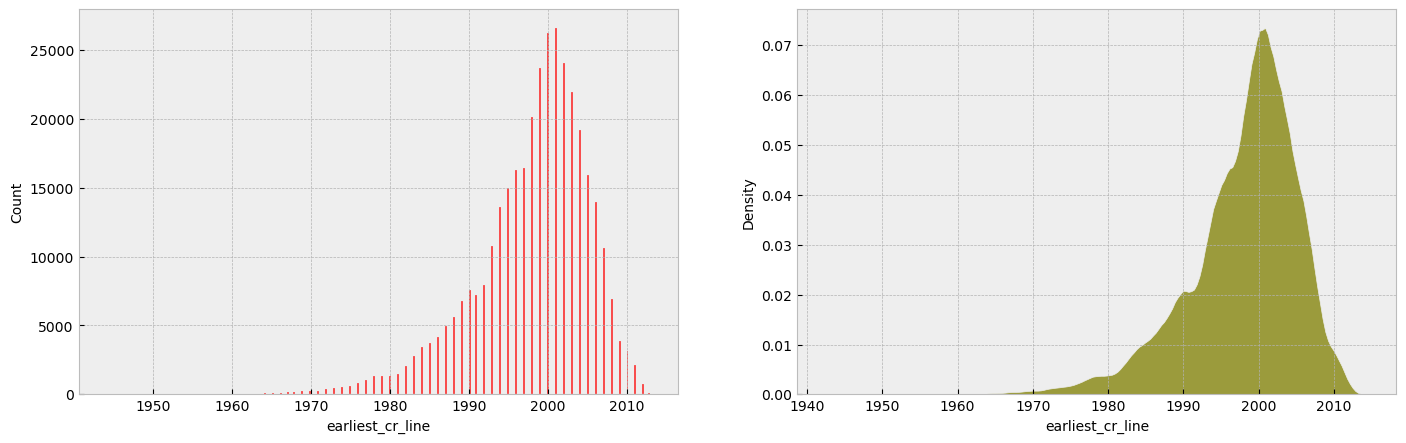

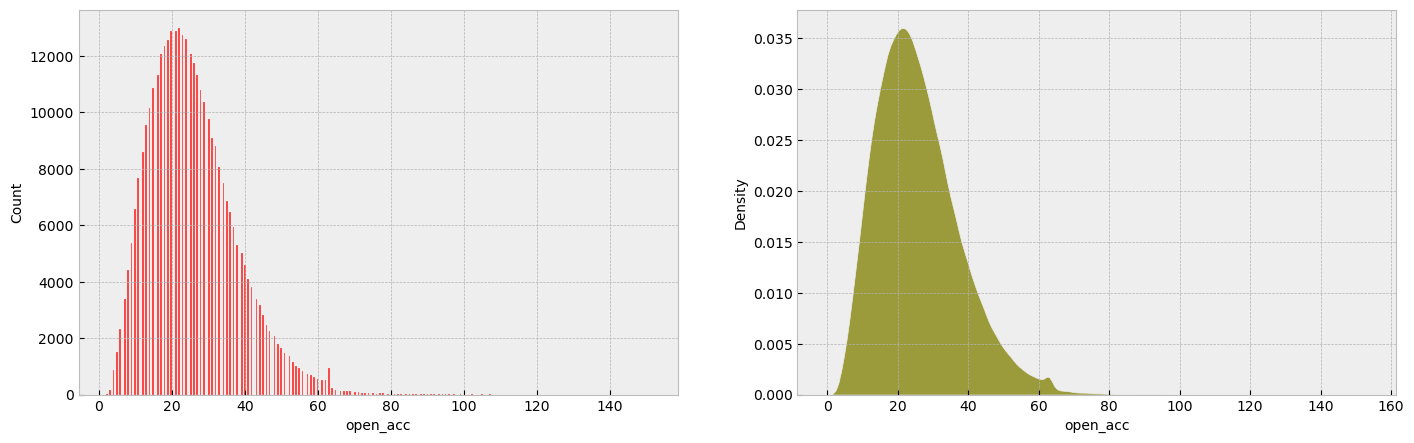

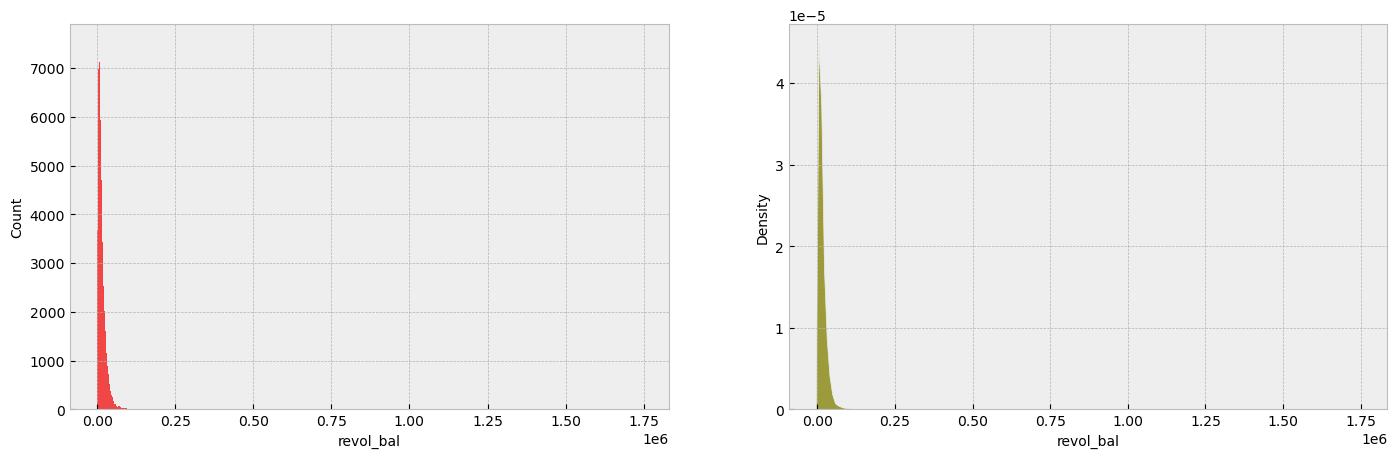

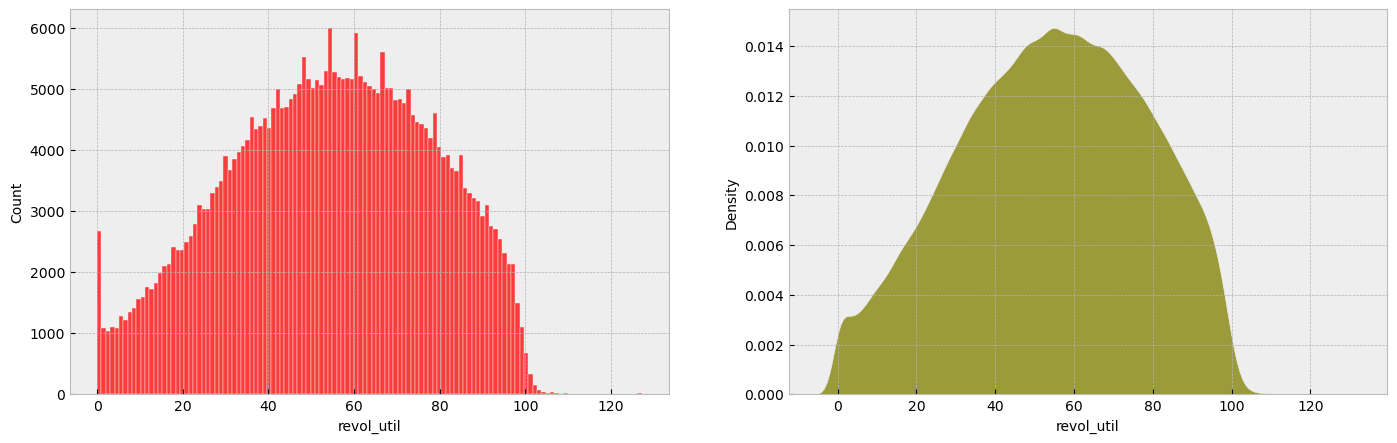

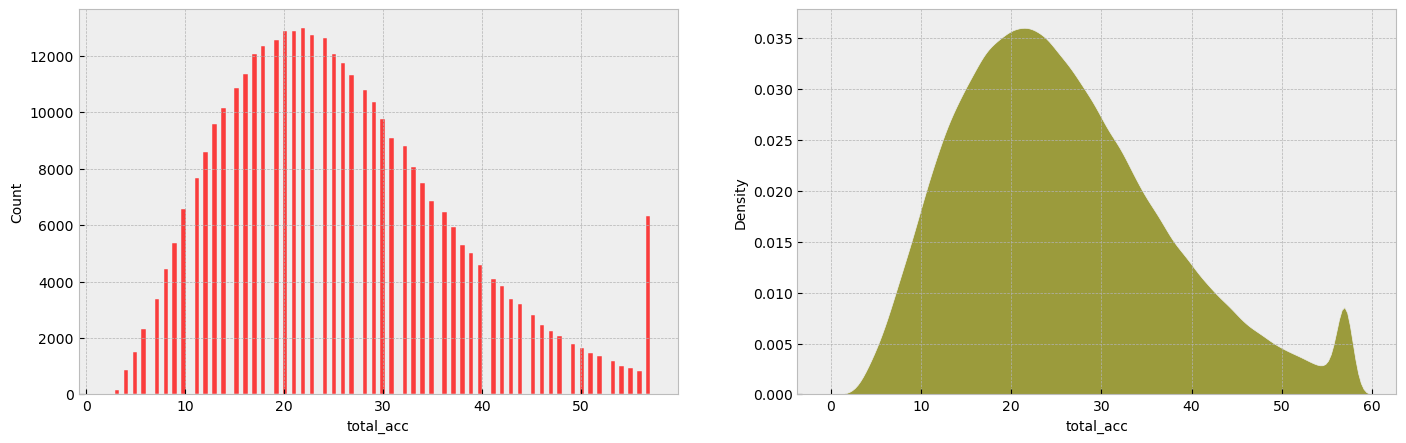

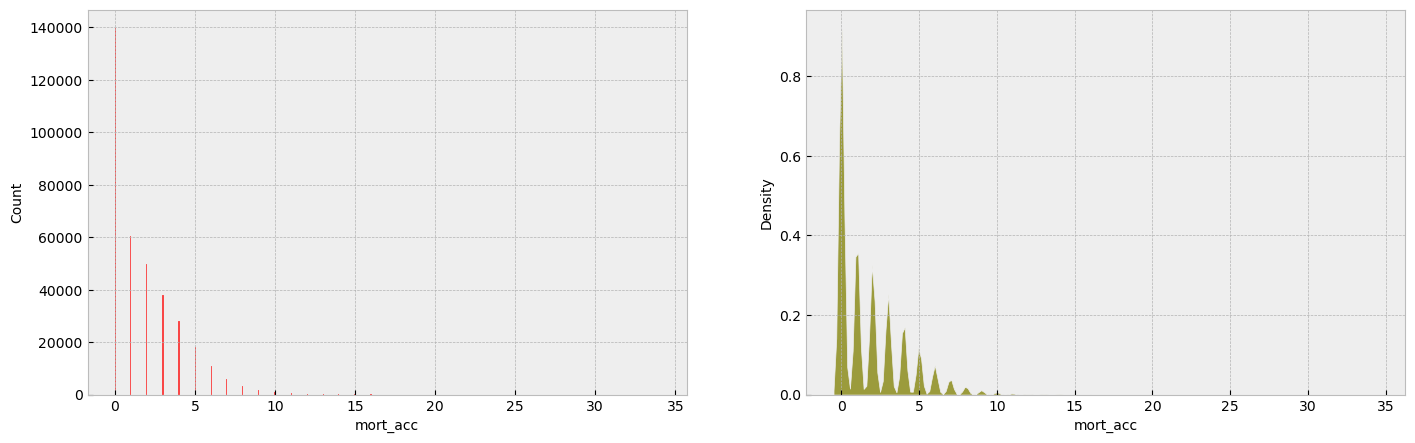

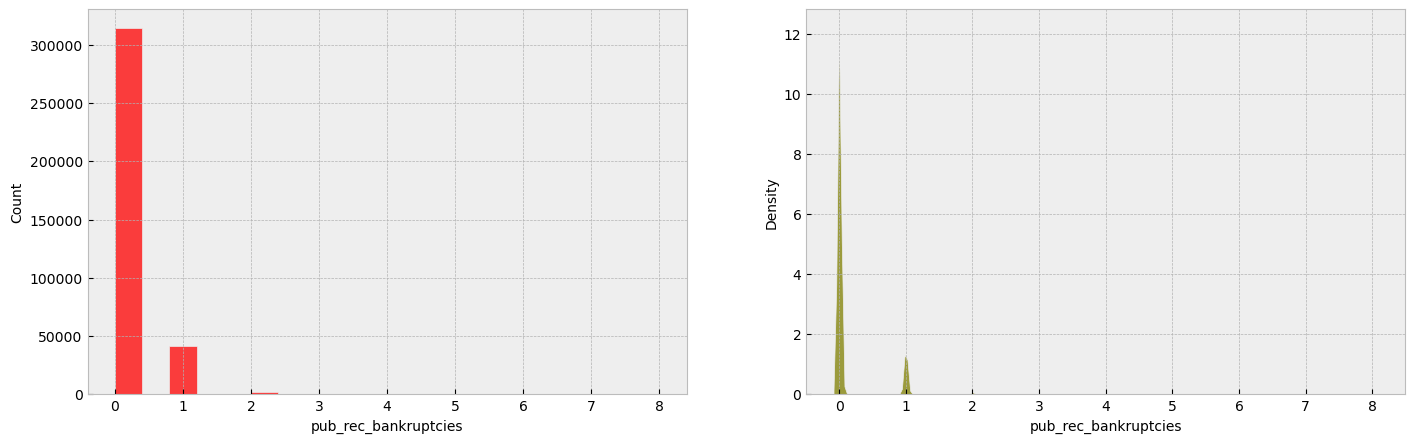

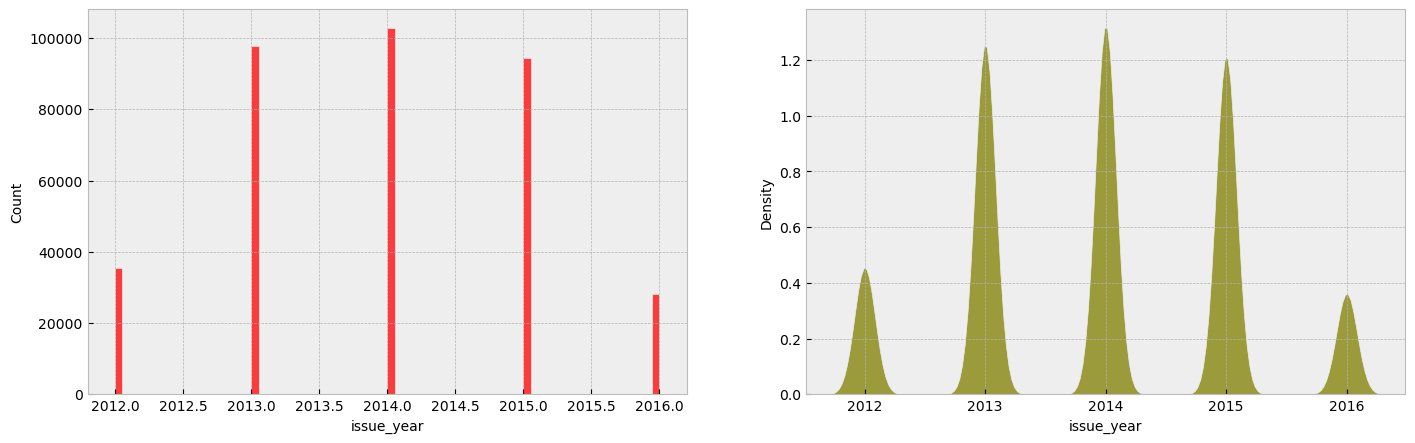

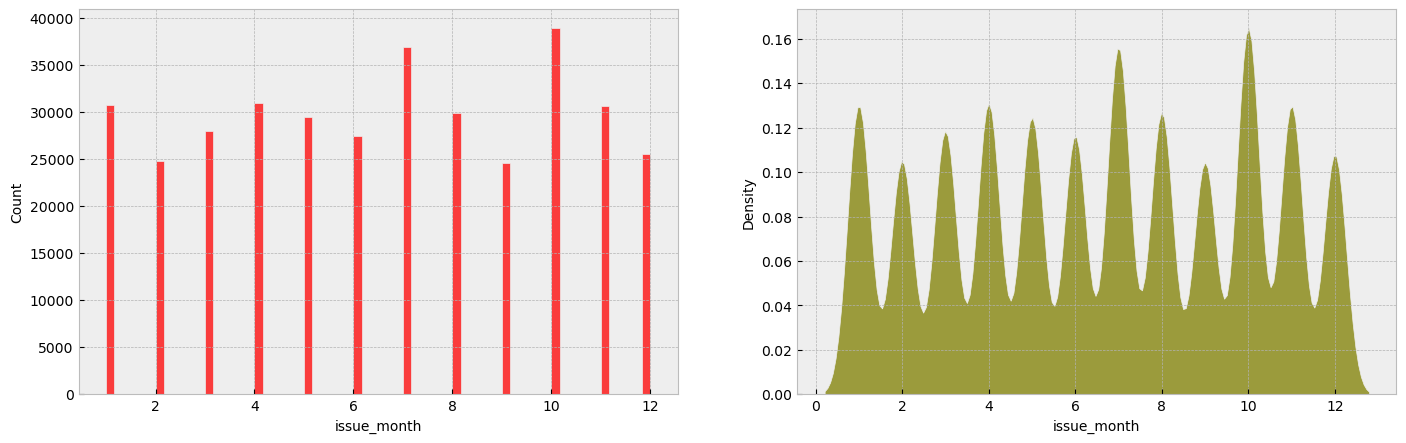

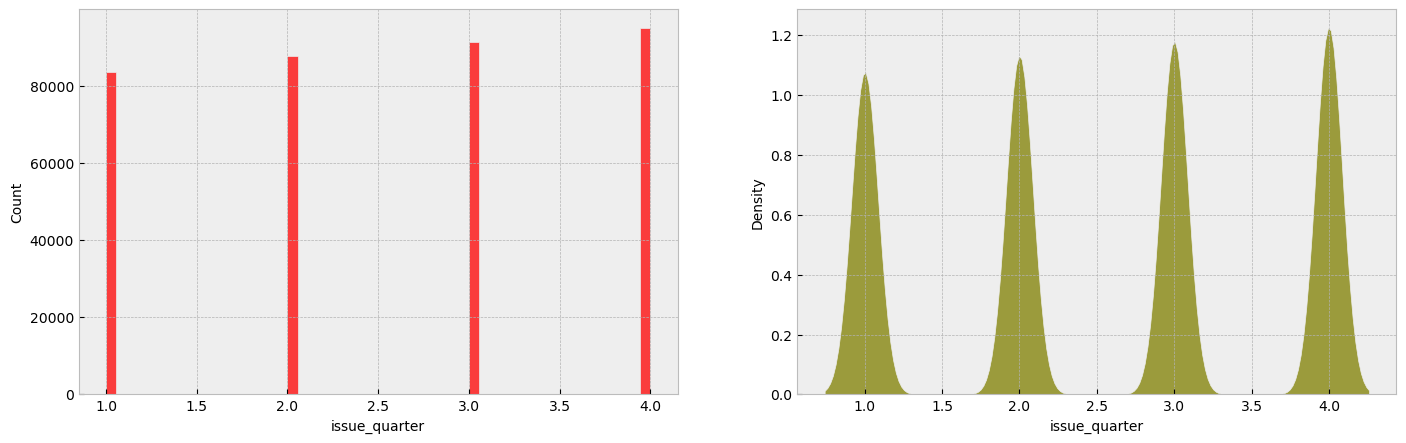

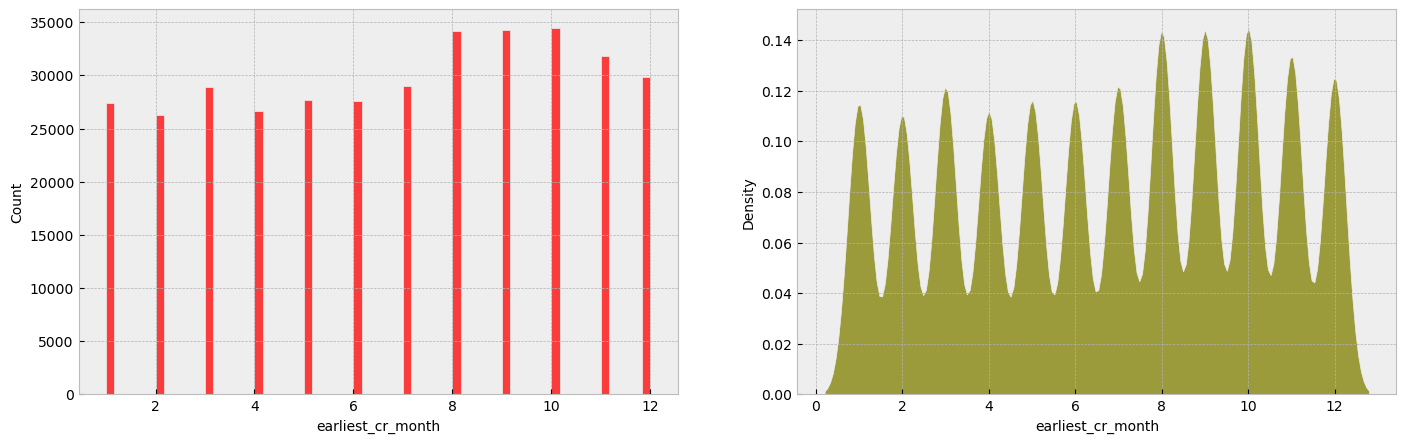

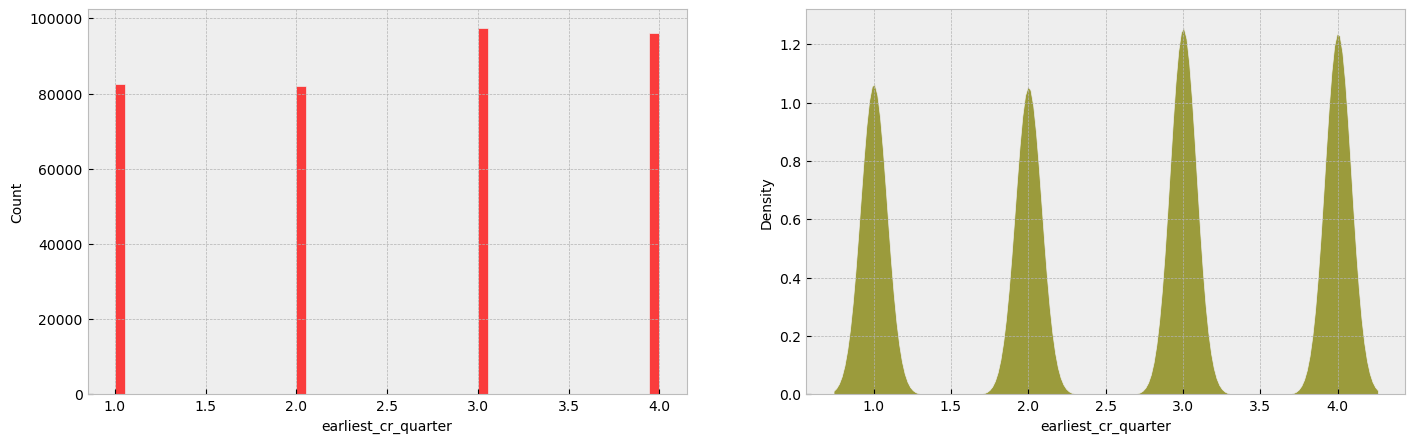

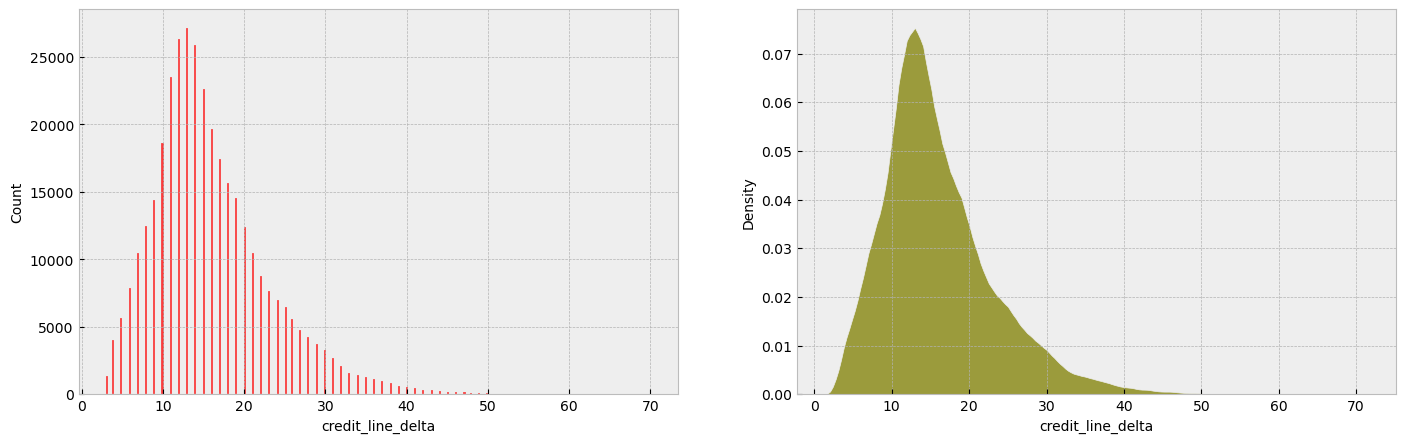

In [36]:
numeric_cols = new_df.select_dtypes(include=['int64', 'float64'])
for col in numeric_cols:
    plt.figure(figsize=(17,5))
    plt.subplot(1,2,1)
    sns.histplot(x=new_df[col],color='red')
#     plt.title(f'Distribution of {col} before treatment')
    plt.subplot(1,2,2)
    sns.kdeplot(x=new_df[col],multiple='stack',color='olive')
#     plt.title(f'Distribution of {col} after treatment')
    plt.show()

# `DATA MINING AND DATA VISUALIZATION`

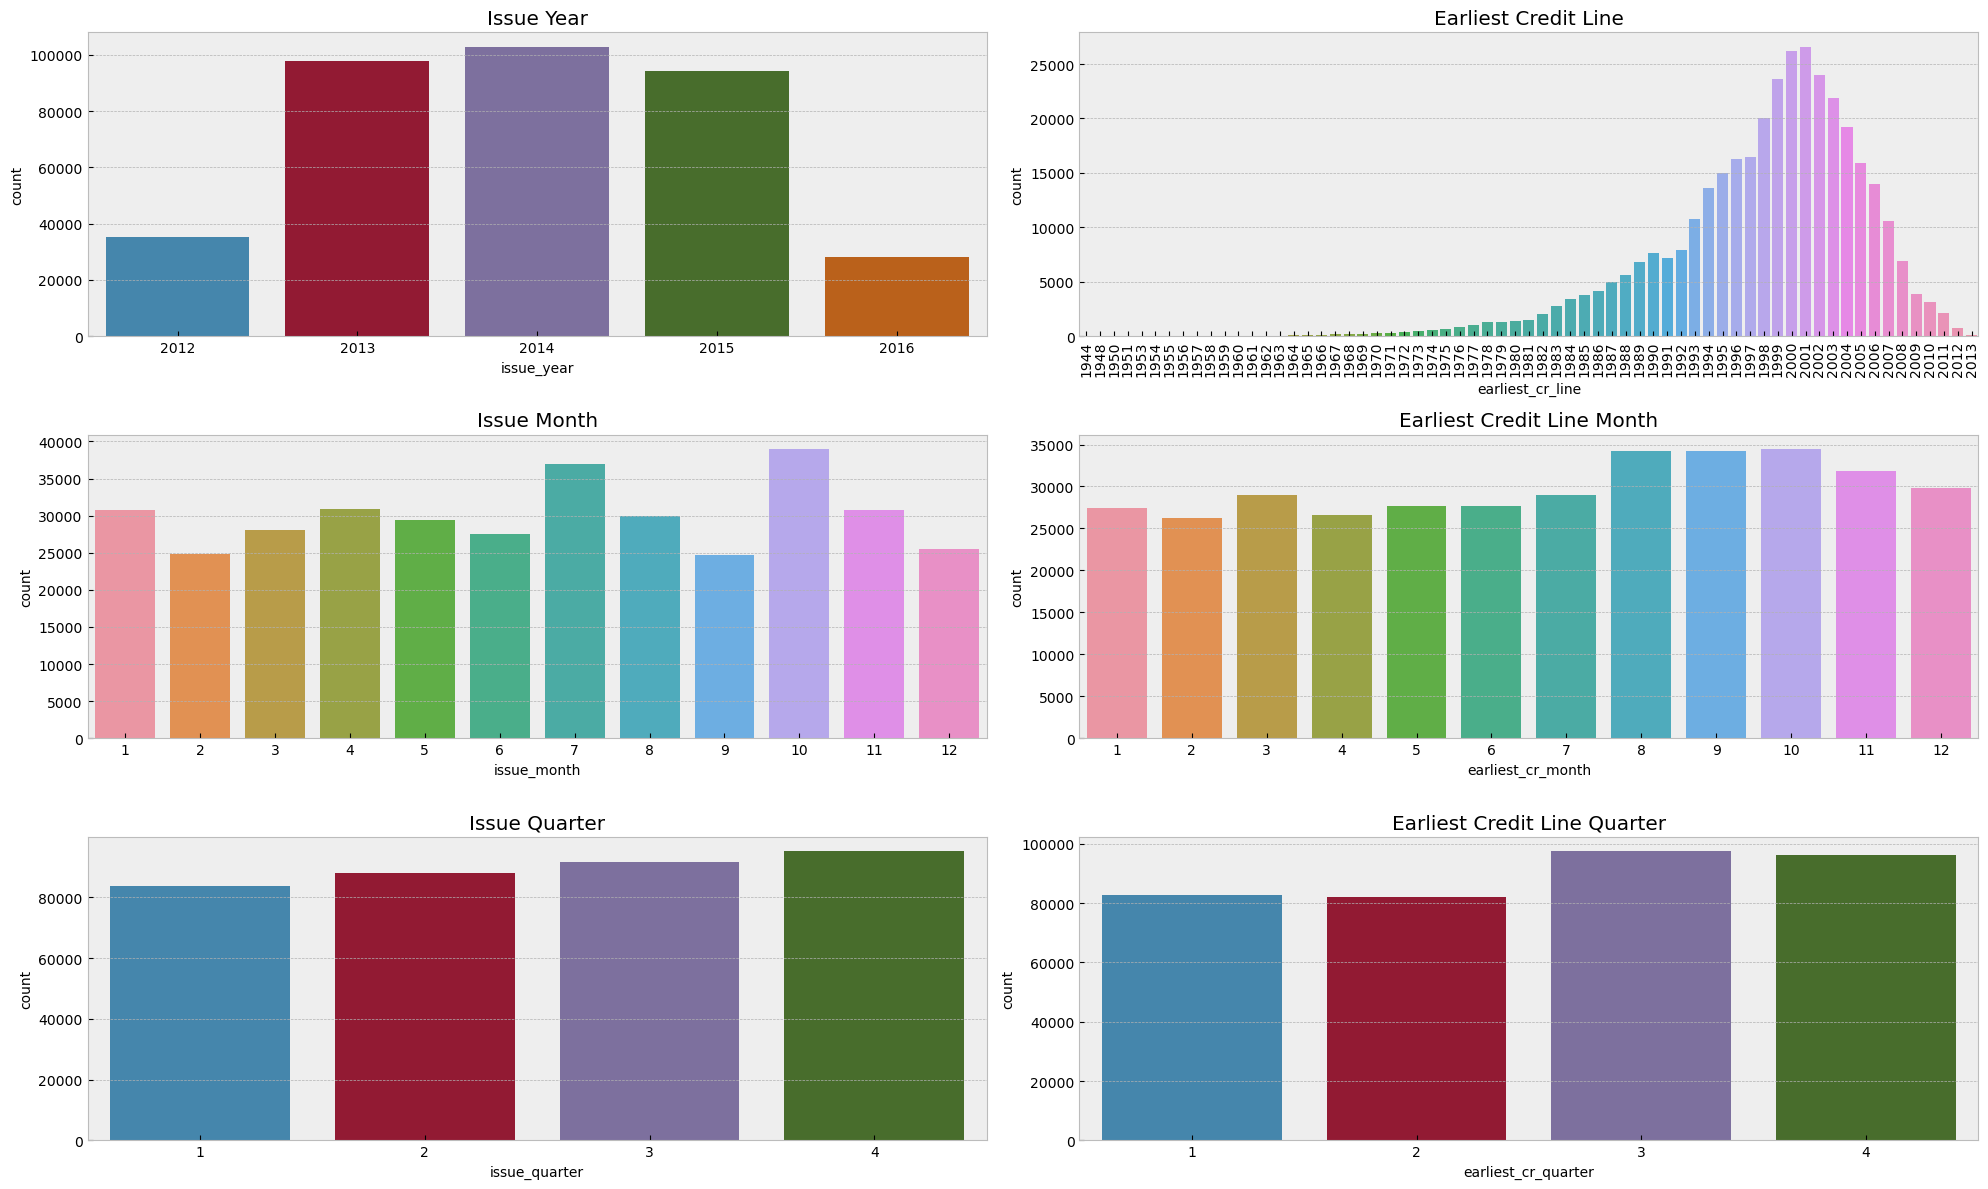

In [37]:
fig, axes = plt.subplots(3, 2, figsize=(20, 12))

# Plotting issue_year, issue_month, and issue_quarter in odd-numbered positions
sns.countplot(x='issue_year', data=new_df, ax=axes[0, 0])
axes[0, 0].set_title('Issue Year')

sns.countplot(x='issue_month', data=new_df, ax=axes[1, 0])
axes[1, 0].set_title('Issue Month')

sns.countplot(x='issue_quarter', data=new_df, ax=axes[2, 0])
axes[2, 0].set_title('Issue Quarter')

# Plotting earliest_cr_line, earliest_cr_month, and earliest_cr_quarter in even-numbered positions
sns.countplot(x='earliest_cr_line', data=new_df, ax=axes[0, 1])
axes[0, 1].set_title('Earliest Credit Line')
axes[0, 1].tick_params(axis='x', rotation=90)  # Rotate xticks by 90 degrees

sns.countplot(x='earliest_cr_month', data=new_df, ax=axes[1, 1])
axes[1, 1].set_title('Earliest Credit Line Month')

sns.countplot(x='earliest_cr_quarter', data=new_df, ax=axes[2, 1])
axes[2, 1].set_title('Earliest Credit Line Quarter')

# Adjust layout
plt.tight_layout()
plt.show()

## `Installments, loan and Interest Analysis`

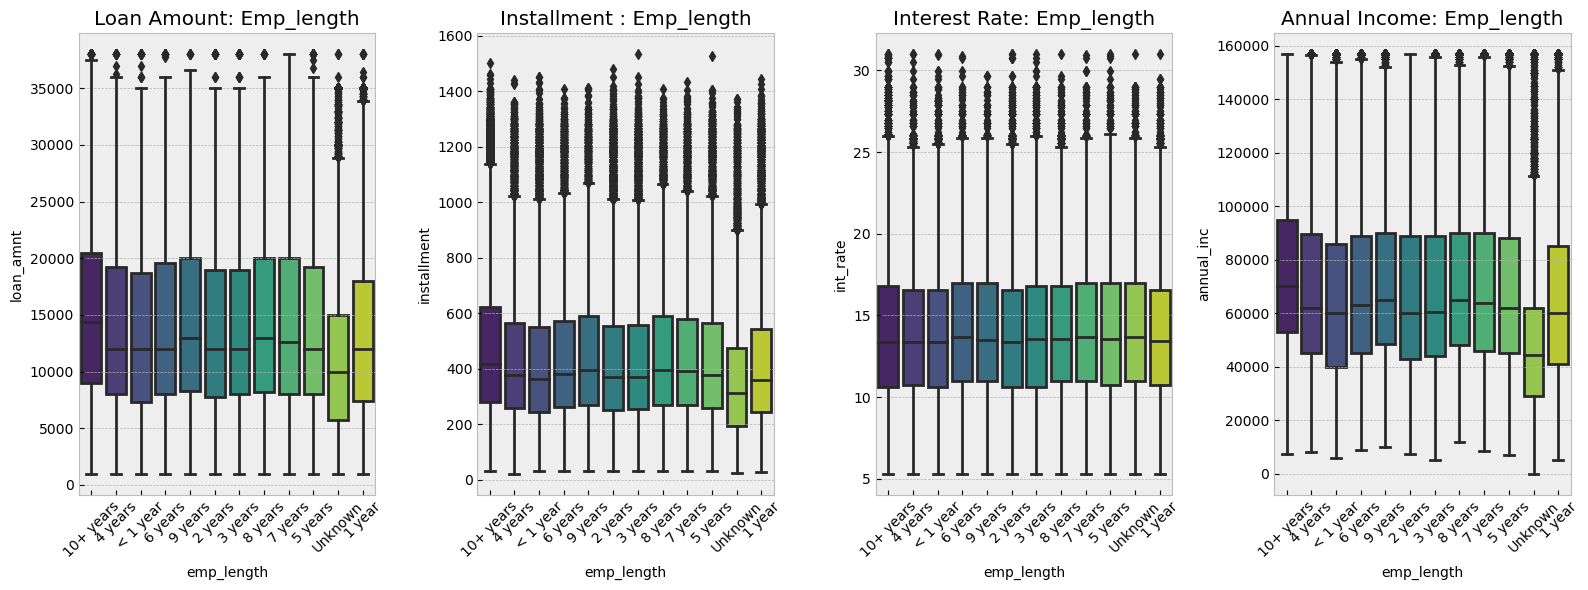

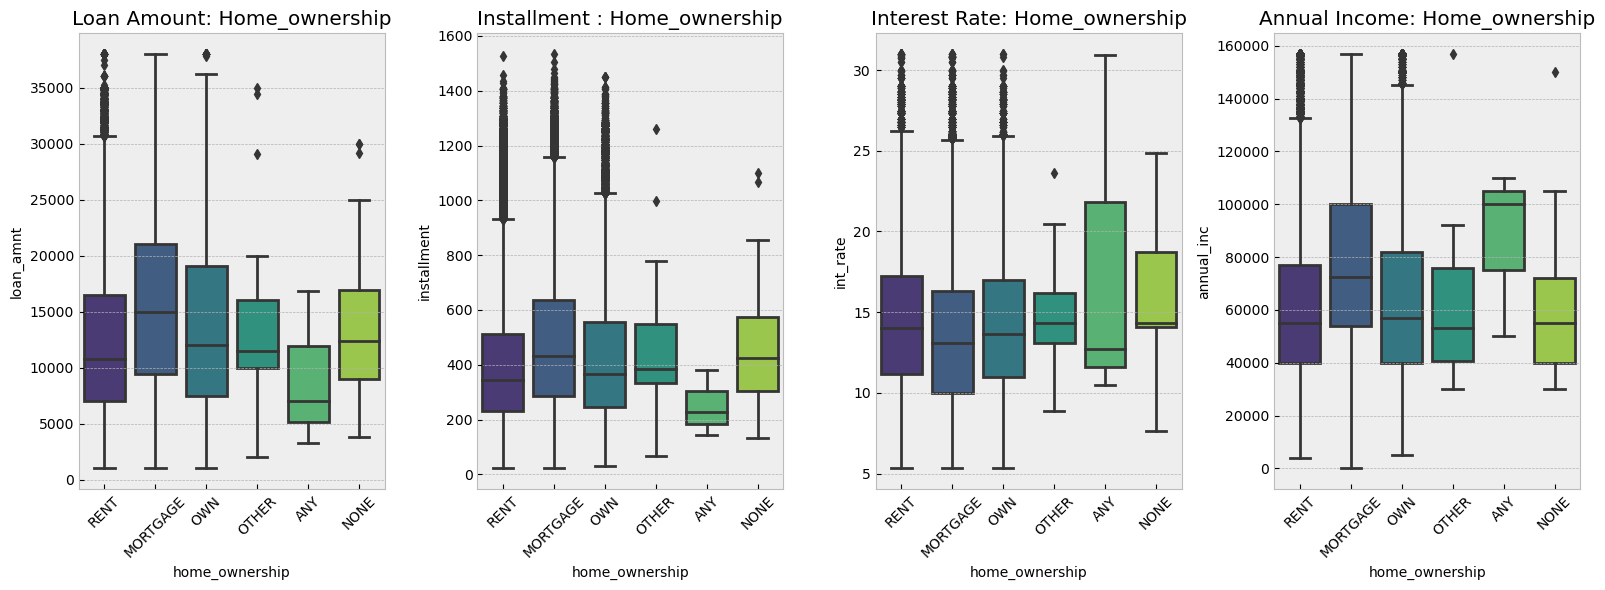

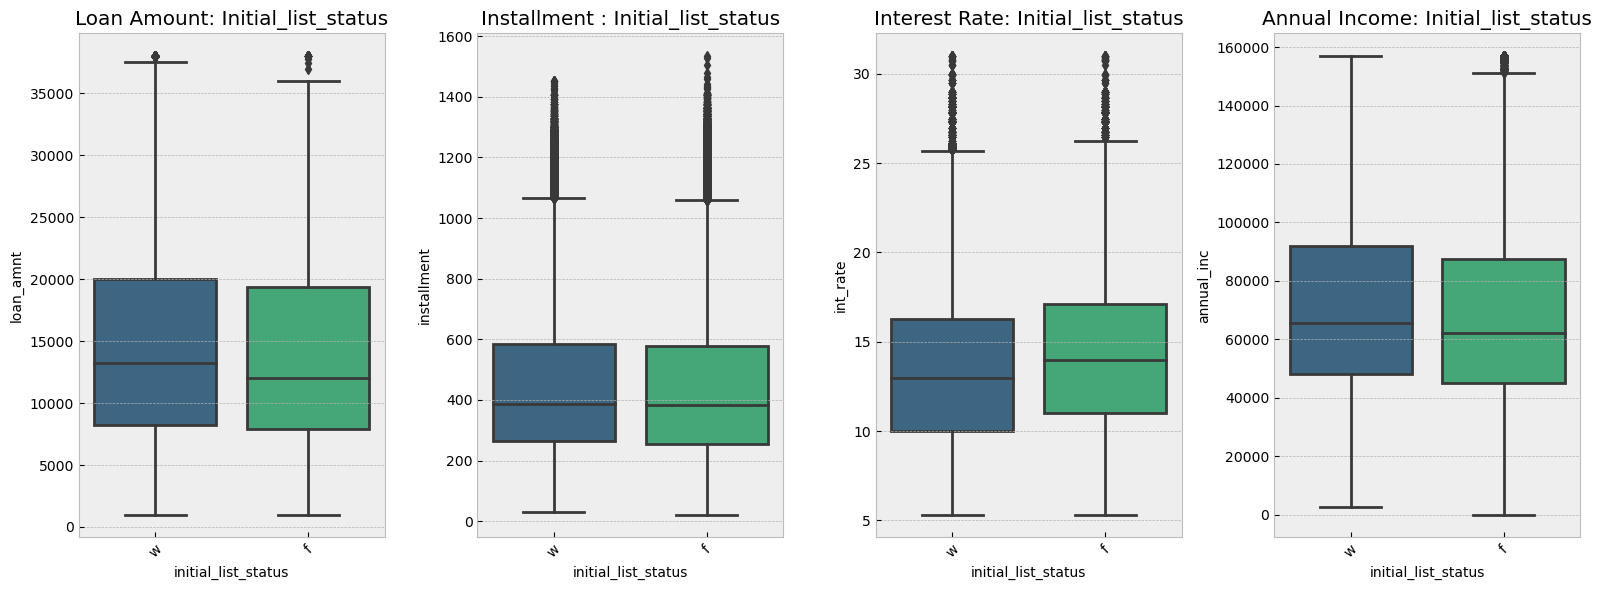

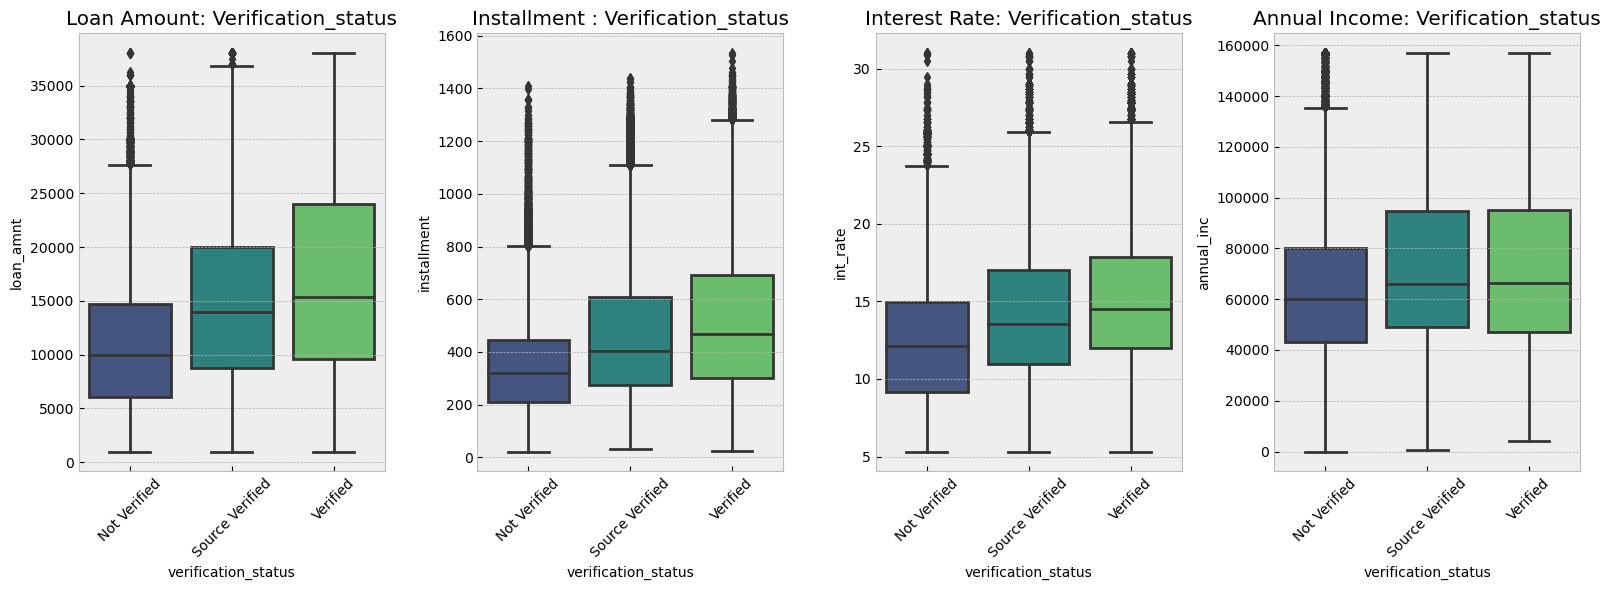

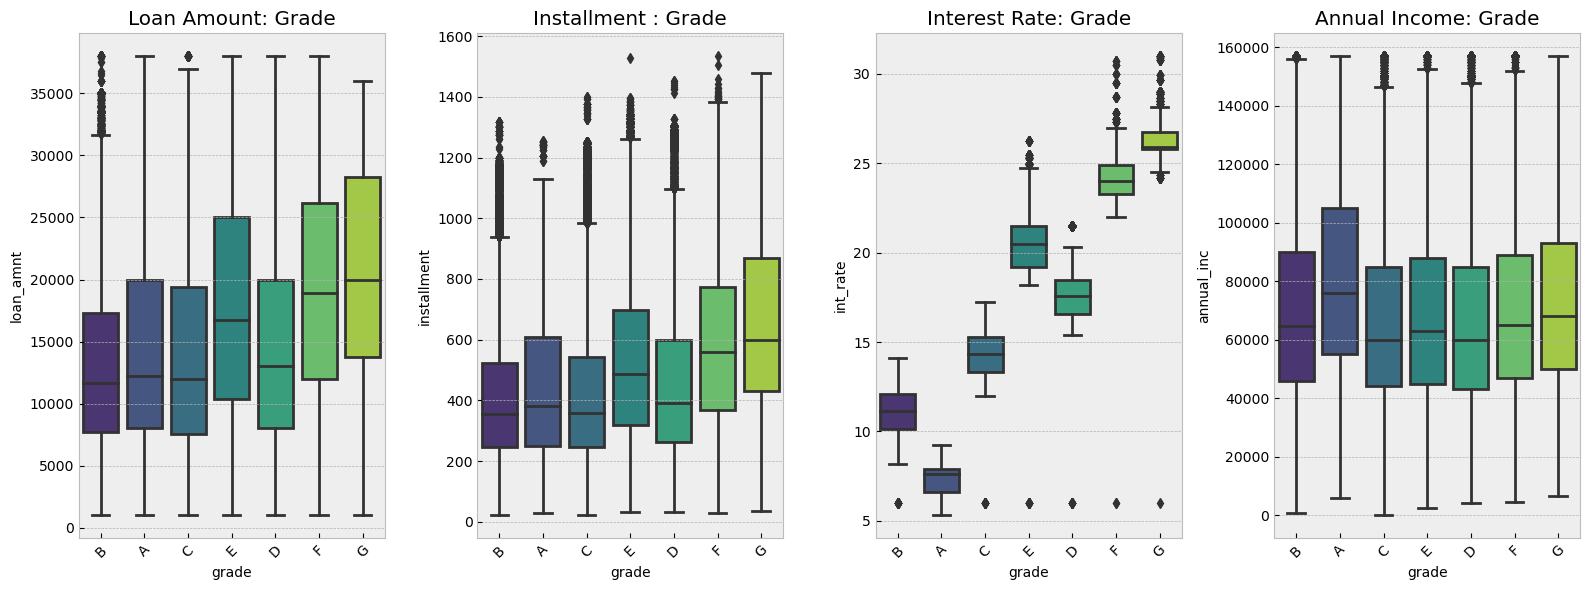

In [38]:
cols = ['emp_length', 'home_ownership', 'initial_list_status', 'verification_status', 'grade']

for col in cols:
    fig, axes = plt.subplots(nrows=1, ncols=4 ,figsize=(16, 6))

    # Boxplot of installment by the column
    sns.boxplot(x=col, y='loan_amnt', data=new_df, ax=axes[0], palette='viridis')
    axes[0].set_title(f'Loan Amount: {col.capitalize()}')
    axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis tick labels

    # Boxplot of int_rate by the column
    sns.boxplot(x=col, y='installment', data=new_df, ax=axes[1], palette='viridis')
    axes[1].set_title(f'Installment : {col.capitalize()}')
    axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis tick labels

        # Boxplot of int_rate by the column
    sns.boxplot(x=col, y='int_rate', data=new_df, ax=axes[2], palette='viridis')
    axes[2].set_title(f'Interest Rate: {col.capitalize()}')
    axes[2].tick_params(axis='x', rotation=45)  # Rotate x-axis tick labels
    
    sns.boxplot(x=col, y='annual_inc', data=new_df, ax=axes[3], palette='viridis')
    axes[3].set_title(f'Annual Income: {col.capitalize()}')
    axes[3].tick_params(axis='x', rotation=45)  # Rotate x-axis tick labels


    # Adjust layout
    plt.tight_layout()
    plt.show()


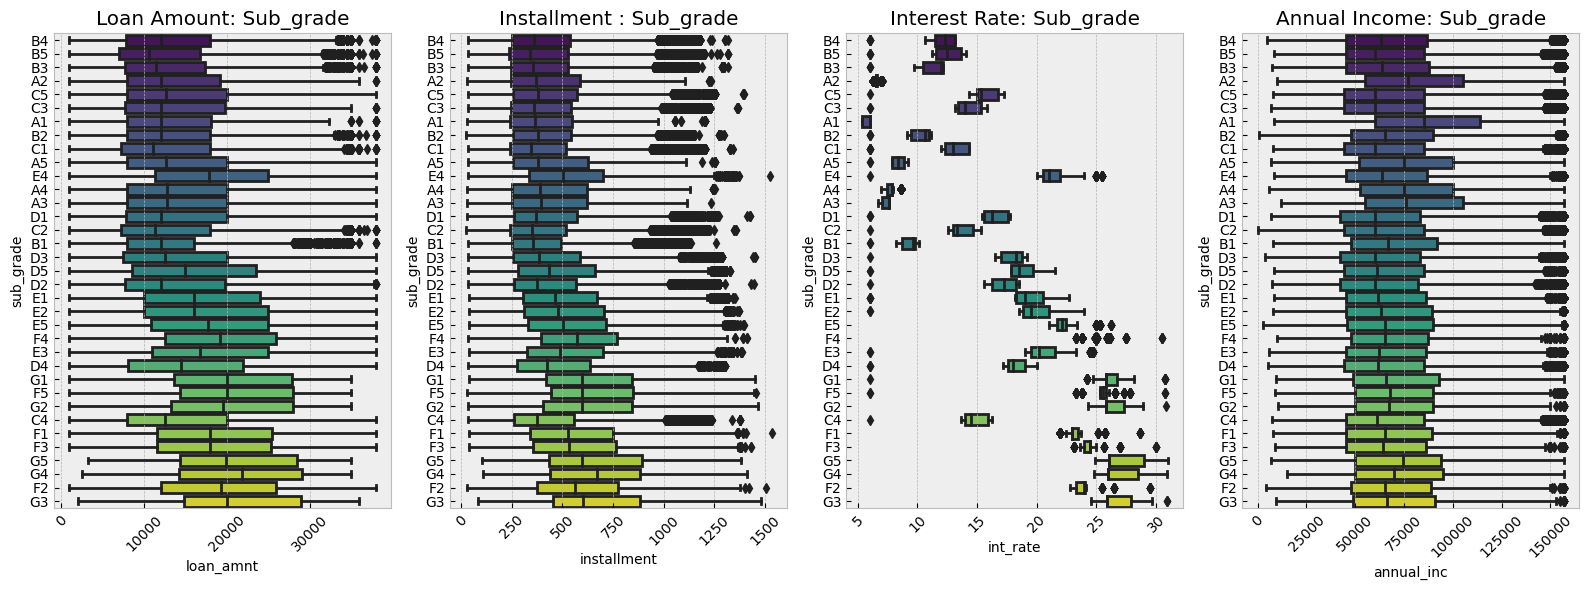

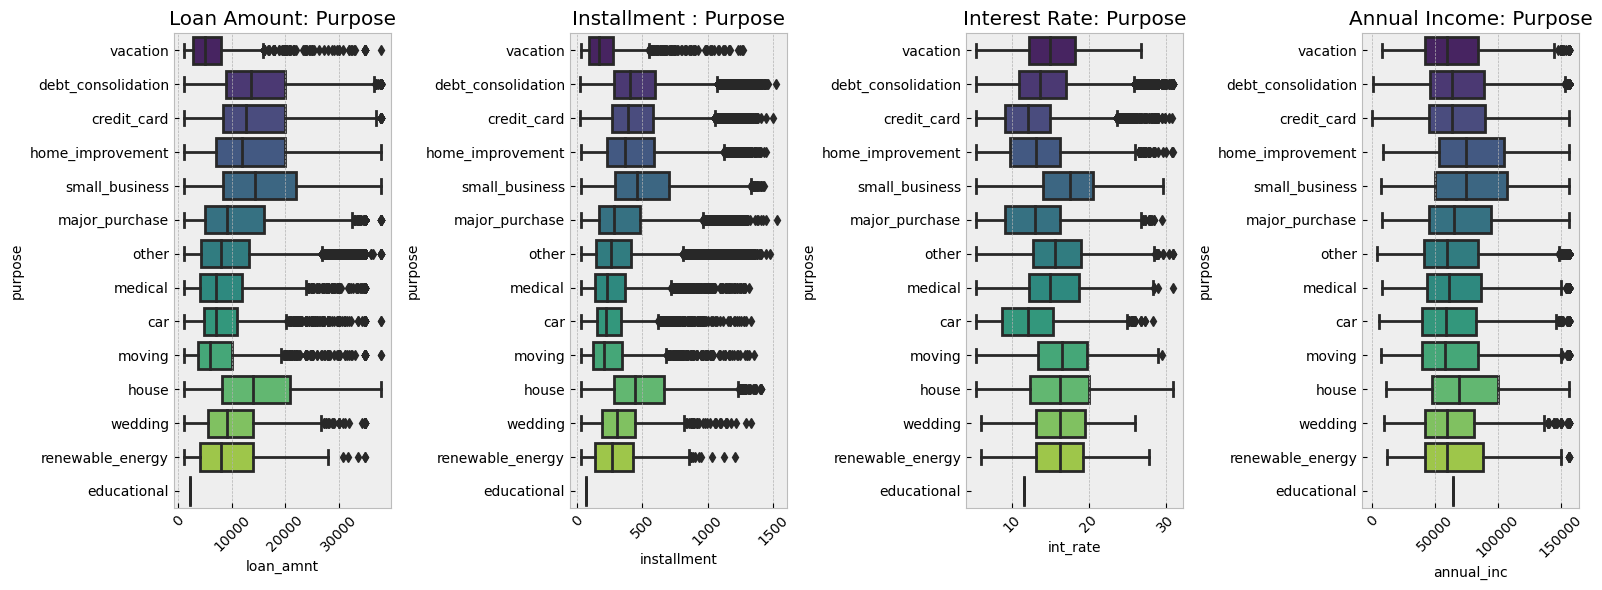

In [39]:
cols = ['sub_grade','purpose']

for col in cols:
    fig, axes = plt.subplots(nrows=1, ncols=4 ,figsize=(16, 6))

    # Boxplot of installment by the column
    sns.boxplot(y=col, x='loan_amnt', data=new_df, ax=axes[0], palette='viridis')
    axes[0].set_title(f'Loan Amount: {col.capitalize()}')
    axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis tick labels

    # Boxplot of int_rate by the column
    sns.boxplot(y=col, x='installment', data=new_df, ax=axes[1], palette='viridis')
    axes[1].set_title(f'Installment : {col.capitalize()}')
    axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis tick labels

        # Boxplot of int_rate by the column
    sns.boxplot(y=col, x='int_rate', data=new_df, ax=axes[2], palette='viridis')
    axes[2].set_title(f'Interest Rate: {col.capitalize()}')
    axes[2].tick_params(axis='x', rotation=45)  # Rotate x-axis tick labels
    
    sns.boxplot(y=col, x='annual_inc', data=new_df, ax=axes[3], palette='viridis')
    axes[3].set_title(f'Annual Income: {col.capitalize()}')
    axes[3].tick_params(axis='x', rotation=45)  # Rotate x-axis tick labels


    # Adjust layout
    plt.tight_layout()
    plt.show()


**A.Employment Length and Financial Metrics:** Employees with longer tenures generally have higher annual incomes and monthly loan installments. However, there isn't a significant variation in interest rates based on employment length. This suggests that income and loan amounts may be influenced by job experience, but interest rates are more standardized across employment categories.

**B.Home Ownership and Financial Status:** Borrowers with "ANY" home ownership status tend to report the highest incomes. On the other hand, those with "MORTGAGE" and "OWN" statuses have higher average loan installments and slightly elevated interest rates compared to "RENT" and "NONE" categories. This could indicate that home ownership affects both income levels and financial obligations.

**C.Loan Grades and Financial Parameters:** Higher loan grades are associated with higher annual incomes, lower installment amounts, and lower interest rates, indicating better creditworthiness. Conversely, lower loan grades show lower incomes, higher installments, and higher interest rates, reflecting a riskier borrower profile.

**D.Sub-grades and Financial Metrics:** Within the mid-range sub-grades, there are higher counts of borrowers with higher annual incomes and installment amounts, leading to peak mean values in these categories. Additionally, interest rates tend to decrease from higher to lower sub-grades, highlighting a risk-based pricing strategy where lower-risk borrowers receive more favorable terms.

**E.Verification Status Metrics:** Higher verification statuses are associated with higher mean installment amounts, higher interest rates, and higher mean annual incomes. However, this trend also comes with increased variability in loan characteristics, as indicated by higher standard deviation values for verified loans.

**F.Loan Purposes and Financial Characteristics:** Loans for education typically correlate with lower annual incomes but also lower installment amounts compared to credit card and debt consolidation loans. Interest rates vary significantly across loan purposes, with renewable energy loans often carrying higher rates. This suggests that the nature of the loan purpose impacts both financial capacity and risk assessment by lenders.

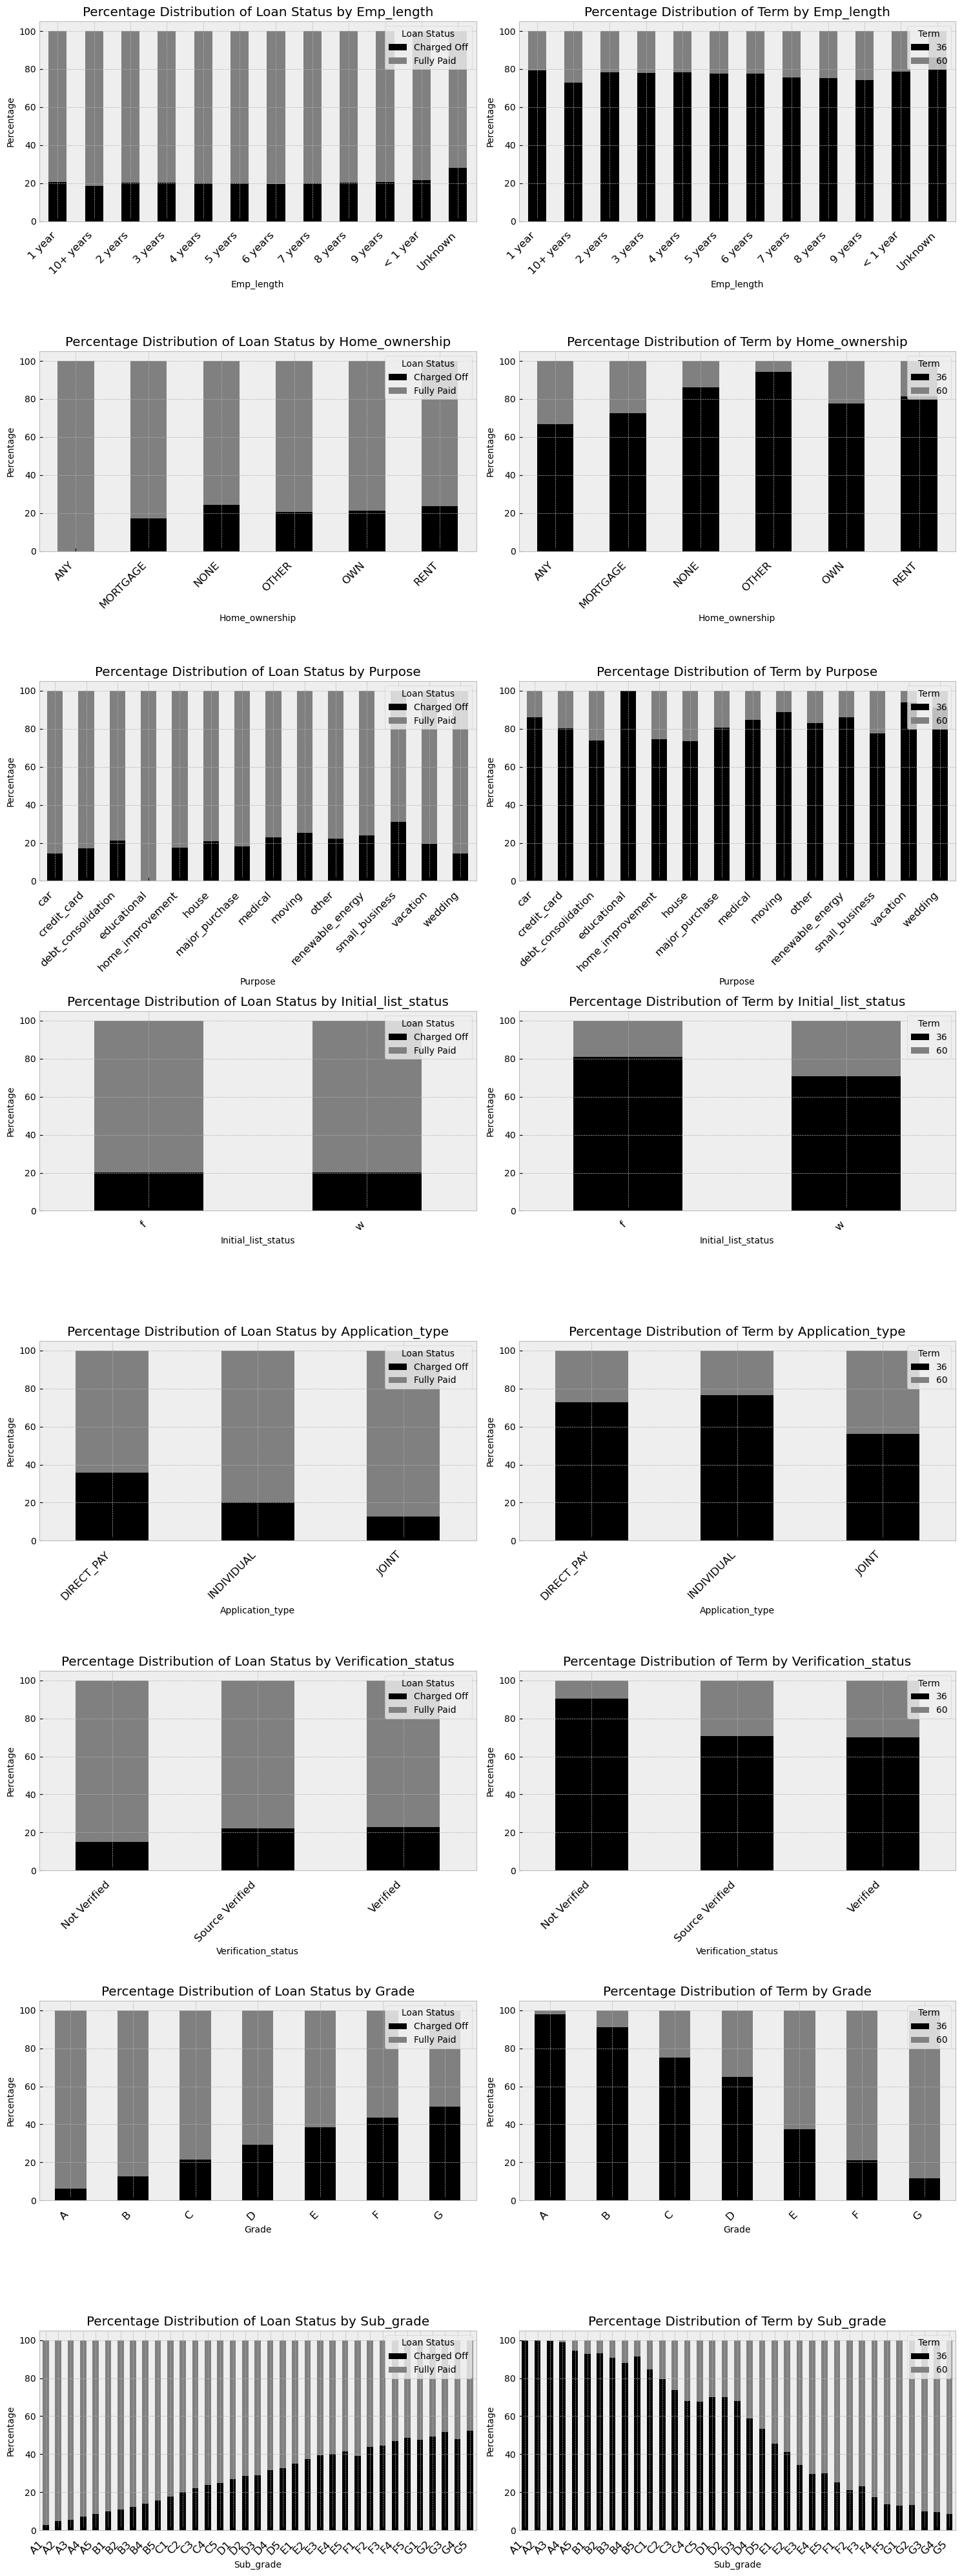

In [40]:
cols = ['emp_length','home_ownership','purpose','initial_list_status','application_type','verification_status','grade','sub_grade']

# Plotting crosstab between column and loan status and between column and term side by side
fig, axes = plt.subplots(len(cols), 2, figsize=(15, 5*len(cols)))
for i, col in enumerate(cols):
    # Calculate percentage distribution using crosstab for loan status
    crosstab_loan = pd.crosstab(new_df[col], new_df['loan_status'], normalize='index') * 100
    
    # Plotting the bar chart for loan status on the first subplot
    ax1 = axes[i, 0]
    colors = ['black','gray']  # Colors for 'yes' and 'no' categories
    crosstab_loan.plot(kind='bar', stacked=True, color=colors, ax=ax1)
    ax1.set_xlabel(col.capitalize())
    ax1.set_ylabel('Percentage')
    ax1.set_title(f'Percentage Distribution of Loan Status by {col.capitalize()}')
    ax1.legend(title='Loan Status', loc='upper right')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=12)
    ax1.tick_params(axis='x', which='major', pad=10)

    # Calculate percentage distribution using crosstab for term
    crosstab_term = pd.crosstab(new_df[col], new_df['term'], normalize='index') * 100
    
    # Plotting the bar chart for term on the second subplot
    ax2 = axes[i, 1]
    crosstab_term.plot(kind='bar', stacked=True, color=colors, ax=ax2)
    ax2.set_xlabel(col.capitalize())
    ax2.set_ylabel('Percentage')
    ax2.set_title(f'Percentage Distribution of Term by {col.capitalize()}')
    ax2.legend(title='Term', loc='upper right')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=12)
    ax2.tick_params(axis='x', which='major', pad=10)

plt.tight_layout()
plt.show()

**emp_length:**

`loan_status`
across different employment lengths, fully paid loans are more common than charged-off ones, though the ratios vary slightly based on employment duration. Longer employment tends to correlate with fewer charged-off loans, suggesting greater loan repayment reliability. Conversely, fully paid loan percentages show consistency, with slightly higher rates among longer-term employees.

`term of loan`

Across different employment lengths, the data reveals a consistent trend in loan term preferences. The majority of borrowers, regardless of their years of employment, opt for shorter 36-month terms, with percentages ranging from about 72.9% to 86.0%. This suggests a general preference for shorter loan durations among borrowers. However, there is a gradual increase in the proportion of 60-month terms as employment length extends, particularly noticeable in employees with longer tenures of 10+ years, where the percentage of 60-month terms reaches around 27.1%. Interestingly, borrowers with unknown employment lengths exhibit an even higher preference for 36-month terms at 86.03%, indicating a cautious approach or possibly a segment with more short-term financial planning. Overall, the data underscores the importance of considering employment length when analyzing loan term choices, as it reflects varying levels of financial stability and risk tolerance among borrowers.

**home_ownership:**

`loan_status`
Homeownership statuses like "MORTGAGE" and "OWN" exhibit lower charged-off loan rates compared to "NONE" and "RENT," hinting at enhanced loan stability with property ownership. Renters ("RENT" category) display a higher proportion of charged-off loans, implying a potential link between renting and elevated default risks.

`term of loan`

The data shows that borrowers with various home ownership statuses generally prefer 36-month loan terms. "ANY" and "MORTGAGE" owners lean more towards 36-month terms, while "NONE" and "OTHER" categories also show a preference. Owners with "OWN" status also favor shorter terms, while renters tend towards 36-month terms but with slightly lower preference compared to other categories.

**purpose:** 

`loan_status`
Educational loans consistently show a 100% repayment rate, indicating high borrower reliability in repaying these loans fully. Car loans also exhibit strong repayment trends with an 85.46% full repayment rate and low charged-off rates. Wedding loans and credit card loans show high rates of full repayment at 85.58% and 82.89%, respectively, reflecting low default risks. However, small business loans pose a higher default risk at 30.97% due to the inherent uncertainties in such ventures. Moving and renewable energy loans also demonstrate elevated default risks, with charged-off rates of 25.17% and 24.07%, respectively.

`term of loan`

The data suggests that different loan purposes exhibit varying preferences for 36-month and 60-month terms. Loans for educational purposes exclusively prefer 36-month terms, while car loans also strongly favor shorter terms. On the other hand, vacation and wedding loans show a higher preference for 60-month terms. Debt consolidation, home improvement, and small business loans lean towards 36-month terms but with notable preferences for 60-month terms as well.

**grade:** 

`loan_status`
loan grades decline from A to G, there is a noticeable pattern of rising charged-off rates and declining fully paid rates.
Grade A loans boast the lowest charged-off rate at 6.27% and the highest fully paid rate at 93.73%, signaling robust repayment behavior and lower default risk for top-grade loans. Conversely, grade G loans display the highest charged-off rate at 49.33% and the lowest fully paid rate at 50.67%, indicating a riskier profile and greater chances of loan default for lower-grade loans.

`term of loan`

Higher-grade loans, specifically A and B categories, show a strong preference for shorter 36-month terms, representing the majority of loans within these grades. However, as the loan grade decreases from A to G, there's a noticeable shift towards longer 60-month terms. This trend indicates a significant correlation between loan grade and term selection, where higher-grade loans tend to opt for shorter terms while lower-grade loans lean towards longer terms.

**sub_grade:** 

`loan_status`
As the loan sub-grade declines (from A1 to G5), a consistent trend emerges with rising charged-off rates and declining fully paid rates. Higher sub-grades within each grade typically show lower default risks and higher repayment rates, while lower sub-grades indicate higher default risks and lower repayment rates.

`term of loan`

Higher sub-grades within each grade category (e.g., A1, A2, A3) show a strong preference for shorter 36-month terms, with nearly exclusive usage of these terms observed in A1, A2, and A3 sub-grades. Conversely, there's a noticeable trend of increasing preference for longer 60-month terms as sub-grades decrease. This pattern reflects a correlation between loan sub-grades, risk perception, and term selection, where higher sub-grades align with lower risk and shorter terms, while lower sub-grades align with higher risk and longer terms.

## `Bankruptcies happening in different Aspects`

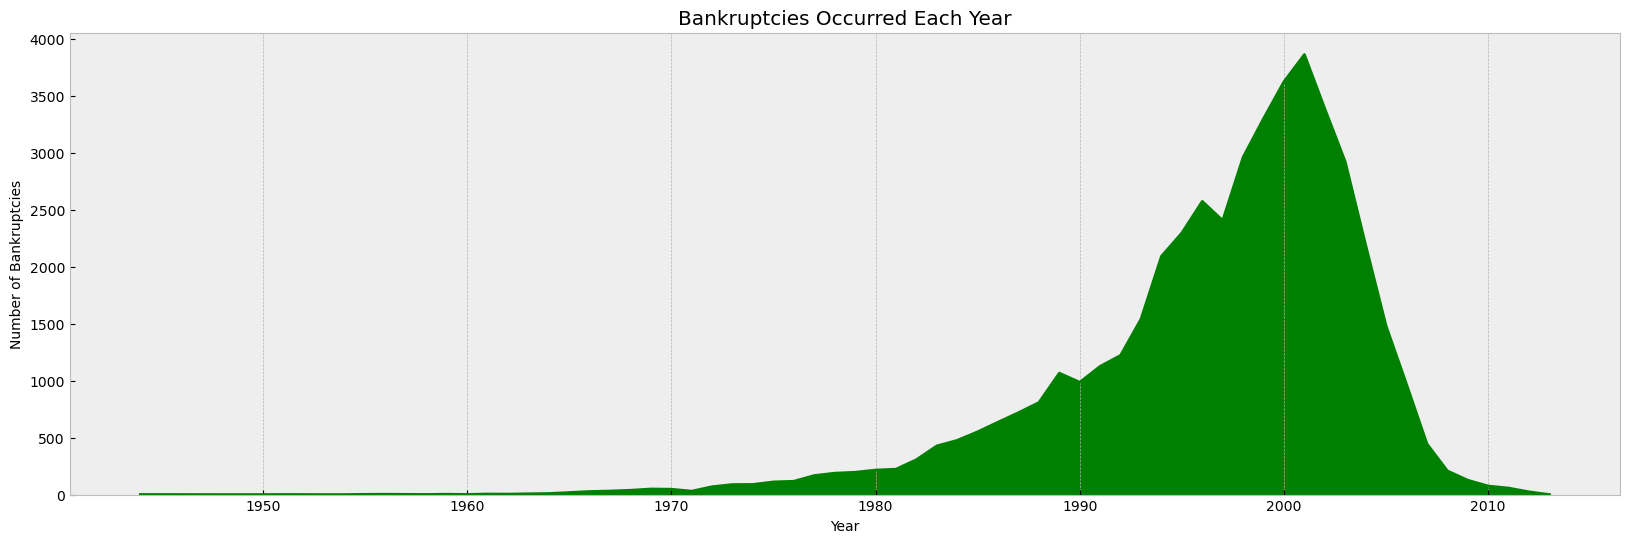

In [41]:
bankruptcies_per_year = new_df.groupby('earliest_cr_line')['pub_rec_bankruptcies'].sum()
bankruptcies_per_year.plot(kind='area', figsize=(20, 6),color='green')
plt.xlabel('Year')
plt.ylabel('Number of Bankruptcies')
plt.title('Bankruptcies Occurred Each Year')
plt.grid(axis='y')
plt.show()

- The number of bankruptcies per year has generally increased over time, with some fluctuations.
- There is a notable increase in bankruptcies starting from the 1970s, peaking in the early 2000s.
- The years 1994, 1995, and 1996 had particularly high numbers of bankruptcies.
- Recent years show a decrease in bankruptcies compared to the early 2000s.
- There is a stable period in the 1990s with moderate numbers of bankruptcies.

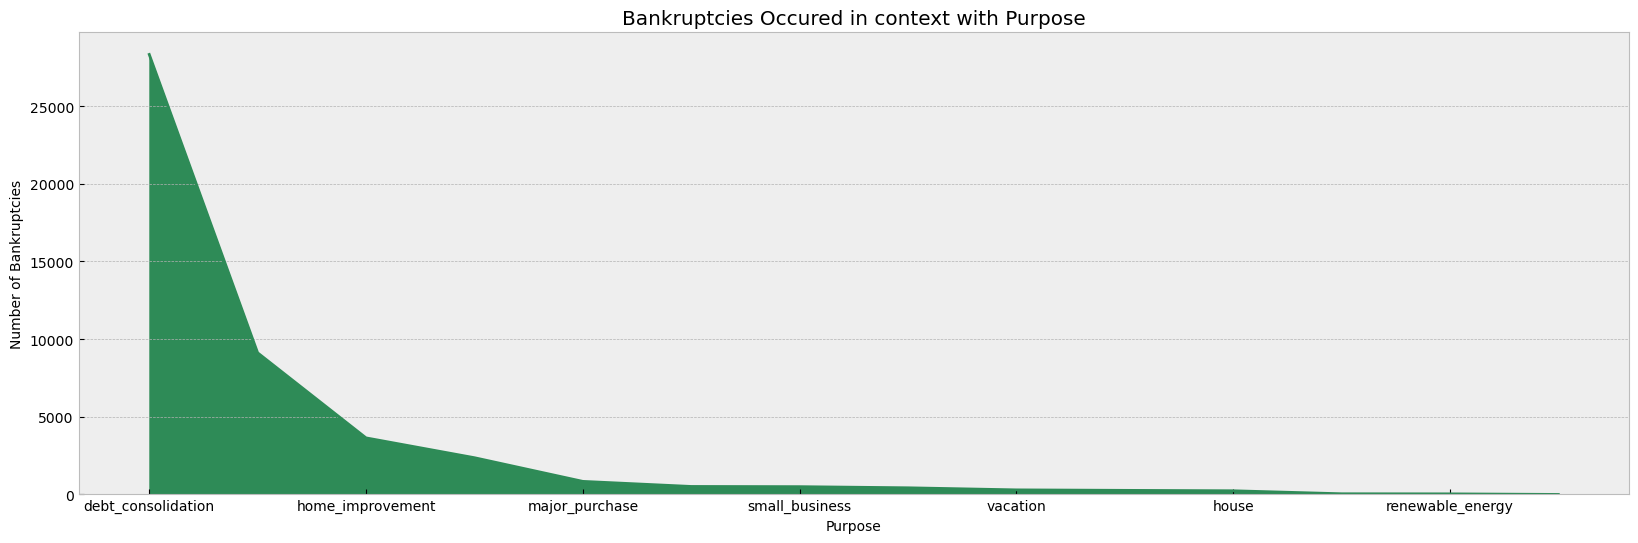

In [42]:
bankruptcies_purpose= new_df.groupby('purpose')['pub_rec_bankruptcies'].sum().sort_values(ascending=False)
bankruptcies_purpose.plot(kind='area', figsize=(20, 6),color='seagreen')
plt.xlabel('Purpose')
plt.ylabel('Number of Bankruptcies')
plt.title('Bankruptcies Occured in context with Purpose')
plt.grid(axis='x')
plt.show()

- **Debt Consolidation:** With over 28k bankruptcies, debt consolidation is the leading cause of financial distress, indicating challenges in managing existing debts.
- **Credit Card:** Following closely behind debt consolidation, credit card-related issues contribute significantly to bankruptcy cases, with over 9 k occurrences.
- **Home Improvement:** While lower than debt consolidation and credit card purposes, home improvement loans also show a notable number of bankruptcies , suggesting financial strain related to home-related expenses.
- **Other Purposes:** The "other" category, with over 2k bankruptcies, indicates a range of reasons contributing to financial difficulties leading to bankruptcy.

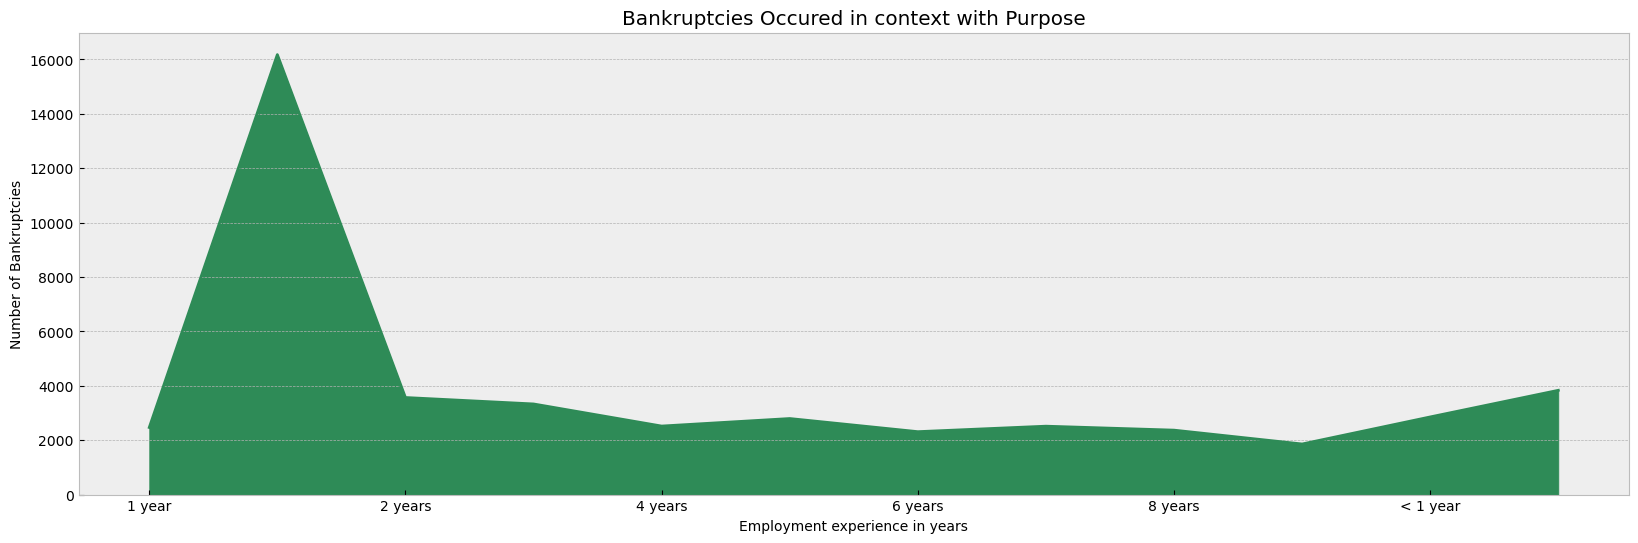

In [43]:
bankruptcies_emp_length= new_df.groupby('emp_length')['pub_rec_bankruptcies'].sum()
bankruptcies_emp_length.plot(kind='area', figsize=(20, 6),color='seagreen')
plt.xlabel('Employment experience in years')
plt.ylabel('Number of Bankruptcies')
plt.title('Bankruptcies Occured in context with Purpose')
plt.grid(axis='x')
plt.show()

- **10+ years:** This category has the highest number of pub_rec_bankruptcies, indicating that individuals with more than 10 years of employment experience tend to have a higher incidence of bankruptcies.
- **< 1 year and 1 year:** These categories also show a significant number of bankruptcies, which could suggest that individuals with relatively less work experience are facing financial challenges leading to bankruptcies.
- **3 to 6 years:** These categories have a moderate number of bankruptcies, suggesting that individuals with mid-range employment lengths also experience bankruptcy incidents.
- **7 to 9 years:** Similar to the mid-range categories, these have a moderate number of bankruptcies, indicating that individuals with several years of employment are also affected by bankruptcies.

## `Relationship between different variables`

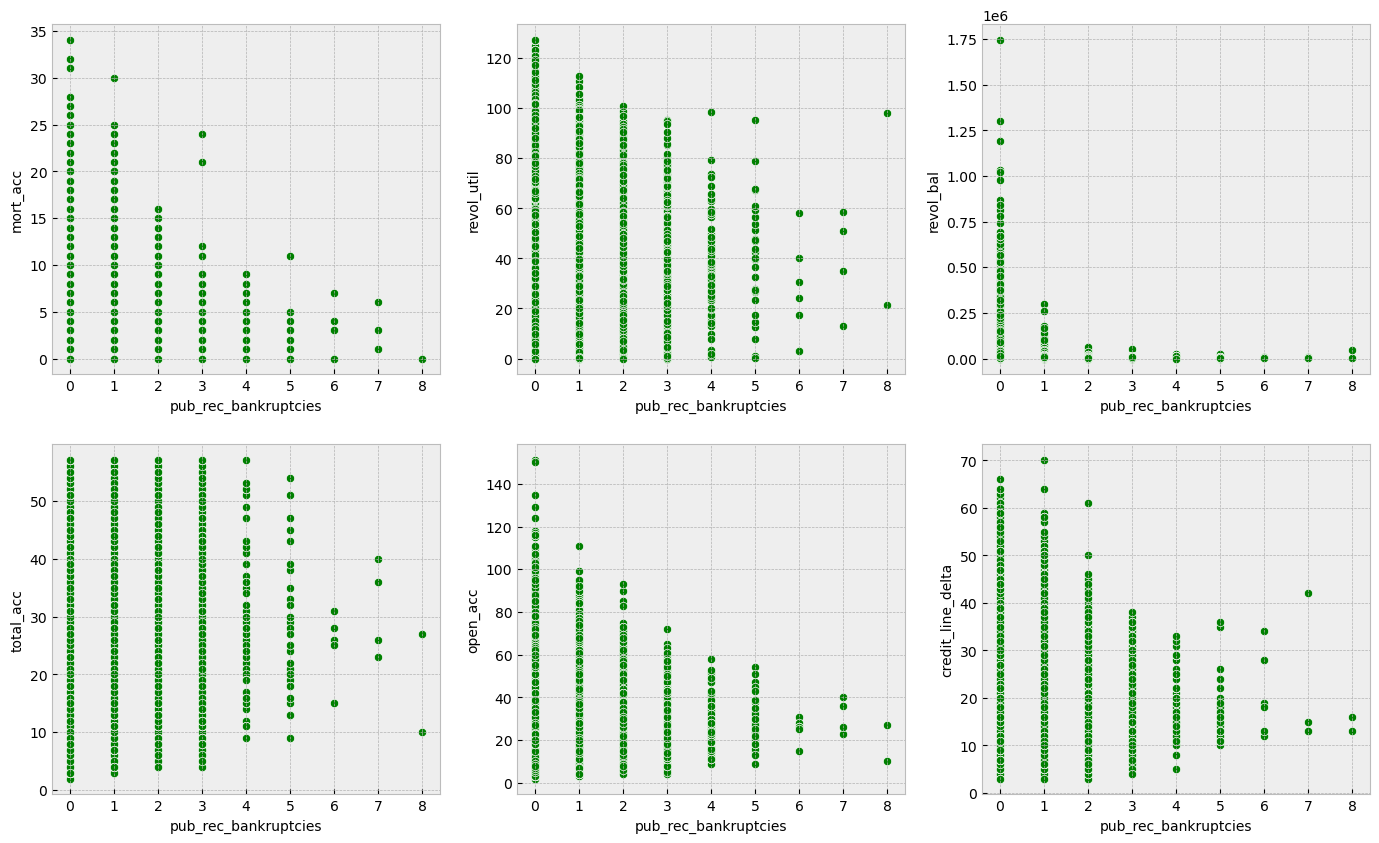

In [44]:
plt.figure(figsize=(17, 10))
sns.scatterplot(x='pub_rec_bankruptcies', y='mort_acc', data=new_df, ax=plt.subplot(2, 3, 1),color='green')
sns.scatterplot(x='pub_rec_bankruptcies', y='revol_util', data=new_df, ax=plt.subplot(2, 3, 2),color='green')
sns.scatterplot(x='pub_rec_bankruptcies', y='revol_bal', data=new_df, ax=plt.subplot(2, 3, 3),color='green')
sns.scatterplot(x='pub_rec_bankruptcies', y='total_acc', data=new_df, ax=plt.subplot(2, 3, 4),color='green')
sns.scatterplot(x='pub_rec_bankruptcies', y='open_acc', data=new_df, ax=plt.subplot(2, 3, 5),color='green')
sns.scatterplot(x=new_df.pub_rec_bankruptcies, y=new_df.credit_line_delta, ax=plt.subplot(2, 3, 6),color='green')
plt.show()

- A downward trend can be noticed with mort_acc and pub_rec_bankruptcies, and the same trend can be noticed with revol_util and pub_rec_bankruptcies, indicating that as the number of mortgage accounts (mort_acc) and revolving line utilization (revol_util) decreases, the occurrences of public record bankruptcies (pub_rec_bankruptcies) also decrease. This could be due to borrowers with fewer mortgage accounts or lower revolving credit utilization being less likely to face financial difficulties leading to bankruptcy.

- We can observe that revol_bal instantly gets really low when pub_rec_bankruptcies jumps from 0 to 1, which indicates a sudden impact on revolving credit balances when a borrower goes from having no public record bankruptcies to having one. This could suggest a significant financial event or change in creditworthiness.

- A constant yet slightly upward trend can be noticed with total_acc, which indicates an increase in the total number of credit lines in the borrower's credit file over time. This might reflect a borrower's increasing credit activity or access to new credit lines. Conversely, an opposite trend is observed in credit_line_delta, which indicates a decrease in the time difference between the loan funding and the borrower's earliest reported credit line as public record bankruptcies increase. This could signify a quicker accumulation of credit lines relative to the loan's origination date for borrowers facing financial challenges leading to bankruptcies.

- Credit_line_delta, which is basically the difference between the year in which the loan was funded and the year the borrower's earliest reported credit line was opened, shows a downward trend as pub_rec_bankruptcies increase. This suggests that borrowers with more public record bankruptcies tend to have a shorter time span between obtaining credit lines and taking out loans, possibly indicating financial strains leading to quicker credit accumulation or loan requests.

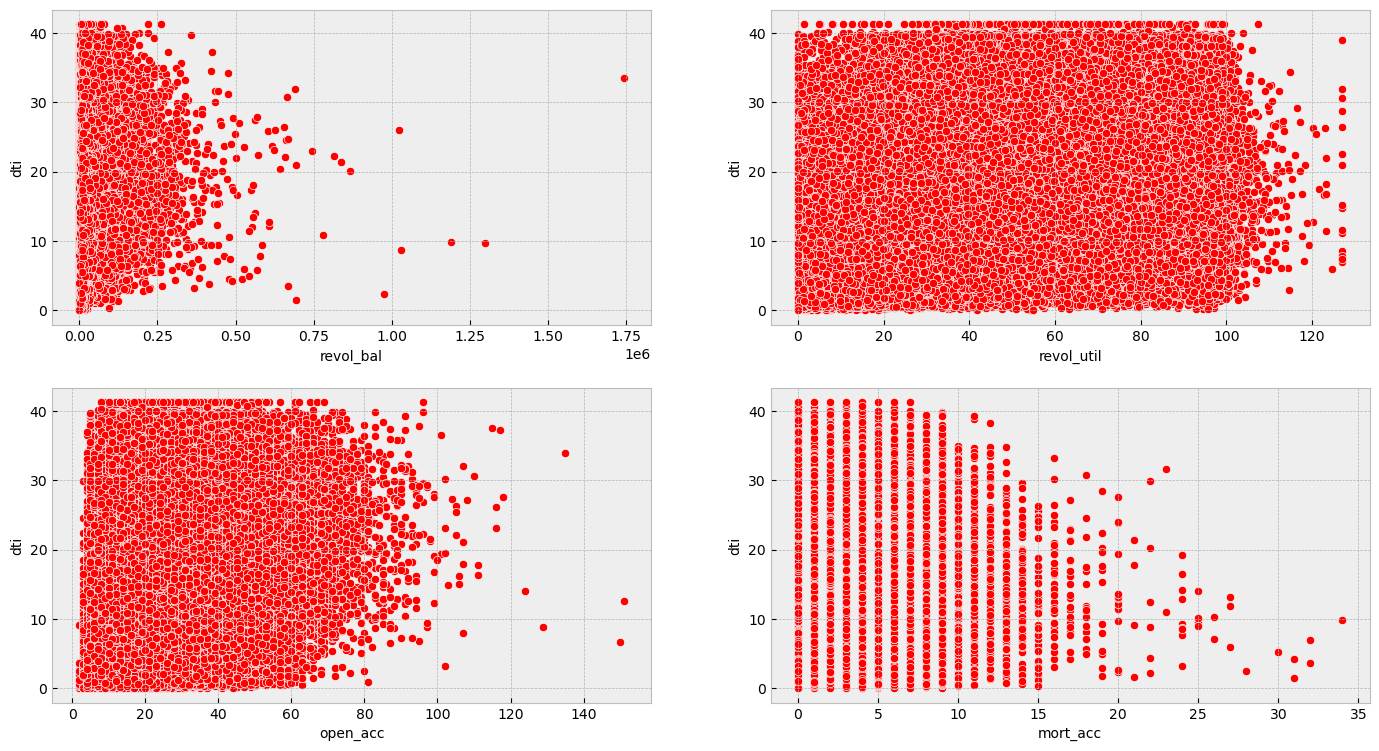

In [45]:
plt.figure(figsize=(17,9))
plt.subplot(2,2,1)
sns.scatterplot(data=new_df, x="revol_bal", y="dti",color='red')
plt.subplot(2,2,2)
sns.scatterplot(data=new_df, x="revol_util", y="dti",color='red')
plt.subplot(2,2,3)
sns.scatterplot(data=new_df, x="open_acc", y="dti",color='red')
plt.subplot(2,2,4)
sns.scatterplot(data=new_df, x="mort_acc", y="dti",color='red')
plt.show()

- As the number of mortgage accounts exceeds 15, there is a corresponding decrease in the debt-to-income ratio.

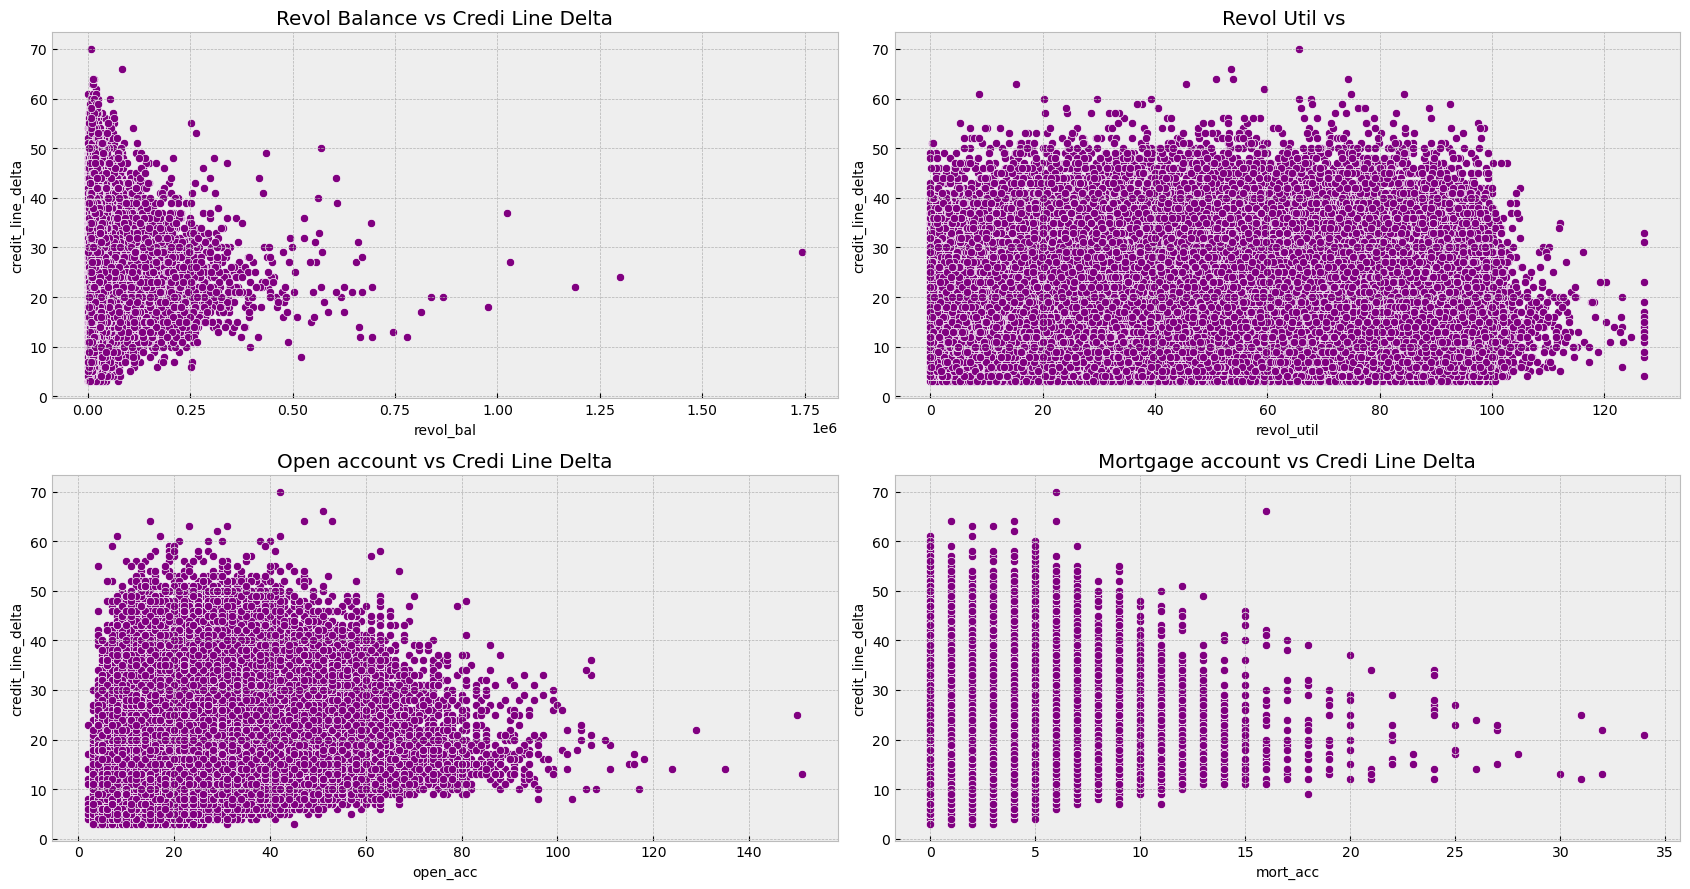

In [46]:
plt.figure(figsize=(17, 9))
plt.subplot(2, 2, 1)
sns.scatterplot(data=new_df, x="revol_bal", y="credit_line_delta", color='purple')
plt.title('Revol Balance vs Credi Line Delta')

plt.subplot(2, 2, 2)
sns.scatterplot(data=new_df, x="revol_util", y="credit_line_delta", color='purple')
plt.title('Revol Util vs ')

plt.subplot(2, 2, 3)
sns.scatterplot(data=new_df, x="open_acc", y="credit_line_delta", color='purple')
plt.title('Open account vs Credi Line Delta')

plt.subplot(2, 2, 4)
sns.scatterplot(data=new_df, x="mort_acc", y="credit_line_delta", color='purple')
plt.title('Mortgage account vs Credi Line Delta')
plt.tight_layout()
plt.show()

## `DTI relationship with different aspects of categories`

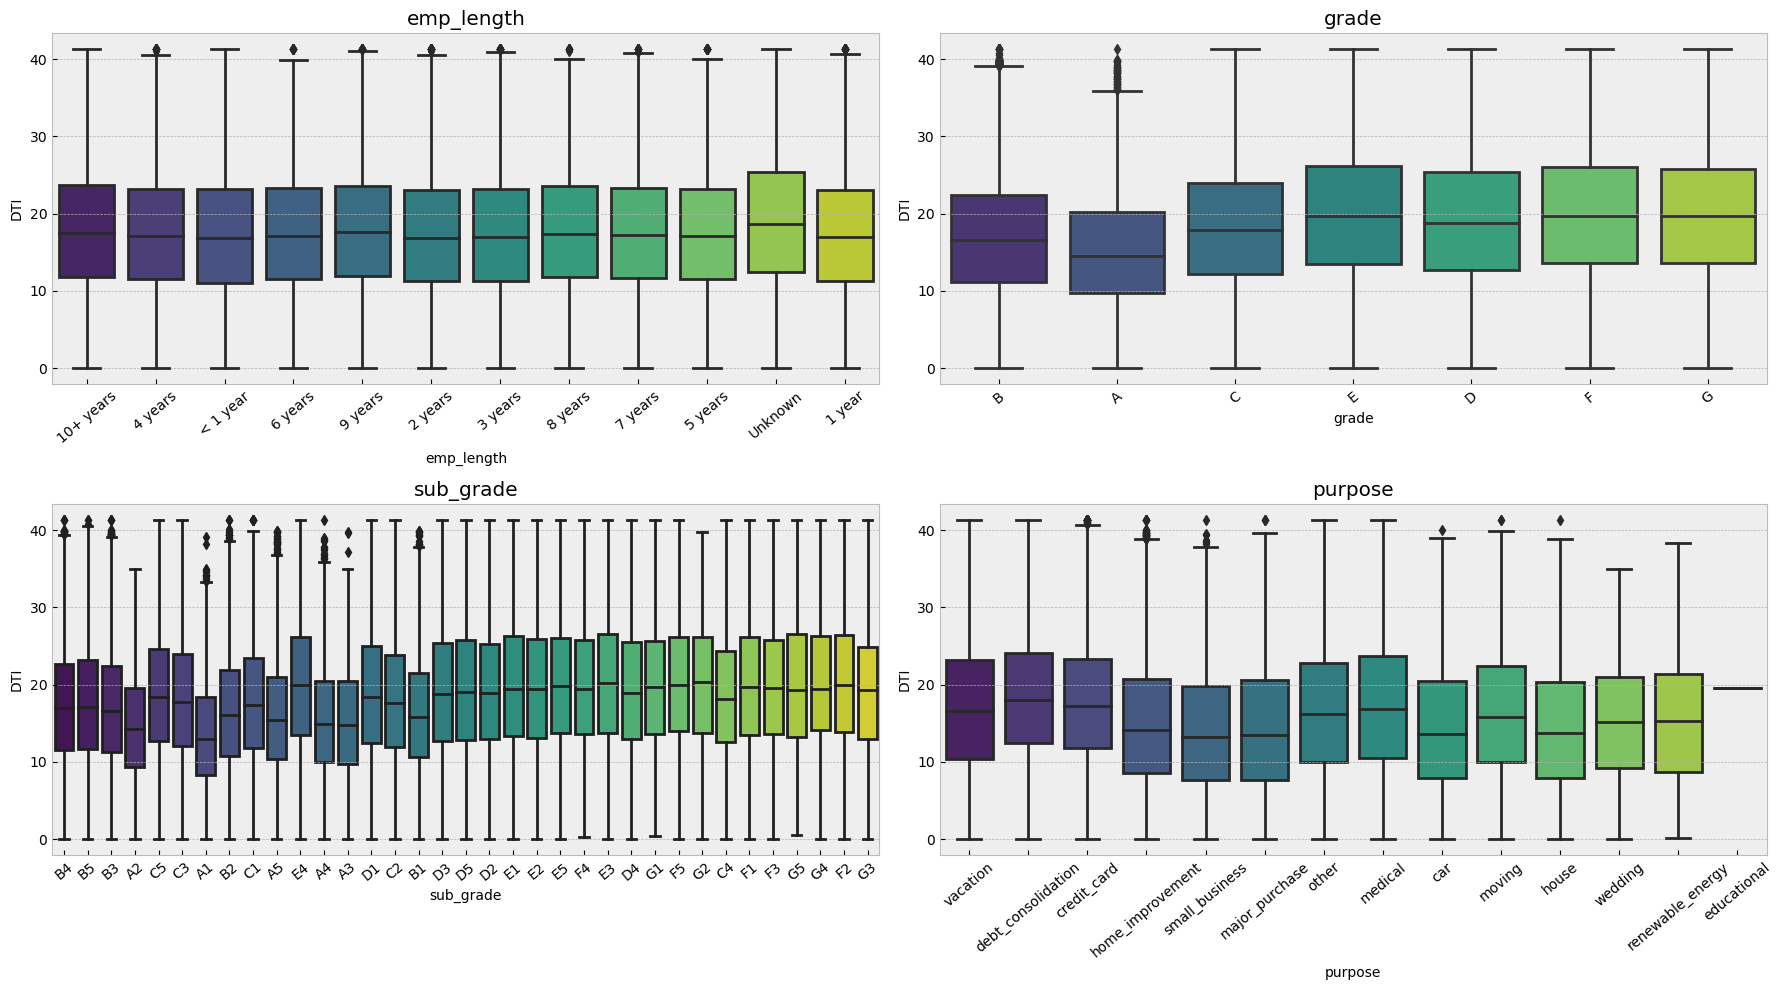

In [47]:
cols = ['emp_length', 'grade', 'sub_grade', 'purpose']

# Create a subplot grid
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each column in a subplot
for i, col in enumerate(cols):
    sns.boxplot(x=new_df[col], y=new_df['dti'], palette='viridis', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('DTI')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=40)
# Adjust layout
plt.tight_layout()
plt.show()

**Grade:**
- Grades A, B, and C have relatively lower mean DTIs (around 15 to 18), indicating that borrowers in these grades generally have a lower debt burden compared to higher-grade loans.
- As the grade decreases from A to G, there's a gradual increase in mean DTI, with Grade G having the highest mean DTI of around 19.75. This suggests that borrowers in lower-grade loans tend to have higher DTIs on average.

**Subgrade:**
- Lower subgrades (such as A1, A2) generally have lower mean DTIs, starting from around 13.5 and gradually increasing as the subgrade worsens.
- Higher subgrades (such as G5) exhibit higher mean DTIs, nearing or exceeding 20, indicating potentially riskier loans with higher borrower debt burdens.

**EmploymenT Length:**
- Across different employment lengths, there is a relatively consistent distribution of DTI, as seen from the similar standard deviations and quartile ranges. This suggests that while employment length may influence other aspects of borrowing behavior, it does not significantly impact DTI distribution among borrowers.

**Purpose:**
- Debt consolidation loans have the highest mean DTI among the listed purposes.
- Educational loans have a single data point and therefore no standard deviation.
- Credit card loans show a moderate mean DTI and a relatively narrow range of values.
- Car loans have a lower mean DTI compared to debt consolidation and credit card loans.
- Home improvement and major purchase loans have similar mean DTI values, indicating comparable debt levels for these purposes.
- Medical, moving, and vacation loans also show moderate mean DTI values.
- Small business loans have a lower mean DTI compared to debt consolidation and credit card loans.
- Wedding loans have a moderate mean DTI and a relatively narrow range of values.
- House and renewable energy loans show lower mean DTI values compared to debt consolidation and credit card loans.

## `Relationship between employement length of Borrowers and their accounts`

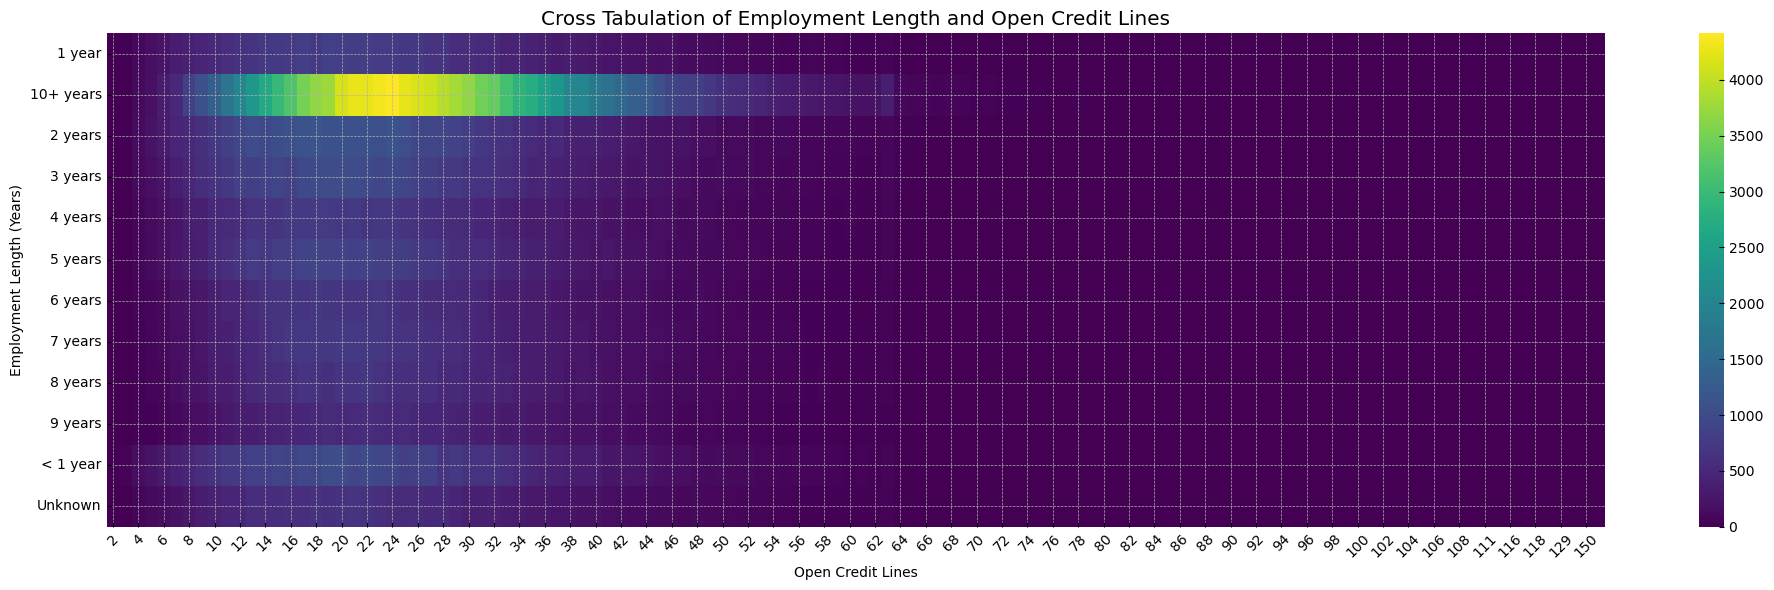

In [48]:
cross_tab1 = pd.crosstab(new_df['emp_length'], new_df['open_acc'])
plt.figure(figsize=(20, 6))
sns.heatmap(cross_tab1, cmap='viridis', annot=False, fmt='d')
plt.title('Cross Tabulation of Employment Length and Open Credit Lines')
plt.xlabel('Open Credit Lines')
plt.ylabel('Employment Length (Years)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- Generally, there is an increasing trend in the number of open credit lines ('open_acc') as employment length ('emp_length') increases. Borrowers with longer employment lengths tend to have more open credit lines on average.
- Borrowers with 10+ years of employment have the highest counts across most ranges of open credit lines, indicating a concentration of borrowers with a high number of open credit lines in this employment length category.
- In lower ranges of open credit lines (e.g., 0-10), there's a relatively consistent distribution across different employment lengths, suggesting that employment length might not heavily influence the number of open credit lines within these ranges.

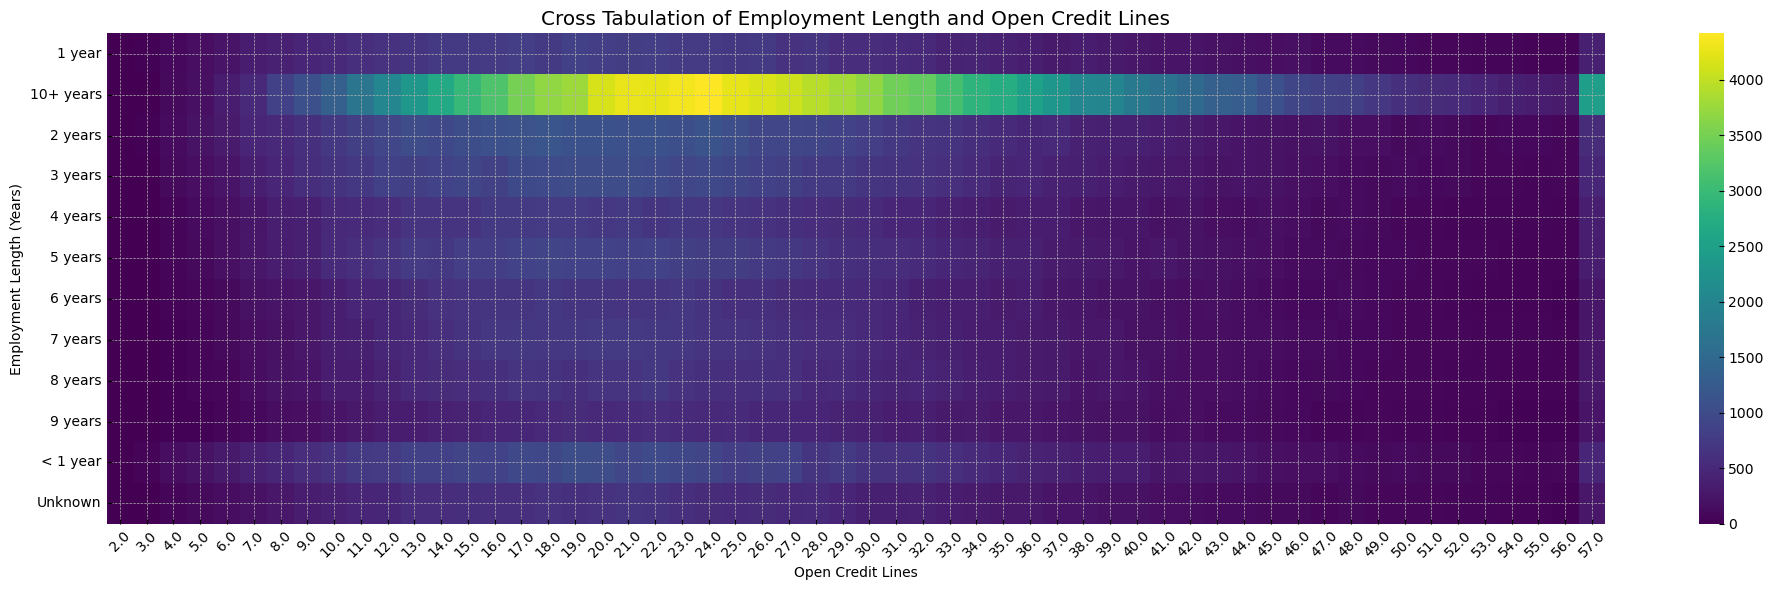

In [49]:
cross_tab2 = pd.crosstab(new_df['emp_length'], new_df['total_acc'])
plt.figure(figsize=(20, 6))
sns.heatmap(cross_tab2, cmap='viridis', annot=False, fmt='d')
plt.title('Cross Tabulation of Employment Length and Open Credit Lines')
plt.xlabel('Open Credit Lines')
plt.ylabel('Employment Length (Years)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- Similar to the previous plot, there's an increasing trend in the total number of credit lines ('total_acc') as employment length ('emp_length') increases. Borrowers with longer employment lengths tend to have more total credit lines on average.
- Borrowers with 10+ years of employment again have the highest counts across most ranges of total credit lines, indicating a concentration of borrowers with a high number of total credit lines in this employment length category.
- In lower ranges of total credit lines (e.g., 2-10), there's a relatively consistent distribution across different employment lengths, suggesting that employment length might not heavily influence the total number of credit lines within these ranges.

## `Loan Status with other variables`

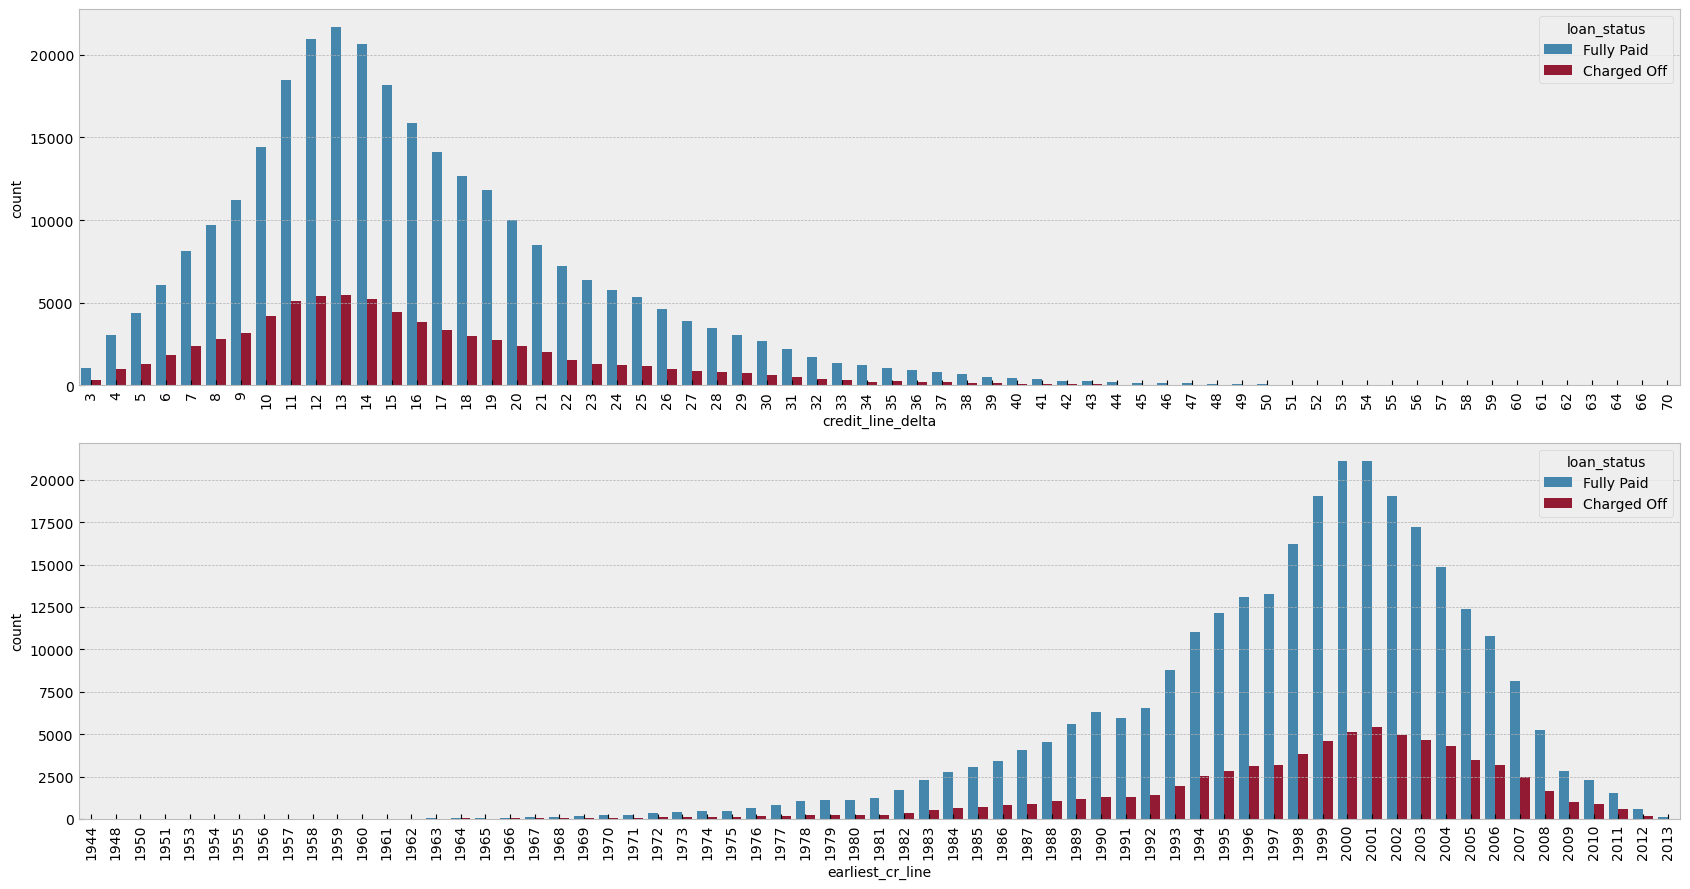

In [50]:
plt.figure(figsize=(17, 9))
plt.subplot(2, 1, 1)
sns.countplot(x=new_df.credit_line_delta, hue=new_df.loan_status)
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.countplot(x=new_df.earliest_cr_line, hue=new_df.loan_status)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## `credit_line_delta`
**Trend Analysis:**

- As the credit line delta increases from 3 to 30, both 'Charged Off' and 'Fully Paid' loans generally increase, indicating more loans being issued over time.
- Beyond a credit line delta of 30, there's a noticeable decrease in the number of 'Charged Off' loans, suggesting a potential correlation between longer credit histories and lower default rates.

**Critical Points:**

- Credit line deltas between 9 and 30 seem to have a significant number of 'Charged Off' loans, indicating a potential risk range where borrowers might struggle with repayments.
- For 'Fully Paid' loans, there's a consistent increase as credit line deltas increase, which aligns with the expectation that borrowers with longer credit histories tend to have higher rates of successful loan repayment.

**Extreme Values:**

- At very high credit line deltas (beyond 30), the number of 'Charged Off' loans decreases significantly, while 'Fully Paid' loans continue to rise, suggesting a trend of improved repayment behavior among borrowers with extensive credit histories.

## `earliest_cr_line`

**Trend Analysis:**

- The number of loans, both 'Charged Off' and 'Fully Paid', increases steadily as we move from earlier to more recent credit lines. This trend aligns with the general increase in lending activities over time.
- There's a notable surge in loan counts starting from the 1990s, with a substantial increase in 'Charged Off' loans as well. This could indicate a shift in lending patterns or changes in borrower behavior during this period.

**Critical Points:**

- While 'Fully Paid' loans consistently outnumber 'Charged Off' loans across most years, there are certain periods, such as around the early 1990s and late 2000s, where the difference between 'Fully Paid' and 'Charged Off' loans narrows, suggesting potential challenges or risks during those times.
- The years with the highest numbers of 'Charged Off' loans tend to be those with significant lending volumes, indicating that higher loan volumes may correlate with increased default rates.

**Recent Trends:**

- In more recent years (2010s and 2013), the number of 'Charged Off' loans has decreased significantly compared to earlier years, which could indicate improvements in lending practices, borrower screening, or economic conditions.

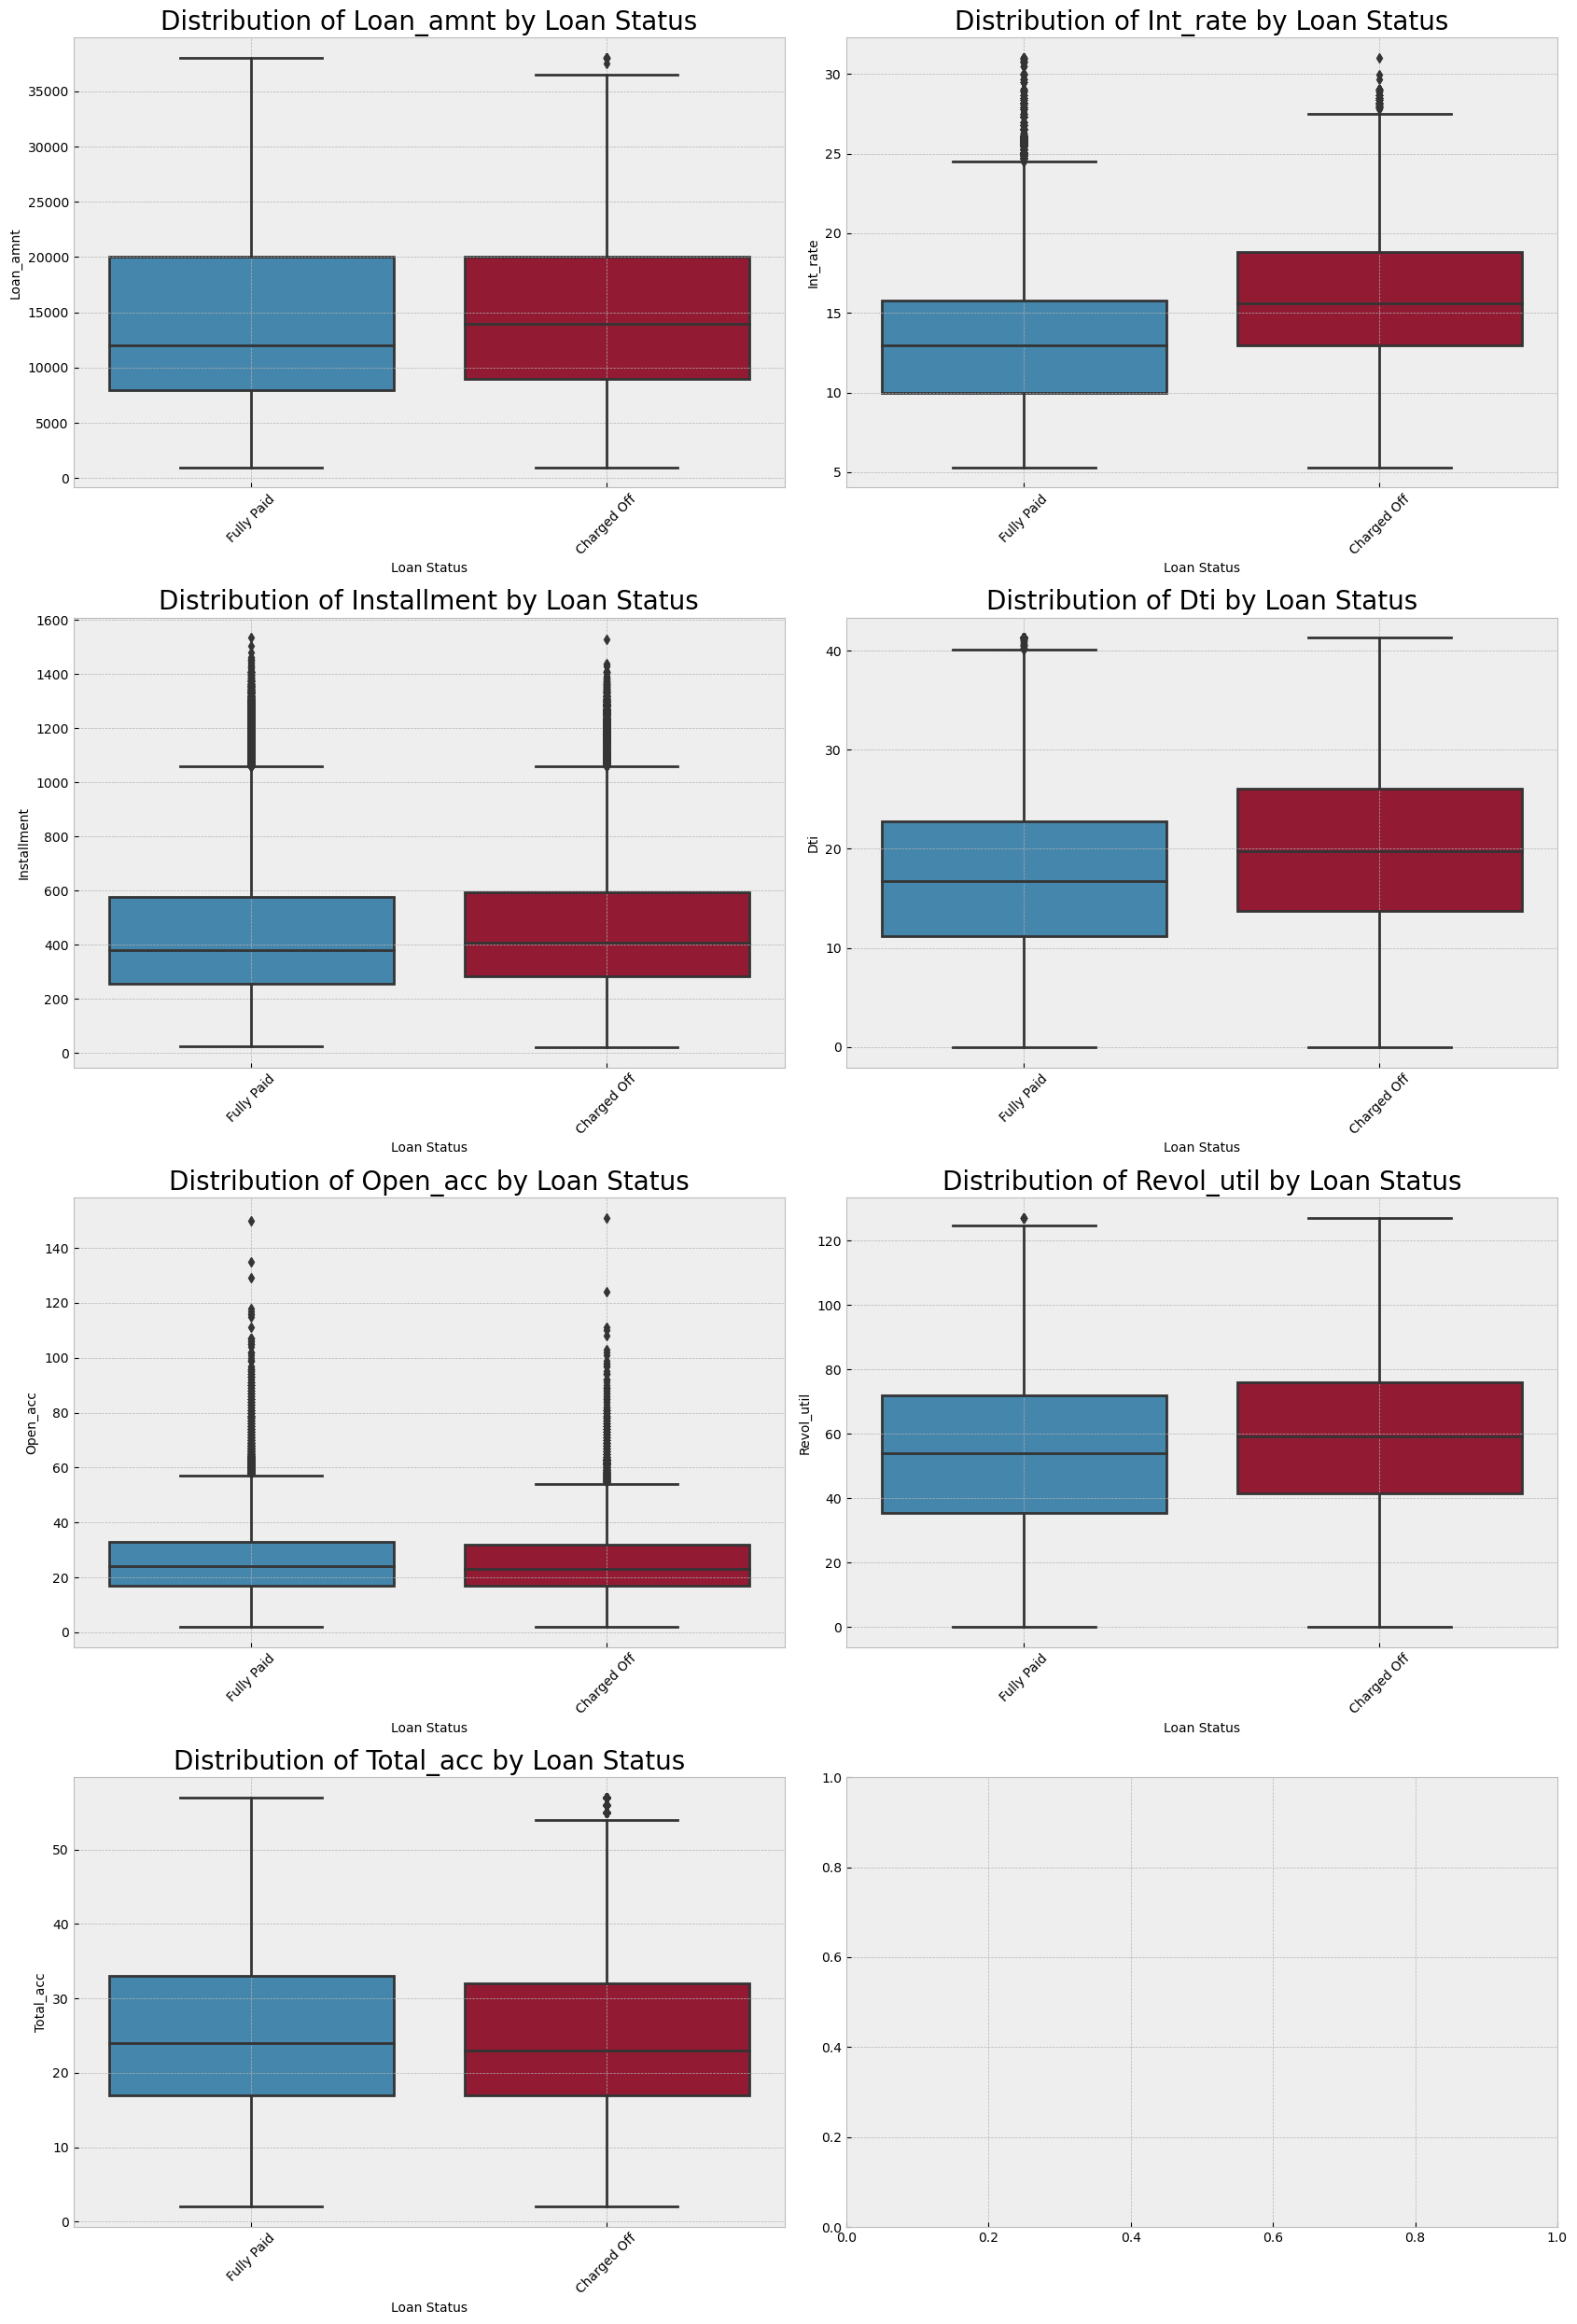

In [51]:
cols = ['loan_amnt', 'int_rate', 'installment', 'dti', 'open_acc', 'revol_util', 'total_acc']

# Set up the subplots
fig, axes = plt.subplots(4, 2, figsize=(17, 25))

for i, col in enumerate(cols):
    # Plotting the box plots for each loan attribute by loan status
    ax = axes[i // 2, i % 2]
    sns.boxplot(x=new_df.loan_status, y=col, data=new_df, ax=ax)
    ax.set_xlabel('Loan Status')
    ax.set_ylabel(col.capitalize())
    ax.set_title(f'Distribution of {col.capitalize()} by Loan Status',fontsize=20)

    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='x')
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## `Other Analysis`

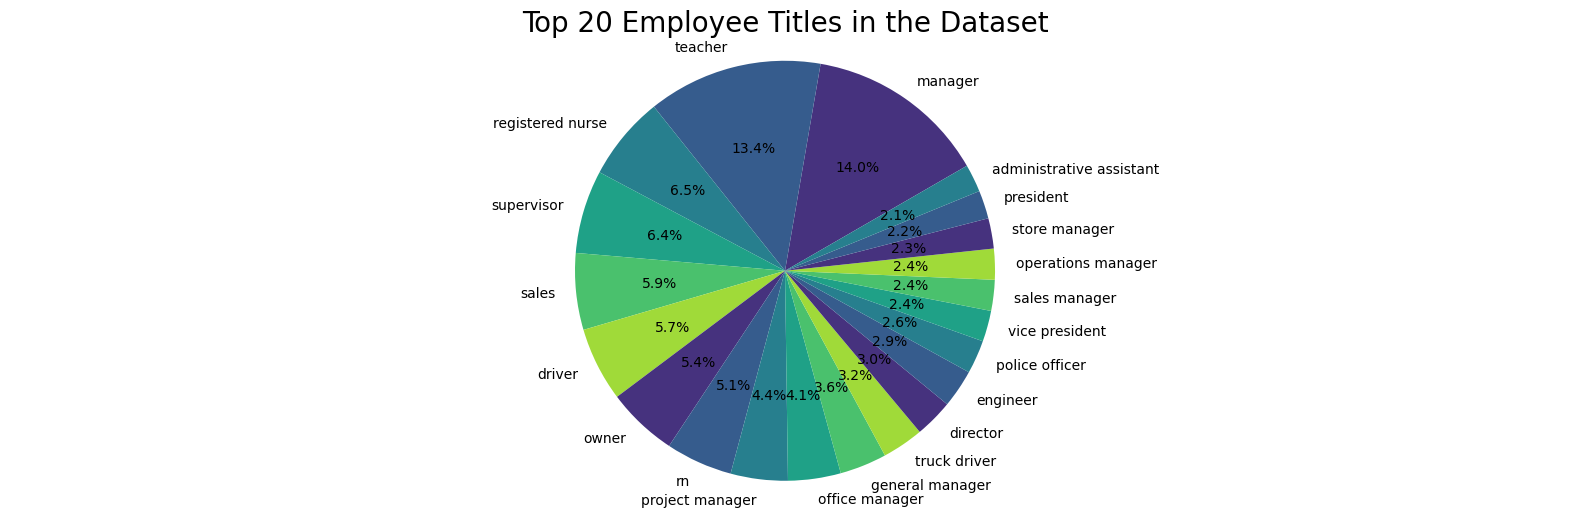

In [52]:
title_df = new_df.emp_title.value_counts()[1:22]
labels = title_df.index.tolist()
sizes = title_df.values.tolist()

plt.figure(figsize=(20, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=30,colors=sns.color_palette('viridis'))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 20 Employee Titles in the Dataset',fontsize=20)
plt.show()

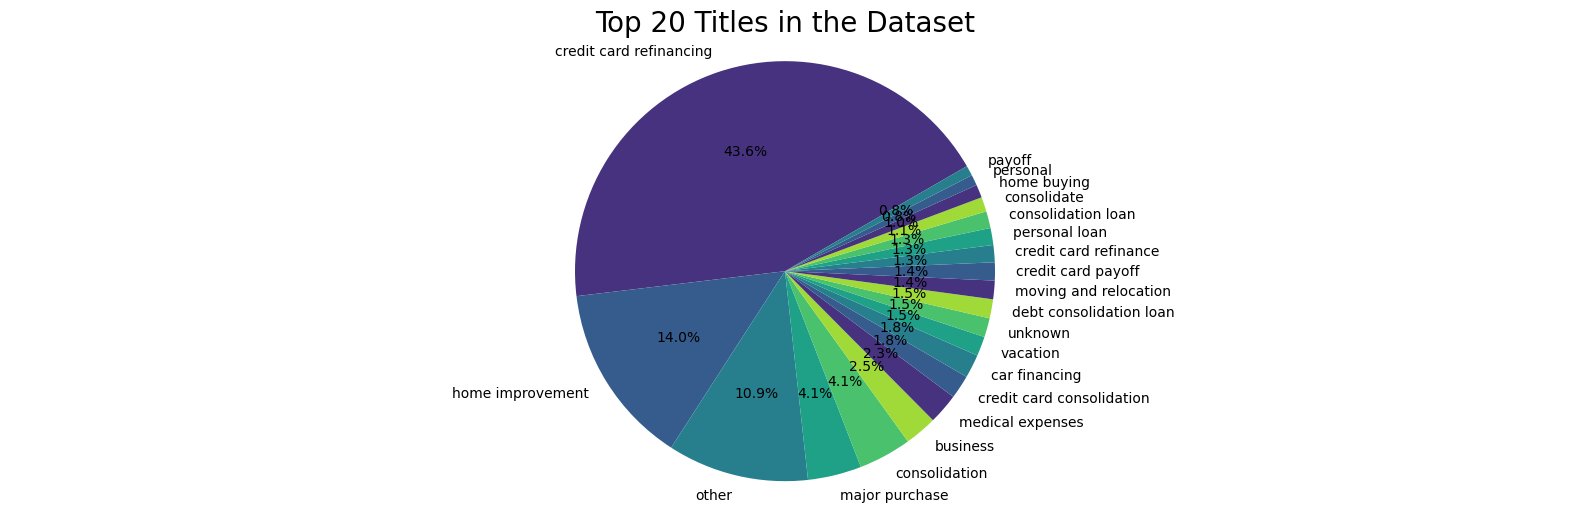

In [53]:
title_df = new_df.title.value_counts()[1:22]
labels = title_df.index.tolist()
sizes = title_df.values.tolist()

plt.figure(figsize=(20, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=30,colors=sns.color_palette('viridis'))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 20 Titles in the Dataset',fontsize=20)
plt.show()

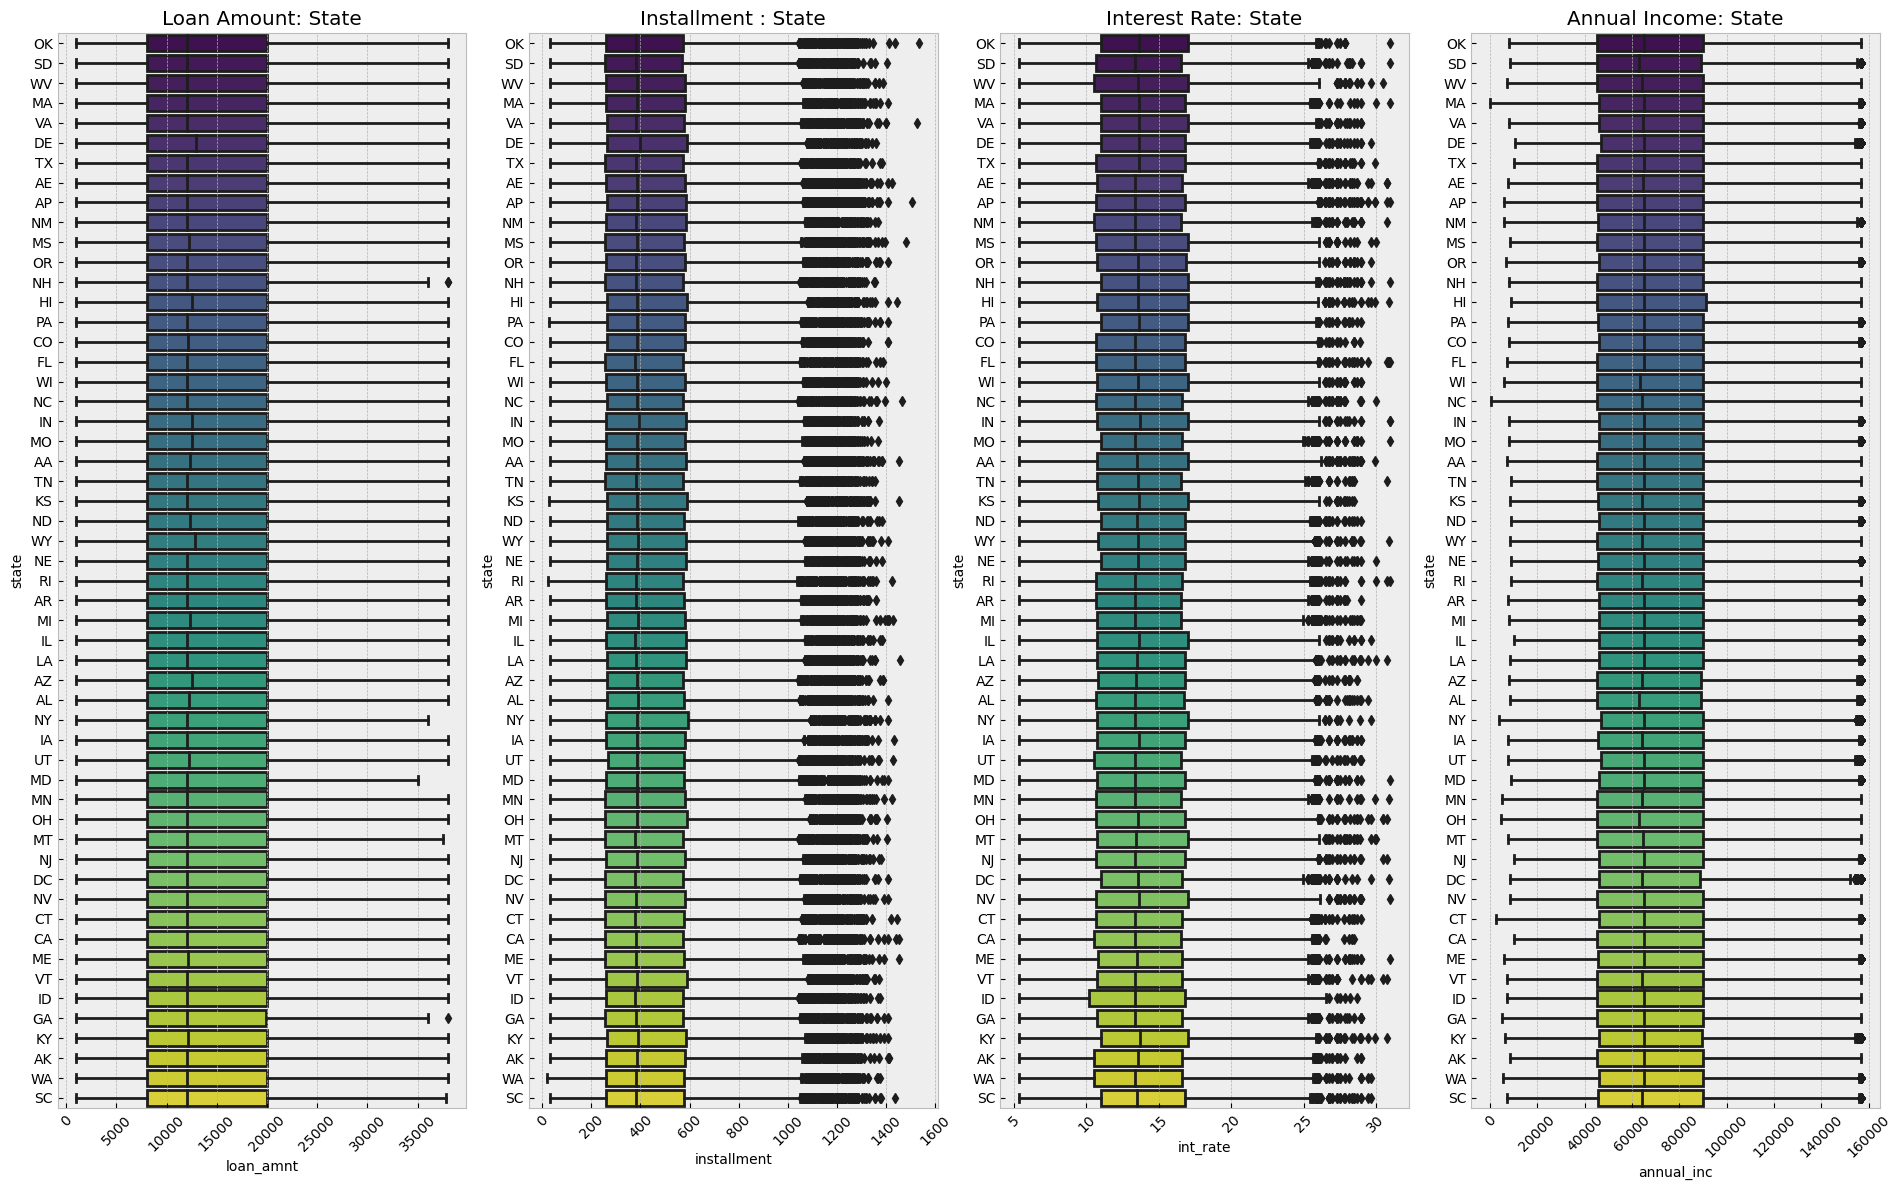

In [54]:
cols = ['state']

for col in cols:
    fig, axes = plt.subplots(nrows=1, ncols=4 ,figsize=(19, 12))

    # Boxplot of installment by the column
    sns.boxplot(y=col, x='loan_amnt', data=new_df, ax=axes[0], palette='viridis')
    axes[0].set_title(f'Loan Amount: {col.capitalize()}')
    axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis tick labels

    # Boxplot of int_rate by the column
    sns.boxplot(y=col, x='installment', data=new_df, ax=axes[1], palette='viridis')
    axes[1].set_title(f'Installment : {col.capitalize()}')
    axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis tick labels

        # Boxplot of int_rate by the column
    sns.boxplot(y=col, x='int_rate', data=new_df, ax=axes[2], palette='viridis')
    axes[2].set_title(f'Interest Rate: {col.capitalize()}')
    axes[2].tick_params(axis='x', rotation=45)  # Rotate x-axis tick labels
    
    sns.boxplot(y=col, x='annual_inc', data=new_df, ax=axes[3], palette='viridis')
    axes[3].set_title(f'Annual Income: {col.capitalize()}')
    axes[3].tick_params(axis='x', rotation=45)  # Rotate x-axis tick labels


    # Adjust layout
    plt.tight_layout()
    plt.show()
